# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# magic word for producing visualizations in notebook
%matplotlib inline

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

# 1 Business Understanding

Determine which customers to target with campaigns for the mail lorder company

# 2 Data Understanding

In [3]:
# # load in the data
# azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
# customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

In [2]:
# Load in the data
azdias = pd.read_csv('azdias.csv').drop(columns={'Unnamed: 0'})
customers = pd.read_csv('customers.csv').drop(columns = {'Unnamed: 0'})

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
azdias.head()

LNR  AGER_TYP  AKT_DAT_KL  ALTER_HH  ALTER_KIND1  ALTER_KIND2  \
0  910215        -1         NaN       NaN          NaN          NaN   
1  910220        -1         9.0       0.0          NaN          NaN   
2  910225        -1         9.0      17.0          NaN          NaN   
3  910226         2         1.0      13.0          NaN          NaN   
4  910241        -1         1.0      20.0          NaN          NaN   

   ALTER_KIND3  ALTER_KIND4  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ...  \
0          NaN          NaN                   NaN                  NaN  ...   
1          NaN          NaN                  21.0                 11.0  ...   
2          NaN          NaN                  17.0                 10.0  ...   
3          NaN          NaN                  13.0                  1.0  ...   
4          NaN          NaN                  14.0                  3.0  ...   

   VHN  VK_DHT4A  VK_DISTANZ  VK_ZG11  W_KEIT_KIND_HH  WOHNDAUER_2008  \
0  NaN       NaN         NaN      NaN             NaN             NaN   
1  4.0       8.0        11.0     10.0             3.0             9.0   
2  2.0       9.0         9.0      6.0             3.0             9.0   
3  0.0       7.0        10.0     11.0             NaN             9.0   
4  2.0       3.0         5.0      4.0             2.0             9.0   

   WOHNLAGE ZABEOTYP ANREDE_KZ ALTERSKATEGORIE_GROB  
0       NaN        3         1                    2  
1       4.0        5         2                    1  
2       2.0        5         2                    3  
3       7.0        3         2                    4  
4       3.0        4         1                    3  

[5 rows x 366 columns]

In [4]:
customers.head()

LNR  AGER_TYP  AKT_DAT_KL  ALTER_HH  ALTER_KIND1  ALTER_KIND2  \
0    9626         2         1.0      10.0          NaN          NaN   
1    9628        -1         9.0      11.0          NaN          NaN   
2  143872        -1         1.0       6.0          NaN          NaN   
3  143873         1         1.0       8.0          NaN          NaN   
4  143874        -1         1.0      20.0          NaN          NaN   

   ALTER_KIND3  ALTER_KIND4  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ...  \
0          NaN          NaN                  10.0                  1.0  ...   
1          NaN          NaN                   NaN                  NaN  ...   
2          NaN          NaN                   0.0                  1.0  ...   
3          NaN          NaN                   8.0                  0.0  ...   
4          NaN          NaN                  14.0                  7.0  ...   

   VK_ZG11  W_KEIT_KIND_HH  WOHNDAUER_2008  WOHNLAGE  ZABEOTYP  \
0      2.0             6.0             9.0       7.0         3   
1      3.0             0.0             9.0       NaN         3   
2     11.0             6.0             9.0       2.0         3   
3      2.0             NaN             9.0       7.0         1   
4      4.0             2.0             9.0       3.0         1   

       PRODUCT_GROUP  CUSTOMER_GROUP ONLINE_PURCHASE ANREDE_KZ  \
0  COSMETIC_AND_FOOD     MULTI_BUYER               0         1   
1               FOOD    SINGLE_BUYER               0         1   
2  COSMETIC_AND_FOOD     MULTI_BUYER               0         2   
3           COSMETIC     MULTI_BUYER               0         1   
4               FOOD     MULTI_BUYER               0         1   

  ALTERSKATEGORIE_GROB  
0                    4  
1                    4  
2                    4  
3                    4  
4                    3  

[5 rows x 369 columns]

In [5]:
azdias.shape

(891221, 366)

In [6]:
customers.shape

(191652, 369)

In [7]:
list(azdias.columns)

['LNR',
 'AGER_TYP',
 'AKT_DAT_KL',
 'ALTER_HH',
 'ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'ALTERSKATEGORIE_FEIN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_KINDER',
 'ANZ_PERSONEN',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'ANZ_TITEL',
 'ARBEIT',
 'BALLRAUM',
 'CAMEO_DEU_2015',
 'CAMEO_DEUG_2015',
 'CAMEO_INTL_2015',
 'CJT_GESAMTTYP',
 'CJT_KATALOGNUTZER',
 'CJT_TYP_1',
 'CJT_TYP_2',
 'CJT_TYP_3',
 'CJT_TYP_4',
 'CJT_TYP_5',
 'CJT_TYP_6',
 'D19_BANKEN_ANZ_12',
 'D19_BANKEN_ANZ_24',
 'D19_BANKEN_DATUM',
 'D19_BANKEN_DIREKT',
 'D19_BANKEN_GROSS',
 'D19_BANKEN_LOKAL',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_BANKEN_REST',
 'D19_BEKLEIDUNG_GEH',
 'D19_BEKLEIDUNG_REST',
 'D19_BILDUNG',
 'D19_BIO_OEKO',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_ENERGIE',
 'D19_FREIZEIT',
 'D19_GARTEN',
 'D19_GESAMT_ANZ_12',
 'D19_GESAMT_ANZ_24',
 'D19_GESAMT_DATUM',
 'D19_GESAMT_OFFLINE_DATUM',
 'D19_GESAMT_ONLINE

# 3 Data Preparation

In [8]:
# list of columns to exclude
feature_excl = []
# list of columns to include
feature_incl = []

In [9]:
# # splitting up due to memory issues
# result = pd.concat([pd.DataFrame(azdias.iloc[:, 0:50].nunique()),
#                     pd.DataFrame(azdias.iloc[:, 50:100].nunique()),
#                     pd.DataFrame(azdias.iloc[:, 100:150].nunique()),
#                     pd.DataFrame(azdias.iloc[:, 150:200].nunique()),
#                     pd.DataFrame(azdias.iloc[:, 200:250].nunique()),
#                     pd.DataFrame(azdias.iloc[:, 250:300].nunique()),
#                     pd.DataFrame(azdias.iloc[:, 300:366].nunique())
#                    ], axis=0).reset_index().\
#                     rename(columns = {0:'unique_value_count', 'index':'column'})

In [10]:
def check_missing_values(pdf):
    """
    Function to determine the percentage of null values in a dataframe
    Args:
    - pdf: Pandas dataframe
    """
    pct_nulls = pdf.isnull().sum() * 100 / len(pdf)
    missing_values = pdf.isnull().sum()
    unique_value_count = pdf.nunique()
    non_zero = pdf.apply(np.count_nonzero)
    dtypes = pdf.dtypes
    
    missing_value_df = pd.DataFrame({'dtype': dtypes,
                                        'null_values':missing_values,
                                     'pct_nulls': pct_nulls,
                                     'unique_values': unique_value_count,
                                     'non_zero_values': non_zero
                                        }).reset_index()
    return missing_value_df

In [11]:
data_quality_pdf = check_missing_values(azdias)

In [12]:
pd.set_option('display.max_rows', 400)
data_quality_pdf

index    dtype  null_values  pct_nulls  \
0                            LNR    int64            0   0.000000   
1                       AGER_TYP    int64            0   0.000000   
2                     AKT_DAT_KL  float64        73499   8.247000   
3                       ALTER_HH  float64        73499   8.247000   
4                    ALTER_KIND1  float64       810163  90.904837   
5                    ALTER_KIND2  float64       861722  96.690047   
6                    ALTER_KIND3  float64       885051  99.307691   
7                    ALTER_KIND4  float64       890016  99.864792   
8           ALTERSKATEGORIE_FEIN  float64       262947  29.504130   
9            ANZ_HAUSHALTE_AKTIV  float64        93148  10.451729   
10                  ANZ_HH_TITEL  float64        97008  10.884842   
11                    ANZ_KINDER  float64        73499   8.247000   
12                  ANZ_PERSONEN  float64        73499   8.247000   
13    ANZ_STATISTISCHE_HAUSHALTE  float64        93148  10.451729   
14                     ANZ_TITEL  float64        73499   8.247000   
15                        ARBEIT  float64        97216  10.908181   
16                      BALLRAUM  float64        93740  10.518154   
17                CAMEO_DEU_2015   object        98979  11.106000   
18               CAMEO_DEUG_2015   object        98979  11.106000   
19               CAMEO_INTL_2015   object        98979  11.106000   
20                 CJT_GESAMTTYP  float64         4854   0.544646   
21             CJT_KATALOGNUTZER  float64         4854   0.544646   
22                     CJT_TYP_1  float64         4854   0.544646   
23                     CJT_TYP_2  float64         4854   0.544646   
24                     CJT_TYP_3  float64         4854   0.544646   
25                     CJT_TYP_4  float64         4854   0.544646   
26                     CJT_TYP_5  float64         4854   0.544646   
27                     CJT_TYP_6  float64         4854   0.544646   
28             D19_BANKEN_ANZ_12    int64            0   0.000000   
29             D19_BANKEN_ANZ_24    int64            0   0.000000   
30              D19_BANKEN_DATUM    int64            0   0.000000   
31             D19_BANKEN_DIREKT    int64            0   0.000000   
32              D19_BANKEN_GROSS    int64            0   0.000000   
33              D19_BANKEN_LOKAL    int64            0   0.000000   
34      D19_BANKEN_OFFLINE_DATUM    int64            0   0.000000   
35       D19_BANKEN_ONLINE_DATUM    int64            0   0.000000   
36    D19_BANKEN_ONLINE_QUOTE_12  float64       257113  28.849522   
37               D19_BANKEN_REST    int64            0   0.000000   
38            D19_BEKLEIDUNG_GEH    int64            0   0.000000   
39           D19_BEKLEIDUNG_REST    int64            0   0.000000   
40                   D19_BILDUNG    int64            0   0.000000   
41                  D19_BIO_OEKO    int64            0   0.000000   
42                   D19_BUCH_CD    int64            0   0.000000   
43                D19_DIGIT_SERV    int64            0   0.000000   
44           D19_DROGERIEARTIKEL    int64            0   0.000000   
45                   D19_ENERGIE    int64            0   0.000000   
46                  D19_FREIZEIT    int64            0   0.000000   
47                    D19_GARTEN    int64            0   0.000000   
48             D19_GESAMT_ANZ_12    int64            0   0.000000   
49             D19_GESAMT_ANZ_24    int64            0   0.000000   
50              D19_GESAMT_DATUM    int64            0   0.000000   
51      D19_GESAMT_OFFLINE_DATUM    int64            0   0.000000   
52       D19_GESAMT_ONLINE_DATUM    int64            0   0.000000   
53    D19_GESAMT_ONLINE_QUOTE_12  float64       257113  28.849522   
54                  D19_HANDWERK    int64            0   0.000000   
55                 D19_HAUS_DEKO    int64            0   0.000000   
56             D19_KINDERARTIKEL    int64            0   0.000000   
57                 D19_KO

In [13]:
# Remove columns with more than 50% nulls
columns_to_drop = data_quality_pdf[(data_quality_pdf.pct_nulls > 50) | \
                                   (data_quality_pdf.non_zero_values == 0) | \
                                  (data_quality_pdf.unique_values <=1 )]['index'].to_list()

In [14]:
columns_to_drop

['ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'EXTSEL992',
 'KK_KUNDENTYP']

In [15]:
feature_excl.extend(columns_to_drop)

In [16]:
feature_excl

['ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'EXTSEL992',
 'KK_KUNDENTYP']

In [17]:
# remove columns exceeding the null threshold
df = azdias.drop(columns = columns_to_drop)

In [18]:
df.shape

(891221, 360)

In [19]:
# rows with 
null_threshold = int(0.5 * len(df.columns))

# Exclude rows with more than the threshold of null values
df_filtered = df[df.isnull().sum(axis=1) <= null_threshold]

In [20]:
df_filtered.shape

(792027, 360)

In [21]:
df = df_filtered

## Distribution of values

- Group columns by type for the analysis to determine if there are features that can be dropped

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_multiple_seaborn_plots(df, nr_cols):
    """
    Function to plot multiple countplots using seaborn
    Args:
    - df: Pandas dataframe containing columns to plot
    - nr_cols: number of columns to include in the subplot
    """
    # Calculate number of rows based on number of columns in DataFrame
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / nr_cols)
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, nr_cols, figsize=(15, num_rows * 3))
    axes = axes.flatten()

    # Generate plots
    for i, col in enumerate(df.columns):
        ax = axes[i]
        sns.countplot(data = df, x = col, ax=ax)  # You can change this to any seaborn plot function
        ax.set_title(col)
        
    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()


### Demographics

In [23]:
age_cols = ['AGER_TYP', # best-ager typology
            'ALTERSKATEGORIE_GROB', # age classification through prename analysis 
            'ALTER_HH', # main age within the household
            'ANREDE_KZ', # gender
           'GEBURTSJAHR' # year of birth
           ]
azdias_age = azdias[age_cols]

In [24]:
azdias_age.describe()

AGER_TYP  ALTERSKATEGORIE_GROB       ALTER_HH      ANREDE_KZ  \
count  891221.000000         891221.000000  817722.000000  891221.000000   
mean       -0.358435              2.777398      10.864126       1.522098   
std         1.198724              1.068775       7.639683       0.499512   
min        -1.000000              1.000000       0.000000       1.000000   
25%        -1.000000              2.000000       0.000000       1.000000   
50%        -1.000000              3.000000      13.000000       2.000000   
75%        -1.000000              4.000000      17.000000       2.000000   
max         3.000000              9.000000      21.000000       2.000000   

         GEBURTSJAHR  
count  891221.000000  
mean     1101.178533  
std       976.583551  
min         0.000000  
25%         0.000000  
50%      1943.000000  
75%      1970.000000  
max      2017.000000

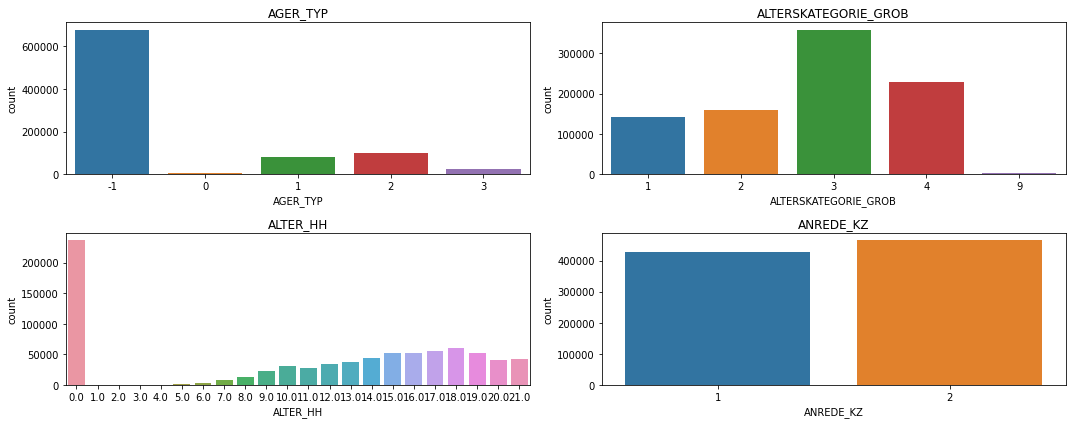

In [25]:
plot_multiple_seaborn_plots(azdias_age.drop(columns = {'GEBURTSJAHR'}), 2)

<AxesSubplot:xlabel='GEBURTSJAHR', ylabel='Count'>

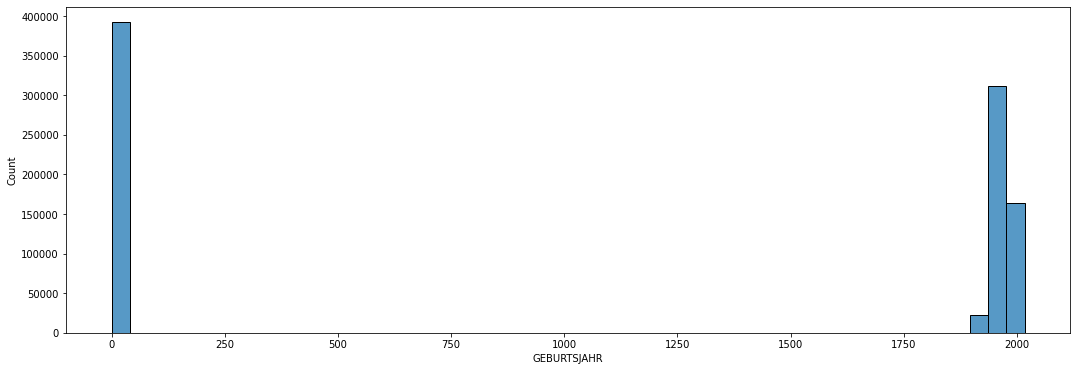

In [26]:
# plot age histogram
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
sns.histplot(data = azdias_age, x = 'GEBURTSJAHR')

In [27]:
azdias_age['GEBURTSJAHR'].value_counts()

0       392318
1967     11183
1965     11090
1966     10933
1970     10883
1964     10799
1968     10792
1963     10513
1969     10360
1980     10275
1962     10082
1961      9880
1971      9786
1982      9516
1978      9509
1960      9492
1979      9422
1981      9374
1977      9296
1959      9098
1972      9027
1976      9005
1983      8887
1974      8676
1984      8553
1975      8480
1973      8356
1958      8323
1986      8192
1985      8180
1957      8099
1956      8039
1955      7828
1988      7801
1987      7767
1954      7533
1989      7251
1952      7106
1953      7096
1950      7071
1990      6848
1951      6832
1949      6657
1941      6235
1948      5833
1991      5741
1944      5493
1947      5475
1943      5442
1942      5222
1992      5200
1946      4808
1993      4635
1940      4561
1994      4249
1939      4226
1945      4113
1996      4047
1997      4026
1995      4009
1938      3862
1937      3369
1936      3074
1935      2951
1934      2526
1933      1862
1932      

In [28]:
(392318/azdias_age.shape[0])*100

44.02028228688507

44 percent of the base fall within the unknown category

In [29]:
# percentage of males vs females
azdias_age['ANREDE_KZ'].value_counts()/azdias.shape[0]

2    0.522098
1    0.477902
Name: ANREDE_KZ, dtype: float64

- Features AGER_TYP and ALTER_HH can be dropped due to the relatively large percentage of unknown classifications. ALTERSKATEGORIE_GROB gives us similar information
- Most of the population lies in the 3rd age category, 46-60 years.
- The population is made up of 52% females and 48% males

In [30]:
feature_excl.extend(['AGER_TYP', 'GEBURTSJAHR', 'ALTER_HH'])

In [31]:
feature_incl.extend(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ'])

In [32]:
feature_excl

['ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'EXTSEL992',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'GEBURTSJAHR',
 'ALTER_HH']

In [33]:
feature_incl

['ALTERSKATEGORIE_GROB', 'ANREDE_KZ']

### personal profile

In [34]:
pp_cols = [
'GFK_URLAUBERTYP', # vacation habits
'GREEN_AVANTGARDE', # green avantgarde membership (0 no, 1 yes)
'HEALTH_TYP', # health typology (critical reserved,sanitary affine, jaunty hedonists) 
# 'LP_LEBENSPHASE_FEIN', # lifestage fine (low level)
'LP_LEBENSPHASE_GROB', # lifestage rough (high level)
# 'LP_STATUS_FEIN', # social status fine
'LP_STATUS_GROB', # social status rough
'NATIONALITAET_KZ', # nationaltity (scored by prename analysis)
'ONLINE_AFFINITAET', # online affinity
'PRAEGENDE_JUGENDJAHRE', # dominating movement in the person's youth (avantgarde or mainstream)
'VERS_TYP', # insurance typology 
'TITEL_KZ', # flag whether this person holds an academic title
'SEMIO_DOM', # affinity indicating in what way the person is dominant minded
'SEMIO_ERL', # affinity indicating in what way the person is eventful orientated
'SEMIO_FAM', # affinity indicating in what way the person is familiar minded
'SEMIO_KAEM', # affinity indicating in what way the person is of a fightfull attitude
'SEMIO_KRIT', # affinity indicating in what way the person is critical minded
'SEMIO_KULT', # affinity indicating in what way the person is cultural minded
'SEMIO_MAT', # affinity indicating in what way the person is material minded
'SEMIO_PFLICHT', # affinity indicating in what way the person is dutyfull traditional minded
'SEMIO_RAT', # affinity indicating in what way the person is of a rational mind
'SEMIO_REL', # affinity indicating in what way the person is religious
'SEMIO_SOZ', # affinity indicating in what way the person is social minded
'SEMIO_TRADV', # affinity indicating in what way the person is traditional minded
'SEMIO_VERT', # affinity indicating in what way the person is dreamily
'ZABEOTYP' # typification of energy consumers
]
azdias_pp = azdias[pp_cols]

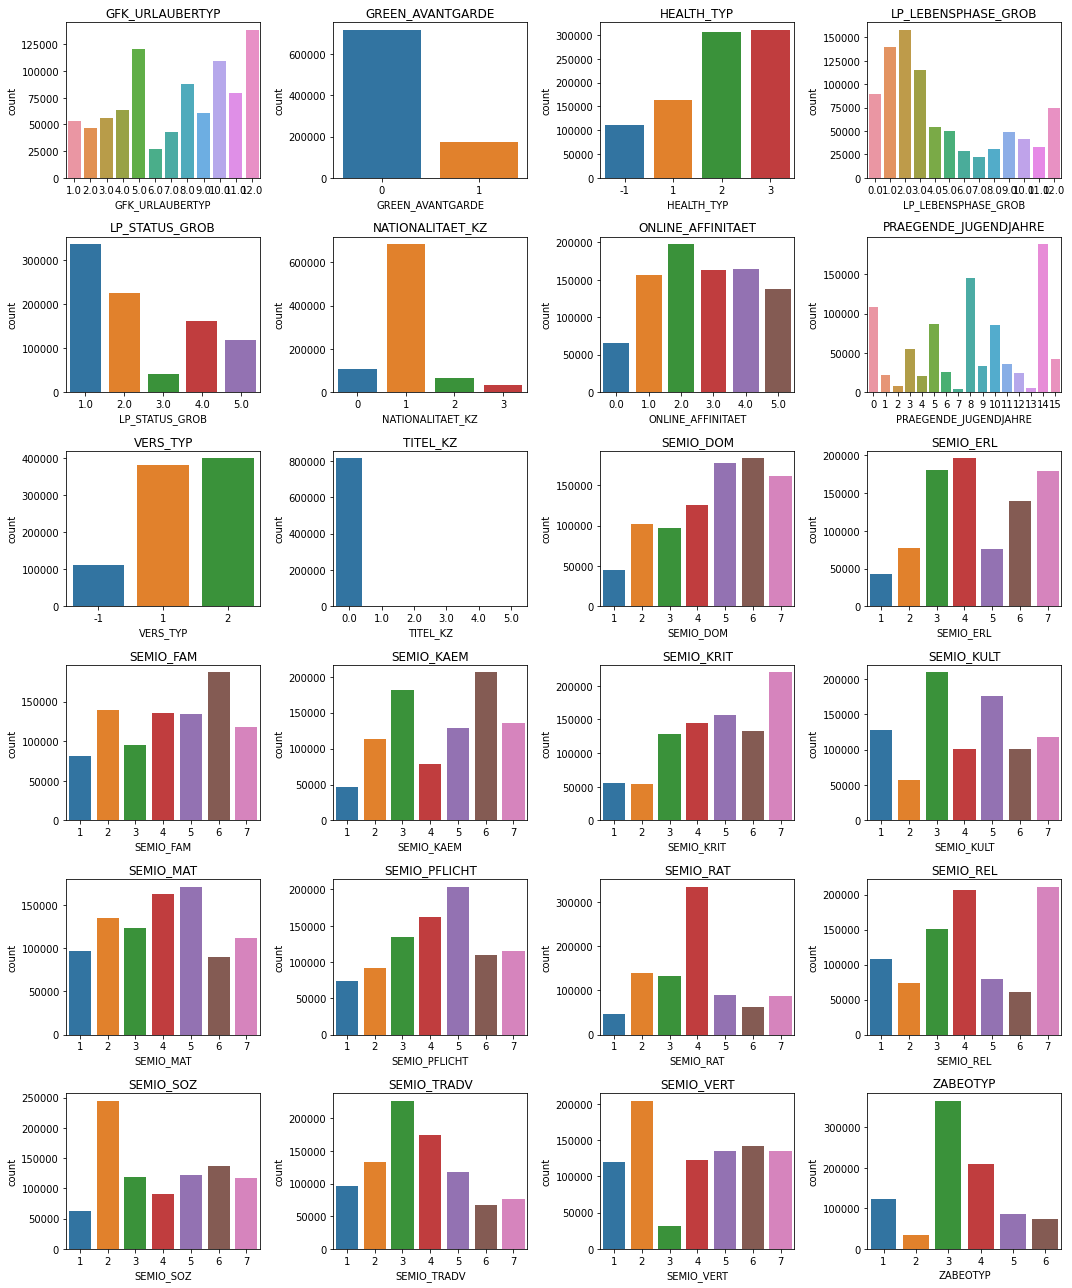

In [35]:
plot_multiple_seaborn_plots(azdias_pp, 4)

- Titel_KZ (whether the person holds a title) - most of the base falls into the '0' category (unknown)
- Nationaliteit_KZ - most of the base falls into the 'sounding German' category
- used the 'GROB' level features 

In [36]:
feature_excl.extend(['TITEL_KZ', 'NATIONALITAET_KZ'])

In [37]:
pp_cols

['GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'TITEL_KZ',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP']

In [38]:
feature_incl.extend(['GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP'])

In [39]:
feature_excl

['ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'EXTSEL992',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'GEBURTSJAHR',
 'ALTER_HH',
 'TITEL_KZ',
 'NATIONALITAET_KZ']

In [40]:
feature_incl

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP']

### Household

In [41]:
hh_cols = ['ANZ_HAUSHALTE_AKTIV', # number of households in the building
'ANZ_HH_TITEL',  # number of academic title holders in the building
'ANZ_PERSONEN', # number of adults in the household
'ANZ_TITEL', # number of professional title holders in the household
'HH_EINKOMMEN_SCORE', # household net income (low - high)
'LP_FAMILIE_FEIN', # family type (fine) - low level classification
'LP_FAMILIE_GROB', # family type (rough) - high level classification
'W_KEIT_KIND_HH', # likelihood of a child present in this household
]
azdias_hh = azdias[hh_cols]

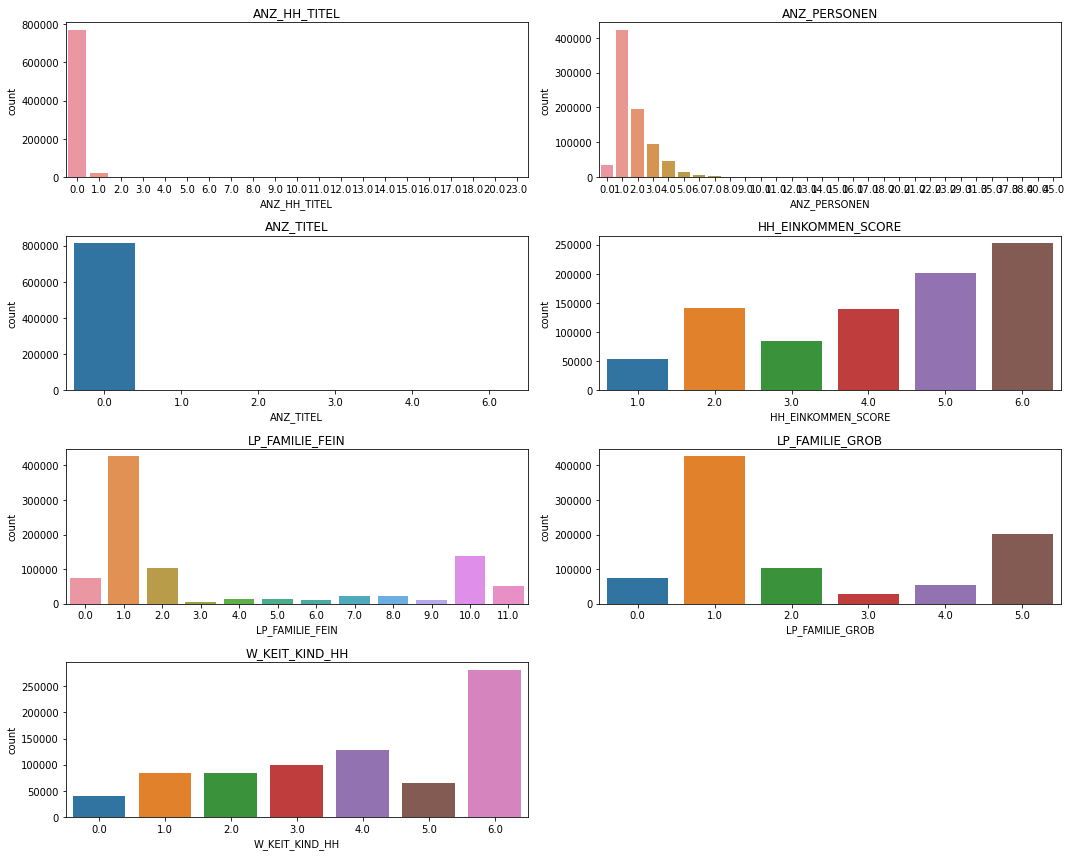

In [42]:
plot_multiple_seaborn_plots(azdias_hh.drop(columns = {'ANZ_HAUSHALTE_AKTIV'}), 2)

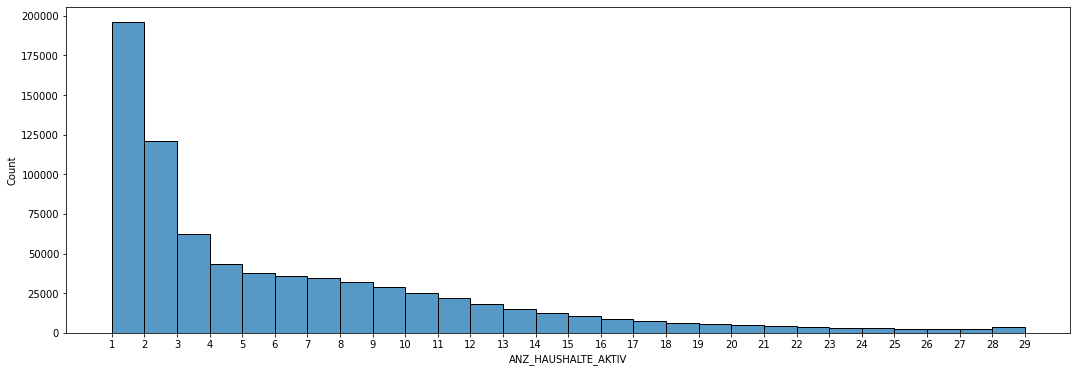

In [43]:
# plot ANZ_HAUSHALTE_AKTIV (number of households in the building)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
sns.histplot(data = azdias_hh, x = 'ANZ_HAUSHALTE_AKTIV', ax = ax, bins = range(1, 30, 1));
ax.set_xticks(range(1, 30, 1));

- ANZ_HH_TITEL, ANZ_TITEL - most customers fall within the unknown category, so these columns can be excluded.

In [44]:
feature_excl.extend(['ANZ_HH_TITEL', 'ANZ_TITEL'])

In [45]:
feature_excl

['ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'EXTSEL992',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'GEBURTSJAHR',
 'ALTER_HH',
 'TITEL_KZ',
 'NATIONALITAET_KZ',
 'ANZ_HH_TITEL',
 'ANZ_TITEL']

In [46]:
feature_incl.extend(['HH_EINKOMMEN_SCORE', 'LP_FAMILIE_FEIN', 'W_KEIT_KIND_HH'])

In [47]:
feature_incl

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP',
 'HH_EINKOMMEN_SCORE',
 'LP_FAMILIE_FEIN',
 'W_KEIT_KIND_HH']

### Location

In [48]:
loc_cols = ['BALLRAUM', # distance to next urban centre
'EWDICHTE', # density of inhabitants per square meter
'GEBAEUDETYP', # type of building (residential or commercial)
'GEBAEUDETYP_RASTER', # industrial areas         
'INNENSTADT', # distance to city centre
'KBA05_ANHANG', # share of trailers in the microcell
'KBA05_ANTG1', #number of 1-2 family houses in the cell
'KBA05_ANTG2', #number of 3-5 family houses in the cell
'KBA05_ANTG3', # number of 6-10 family houses in the cell
'KBA05_ANTG4', #number of >10 family houses in the cell
'KBA05_BAUMAX', # most common building-type within the cell
'KBA05_GBZ', #number of buildings in the microcell
'KONSUMNAEHE', # distance from a building to PoS (Point of Sale)
'MIN_GEBAEUDEJAHR', # year the building was first mentioned in our database
'MOBI_REGIO', # moving patterns (no to high mobility)
'ORTSGR_KLS9', # size of the community
'OST_WEST_KZ', # flag indicating the former GDR/FRG
'PLZ8_ANTG1', # number of 1-2 family houses in the PLZ8
'REGIOTYP', # neighbourhood 
'SOHO_KZ', # small office/home office flag
'RELAT_AB', # share of unemployed in relation to the county the community belongs to
'PLZ8_ANTG2', # number of 3-5 family houses in the PLZ8
'PLZ8_ANTG3', # number of 6-10 family houses in the PLZ8
'PLZ8_ANTG4', # number of >10 family houses in the PLZ8
'PLZ8_BAUMAX', # most common building-type within the PLZ8
'PLZ8_GBZ', # number of buildings within the PLZ8
'PLZ8_HHZ', # number of households within the PLZ8
'WOHNDAUER_2008', # length of residence
'WOHNLAGE' # residential-area

]
azdias_loc = azdias[loc_cols]

In [49]:
azdias_loc.head()

BALLRAUM  EWDICHTE  GEBAEUDETYP  GEBAEUDETYP_RASTER  INNENSTADT  \
0       NaN       NaN          NaN                 NaN         NaN   
1       6.0       3.0          8.0                 3.0         8.0   
2       2.0       4.0          1.0                 4.0         4.0   
3       4.0       2.0          1.0                 4.0         6.0   
4       2.0       5.0          1.0                 5.0         1.0   

   KBA05_ANHANG  KBA05_ANTG1  KBA05_ANTG2  KBA05_ANTG3  KBA05_ANTG4  ...  \
0           NaN          NaN          NaN          NaN          NaN  ...   
1           0.0          0.0          0.0          0.0          2.0  ...   
2           0.0          1.0          3.0          1.0          0.0  ...   
3           1.0          4.0          1.0          0.0          0.0  ...   
4           0.0          1.0          4.0          1.0          0.0  ...   

   SOHO_KZ  RELAT_AB  PLZ8_ANTG2  PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  \
0      NaN       NaN         NaN         NaN         NaN          NaN   
1      1.0       4.0         3.0         2.0         1.0          1.0   
2      0.0       2.0         3.0         1.0         0.0          1.0   
3      0.0       3.0         2.0         2.0         0.0          1.0   
4      0.0       5.0         4.0         2.0         1.0          2.0   

  PLZ8_GBZ  PLZ8_HHZ  WOHNDAUER_2008  WOHNLAGE  
0      NaN       NaN             NaN       NaN  
1      4.0       5.0             9.0       4.0  
2      4.0       4.0             9.0       2.0  
3      4.0       3.0             9.0       7.0  
4      3.0       3.0             9.0       3.0  

[5 rows x 29 columns]

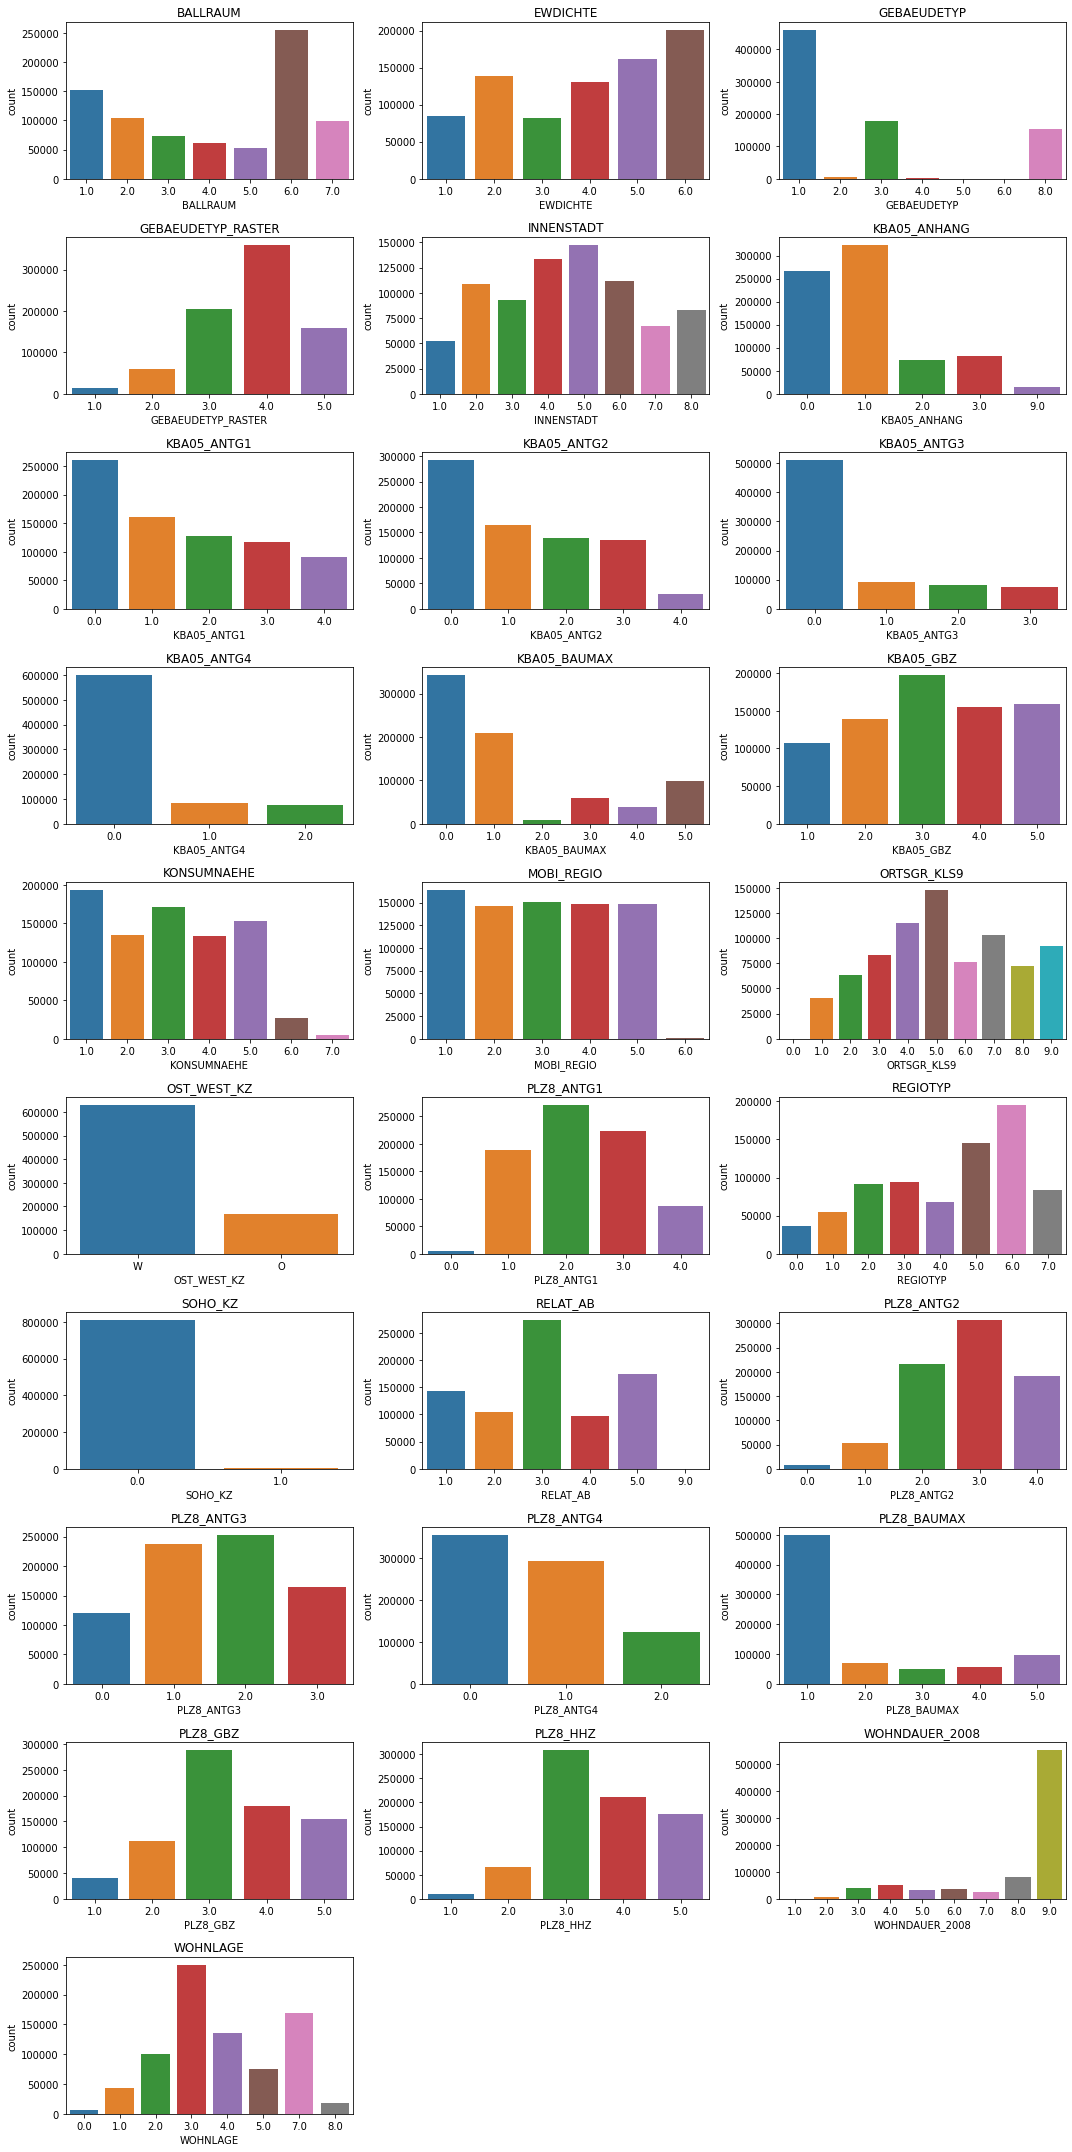

In [50]:
plot_multiple_seaborn_plots(azdias_loc.drop(columns = {'MIN_GEBAEUDEJAHR'}), 3)

In [51]:
azdias_loc['MIN_GEBAEUDEJAHR'].value_counts()

1992.0    568776
1994.0     78835
1993.0     25488
1995.0     25464
1996.0     16611
1997.0     14464
2000.0      7382
2001.0      5877
1991.0      5811
2005.0      5553
1999.0      4413
1990.0      4408
2002.0      4216
1998.0      4097
2003.0      3356
2004.0      2935
2008.0      2197
2007.0      2156
1989.0      2046
2009.0      2016
2006.0      1984
2011.0      1903
2012.0      1861
2010.0      1410
2013.0      1230
1988.0      1027
2014.0      1001
2015.0       717
1987.0       470
2016.0       128
1986.0       125
1985.0       116
Name: MIN_GEBAEUDEJAHR, dtype: int64

In [52]:
# pct of buildings within the 1992 band
(568776/azdias.shape[0])*100

63.81986061818561

- Most of the base lives 50-100km from the nearest city centre, these customers would benefit from a mail order service
- SOHO_KZ: most of the base fall into one category (no small home office)
- KBA05_ANTG4 (number of >10 family houses in the cell) - most of the base falls into the '0' category (no >10 homes in the area)
- MIN_GEBAEUDEJAHR: more than 63% of falls within this category.

In [53]:
feature_excl.extend(['SOHO_KZ', 'KBA05_ANTG4', 'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ'])

In [54]:
feature_excl

['ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'EXTSEL992',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'GEBURTSJAHR',
 'ALTER_HH',
 'TITEL_KZ',
 'NATIONALITAET_KZ',
 'ANZ_HH_TITEL',
 'ANZ_TITEL',
 'SOHO_KZ',
 'KBA05_ANTG4',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ']

In [55]:
feature_incl.extend(['BALLRAUM',
'GEBAEUDETYP',
'INNENSTADT',
'KONSUMNAEHE',
'WOHNLAGE',
'ORTSGR_KLS9',
'REGIOTYP',
'RELAT_AB'])

In [56]:
feature_incl

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP',
 'HH_EINKOMMEN_SCORE',
 'LP_FAMILIE_FEIN',
 'W_KEIT_KIND_HH',
 'BALLRAUM',
 'GEBAEUDETYP',
 'INNENSTADT',
 'KONSUMNAEHE',
 'WOHNLAGE',
 'ORTSGR_KLS9',
 'REGIOTYP',
 'RELAT_AB']

### Car ownership

In [57]:
car_cols = ['KBA05_ALTER1', # share of car owners less than 31 years old
'KBA05_ALTER2', #  share of car owners inbetween 31 and 45 years of age
'KBA05_ALTER3', # share of car owners inbetween 45 and 60 years of age
'KBA05_ALTER4', # share of cars owners elder than 61 years
'KBA05_AUTOQUOT', #  share of cars per household
'KBA05_CCM1', # share of cars with less than 1399ccm
'KBA05_CCM2', #share of cars with 1400ccm to 1799 ccm
'KBA05_CCM3', # share of cars with 1800ccm to 2499 ccm
'KBA05_CCM4', # share of cars with more than 2499ccm
'KBA05_DIESEL', # share of cars with Diesel-engine in the microcell
'KBA05_FRAU', # share of female car owners
'KBA05_HERST1', # share of top German manufacturer (Mercedes, BMW)
'KBA05_HERST2', # share of Volkswagen-Cars (including Audi)
'KBA05_HERST3', # share of Ford/Opel
'KBA05_HERST4', # share of European manufacturer (e.g. Fiat, Peugeot, Rover,...)
'KBA05_HERST5', # share of asian manufacturer (e.g. Toyota, Kia,...)
'KBA05_HERSTTEMP', #development of the most common car manufacturers in the neighbourhood
'KBA05_KRSAQUOT', # share of cars per household (reffered to county average)
'KBA05_KRSHERST1', # share of Mercedes/BMW (reffered to the county average)
'KBA05_KRSHERST2', # share of Volkswagen (reffered to the county average)
'KBA05_KRSHERST3', # share of Ford/Opel (reffered to the county average)
'KBA05_KRSKLEIN', # share of small cars (referred to the county average)
'KBA05_KRSOBER', # share of upper class cars (referred to the county average)
'KBA05_KRSVAN', # share of vans (referred to the county average)
'KBA05_KRSZUL', # share of newbuilt cars (referred to the county average)
'KBA05_KW1', # share of cars with less than 59 KW engine power
'KBA05_KW2', # share of cars with an engine power between 60 and 119 KW
'KBA05_KW3', # share of cars with an engine power of more than 119 KW
'KBA05_MAXAH', # most common age of car owners in the microcell
'KBA05_MAXBJ', # most common age of the cars in the microcell
'KBA05_MAXHERST', # most common car manufacturer in the microcell
'KBA05_MAXSEG', # most common car segment in the microcell
'KBA05_MAXVORB', # most common preowner structure in the microcell
'KBA05_MOD1', # share of upper class cars (in an AZ specific definition)
'KBA05_MOD2', # share of middle class cars (in an AZ specific definition)
'KBA05_MOD3', # share of Golf-class cars (in an AZ specific definition)
'KBA05_MOD4', # share of small cars (in an AZ specific definition)
'KBA05_MOD8', # share of vans (in an AZ specific definition)
'KBA05_MODTEMP', # development of the most common car segment in the neighbourhood
'KBA05_MOTOR', # most common engine size in the microcell
'KBA05_MOTRAD', # share of motorcycles per household
'KBA05_SEG1', # share of very small cars (Ford Ka etc.) in the microcell
'KBA05_SEG10', # share of more specific cars (Vans, convertables, all-terrains, MUVs etc.)
'KBA05_SEG2', # share of small and very small cars (Ford Fiesta, Ford Ka etc.) in the microcell
'KBA05_SEG3', # share of lowe midclass cars (Ford Focus etc.) in the microcell
'KBA05_SEG4', # share of middle class cars (Ford Mondeo etc.) in the microcell
'KBA05_SEG5', # share of upper middle class cars and upper class cars (BMW5er, BMW7er etc.)
'KBA05_SEG6', # share of upper class cars (BMW 7er etc.) in the microcell
'KBA05_SEG7', # share of all-terrain vehicles and MUVs in the microcell
'KBA05_SEG8', # share of roadster and convertables in the microcell
'KBA05_SEG9', # share of vans in the microcell
'KBA05_VORB0', # share of cars with no preowner
'KBA05_VORB1', # share of cars with one or two preowner
'KBA05_VORB2', # share of cars with more than two preowner
'KBA05_ZUL1', # share of cars built before 1994
'KBA05_ZUL2', # share of cars built between 1994 and 2000
'KBA05_ZUL3', # share of cars built between 2001 and 2002
'KBA05_ZUL4', # share of cars built from 2003 on
'KBA13_ALTERHALTER_30', # share of car owners below 31 within the PLZ8
'KBA13_ALTERHALTER_45', # share of car owners between 31 and 45 within the PLZ8
'KBA13_ALTERHALTER_60', # share of car owners between 46 and 60 within the PLZ8
'KBA13_ALTERHALTER_61', # share of car owners elder than 61 within the PLZ8
'KBA13_ANZAHL_PKW', #number of cars in the PLZ8
'KBA13_AUDI', # share of AUDI within the PLZ8
'KBA13_AUTOQUOTE', # share of cars per household within the PLZ8
'KBA13_BJ_1999', # share of cars built between 1995 and 1999 within the PLZ8
'KBA13_BJ_2000', # share of cars built between 2000 and 2003 within the PLZ8
'KBA13_BJ_2004', # share of cars built before 2004 within the PLZ8
'KBA13_BJ_2006', # share of cars built between 2005 and 2006 within the PLZ8
'KBA13_BJ_2008', # share of cars built in 2008 within the PLZ8
'KBA13_BJ_2009', # share of cars built in 2009 within the PLZ8
'KBA13_BMW', # share of BMW within the PLZ8
'KBA13_CCM_1000', # share of cars with less than 1000ccm within the PLZ8
'KBA13_CCM_1200', # share of cars with 1000ccm to 1199ccm within the PLZ8
'KBA13_CCM_1400', # share of cars with 1200ccm to 1399ccm within the PLZ8
'KBA13_CCM_0_1400', # share of cars with less than 1400ccm within the PLZ8
'KBA13_CCM_1500', # share of cars with 1400ccm to 1499ccm within the PLZ8
# 'KBA13_CCM_1400_2500', # share of cars with 1400ccm to 2499ccm within the PLZ8
'KBA13_CCM_1600', # share of cars with 1500ccm to 1599ccm within the PLZ8
'KBA13_CCM_1800', # share of cars with 1600ccm to 1799ccm within the PLZ8
'KBA13_CCM_2000', # share of cars with 1800ccm to 1999ccm within the PLZ8
'KBA13_CCM_2500', # share of cars with 2000ccm to 2499ccm within the PLZ8
'KBA13_CCM_2501', # share of cars with more than 2500ccm within the PLZ8
'KBA13_CCM_3000', # share of cars with 2500ccm to 2999ccm within the PLZ8
'KBA13_CCM_3001', # share of cars with more than 3000ccm within the PLZ8
'KBA13_FAB_ASIEN', # share of other Asian Manufacturers within the PLZ8
'KBA13_FAB_SONSTIGE', # share of other Manufacturers within the PLZ8
'KBA13_FIAT', # share of FIAT within the PLZ8
'KBA13_FORD', # share of FORD within the PLZ8
'KBA13_HALTER_20', # share of car owners below 21 within the PLZ8
'KBA13_HALTER_25', # share of car owners between 21 and 25 within the PLZ8
'KBA13_HALTER_30', # share of car owners between 26 and 30 within the PLZ8
'KBA13_HALTER_35', # share of car owners between 31 and 35 within the PLZ8
'KBA13_HALTER_40', # share of car owners between 36 and 40 within the PLZ8
'KBA13_HALTER_45', # share of car owners between 41 and 45 within the PLZ8
'KBA13_HALTER_50', # share of car owners between 46 and 50 within the PLZ8
'KBA13_HALTER_55', # share of car owners between 51 and 55 within the PLZ8
'KBA13_HALTER_60', # share of car owners between 56 and 60 within the PLZ8
'KBA13_HALTER_65', # share of car owners between 61 and 65 within the PLZ8
'KBA13_HALTER_66', # share of car owners over 66 within the PLZ8
'KBA13_HERST_ASIEN', # share of Asian Manufacturers within the PLZ8
'KBA13_HERST_AUDI_VW', # share of Volkswagen & Audi within the PLZ8
'KBA13_HERST_BMW_BENZ', # share of BMW & Mercedes Benz within the PLZ8
'KBA13_HERST_EUROPA', # share of European cars within the PLZ8
'KBA13_HERST_FORD_OPEL', # share of Ford & Opel/Vauxhall within the PLZ8
'KBA13_HERST_SONST', # share of other cars within the PLZ8
'KBA13_KMH_110', # share of cars with max speed 110 km/h within the PLZ8
'KBA13_KMH_140', # share of cars with max speed between 110 km/h and 140km/h within the PLZ8
'KBA13_KMH_180', # share of cars with max speed between 110 km/h and 180km/h within the PLZ8
'KBA13_KMH_0_140', # share of cars with max speed 140 km/h within the PLZ8
'KBA13_KMH_140_210', # share of cars with max speed between 140 and 210 km/h within the PLZ8
'KBA13_KMH_211', # share of cars with a greater max speed than 210 km/h within the PLZ8
'KBA13_KMH_250', # share of cars with max speed between 210 and 250 km/h within the PLZ8
'KBA13_KMH_251', # share of cars with a greater max speed than 250 km/h within the PLZ8
'KBA13_KRSAQUOT', # share of cars per household (referred to the county average) - PLZ8
'KBA13_KRSHERST_AUDI_VW', # share of Volkswagen (referred to the county average) - PLZ8
'KBA13_KRSHERST_BMW_BENZ', # share of BMW/Mercedes Benz (referred to the county average) - PLZ8
'KBA13_KRSHERST_FORD_OPEL', # share of FORD/Opel (referred to the county average) - PLZ8
'KBA13_KRSSEG_KLEIN', # share of small cars (referred to the county average) - PLZ8
'KBA13_KRSSEG_OBER', # share of upper class cars (referred to the county average) - PLZ8
'KBA13_KRSSEG_VAN', # share of vans (referred to the county average) - PLZ8
'KBA13_KRSZUL_NEU', # share of newbuilt cars (referred to the county average) - PLZ8
'KBA13_KW_30', # share of cars up to 30 KW engine power - PLZ8
'KBA13_KW_40', # share of cars with an engine power between 31 and 40 KW - PLZ8
'KBA13_KW_50', # share of cars with an engine power between 41 and 50 KW - PLZ8
'KBA13_KW_60', # share of cars with an engine power between 51 and 60 KW - PLZ8
'KBA13_KW_0_60', # share of cars up to 60 KW engine power - PLZ8
'KBA13_KW_70', # share of cars with an engine power between 61 and 70 KW - PLZ8
'KBA13_KW_61_120', # share of cars with an engine power between 61 and 120 KW - PLZ8
'KBA13_KW_80', # share of cars with an engine power between 71 and 80 KW - PLZ8
'KBA13_KW_90', # share of cars with an engine power between 81 and 90 KW - PLZ8
'KBA13_KW_110', # share of cars with an engine power between 91 and 110 KW - PLZ8
'KBA13_KW_120', # share of cars with an engine power between 111 and 120 KW - PLZ8
'KBA13_KW_121', # share of cars with an engine power more than 120 KW - PLZ8
'KBA13_MAZDA', # share of MAZDA within the PLZ8
'KBA13_MERCEDES', # share of MERCEDES within the PLZ8
'KBA13_MOTOR', # most common motor size within the PLZ8
'KBA13_NISSAN', # share of NISSAN within the PLZ8
'KBA13_OPEL', # share of OPEL within the PLZ8
'KBA13_PEUGEOT', # share of PEUGEOT within the PLZ8
'KBA13_RENAULT', # share of RENAULT within the PLZ8
'KBA13_SEG_GELAENDEWAGEN', # share of allterrain within the PLZ8
'KBA13_SEG_GROSSRAUMVANS', # share of big sized vans within the PLZ8
'KBA13_SEG_KLEINST', # share of very small cars (Ford Ka etc.) in the PLZ8
'KBA13_SEG_KLEINWAGEN', # share of small and very small cars (Ford Fiesta, Ford Ka etc.) in the PLZ8
'KBA13_SEG_KOMPAKTKLASSE', # share of lowe midclass cars (Ford Focus etc.) in the PLZ8
'KBA13_SEG_MINIVANS', # share of minivans within the PLZ8
'KBA13_SEG_MINIWAGEN', # share of minicars within the PLZ8
'KBA13_SEG_MITTELKLASSE', # share of middle class cars (Ford Mondeo etc.) in the PLZ8
'KBA13_SEG_OBEREMITTELKLASSE', # share of upper middle class cars and upper class cars (BMW5er, BMW7er etc.)
'KBA13_SEG_OBERKLASSE', # share of upper class cars (BMW 7er etc.) in the PLZ8
'KBA13_SEG_SONSTIGE', # share of other cars within the PLZ8
'KBA13_SEG_SPORTWAGEN', # share of sportscars within the PLZ8
'KBA13_SEG_UTILITIES', # share of MUVs/SUVs within the PLZ8
'KBA13_SEG_VAN', # share of vans within the PLZ8
'KBA13_SEG_WOHNMOBILE', # share of roadmobiles within the PLZ8
'KBA13_SITZE_4', # number of cars with less than 5 seats in the PLZ8
'KBA13_SITZE_5', # number of cars with 5 seats in the PLZ8
'KBA13_SITZE_6', # number of cars with more than 5 seats in the PLZ8
'KBA13_TOYOTA', # share of TOYOTA within the PLZ8
'KBA13_VORB_0', # share of cars with no preowner - PLZ8
'KBA13_VORB_1', # share of cars with 1 preowner - PLZ8
'KBA13_VORB_1_2', # share of cars with 1 or 2 preowner - PLZ8
'KBA13_VORB_2', #, # share of cars with 2 preowner - PLZ8
'KBA13_VORB_3', # share of cars with 3 or more preowner - PLZ8'
'KBA13_VW' # , # share of VOLKSWAGEN within the PLZ8
]

In [58]:
azdias_car = azdias[car_cols]

In [59]:
azdias_car.describe()

KBA05_ALTER1   KBA05_ALTER2   KBA05_ALTER3   KBA05_ALTER4  \
count  757897.000000  757897.000000  757897.000000  757897.000000   
mean        2.071317       3.149416       3.112196       2.919489   
std         1.532120       1.338676       1.349705       1.500372   
min         0.000000       1.000000       1.000000       0.000000   
25%         1.000000       2.000000       2.000000       2.000000   
50%         2.000000       3.000000       3.000000       3.000000   
75%         3.000000       4.000000       4.000000       4.000000   
max         9.000000       9.000000       9.000000       9.000000   

       KBA05_AUTOQUOT     KBA05_CCM1     KBA05_CCM2     KBA05_CCM3  \
count   757897.000000  757897.000000  757897.000000  757897.000000   
mean         3.207994       3.082453       3.115361       3.144479   
std          1.400238       1.349763       1.323141       1.351333   
min          1.000000       1.000000       1.000000       1.000000   
25%          2.000000       2.000000       2.000000       2.000000   
50%          3.000000       3.000000       3.000000       3.000000   
75%          4.000000       4.000000       4.000000       4.000000   
max          9.000000       9.000000       9.000000       9.000000   

          KBA05_CCM4   KBA05_DIESEL  ...  KBA13_SITZE_4  KBA13_SITZE_5  \
count  757897.000000  757897.000000  ...  785421.000000  785421.000000   
mean        1.358658       2.147870  ...       3.170897       2.842810   
std         1.621032       1.427566  ...       1.053637       1.056045   
min         0.000000       0.000000  ...       1.000000       1.000000   
25%         0.000000       1.000000  ...       3.000000       2.000000   
50%         1.000000       2.000000  ...       3.000000       3.000000   
75%         2.000000       3.000000  ...       4.000000       3.000000   
max         9.000000       9.000000  ...       5.000000       5.000000   

       KBA13_SITZE_6   KBA13_TOYOTA   KBA13_VORB_0   KBA13_VORB_1  \
count  785421.000000  785421.000000  785421.000000  785421.000000   
mean        3.071781       3.074966       3.117557       2.980660   
std         1.041083       1.007389       0.975495       0.957392   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       3.000000       2.000000   
50%         3.000000       3.000000       3.000000       3.000000   
75%         4.000000       4.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

       KBA13_VORB_1_2   KBA13_VORB_2   KBA13_VORB_3       KBA13_VW  
count   785421.000000  785421.000000  785421.000000  785421.000000  
mean         2.916887       3.011097       2.354173       2.935193  
std          0.961899       0.943805       1.469417       1.028888  
min          1.000000       1.000000       0.000000       1.000000  
25%          2.000000       2.000000       1.000000       2.000000  
50%          3.000000       3.000000       3.000000       3.000000  
75%          3.000000       4.000000       3.000000       4.000000  
max          5.000000       5.000000       5.000000       5.000000  

[8 rows x 165 columns]

There are 167 car-ownership related columns. If we assume that customers interested in organic products are environmentally conscious, the type of car they own might related to this.

In [60]:
def plot_feature_correlations(pdf):
    """
    Calculates and plots feature correlations
    """
    from matplotlib import rcParams
    
    rcParams['figure.figsize'] = 30, 20
    corr = pdf.corr()
    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );  
    return corr

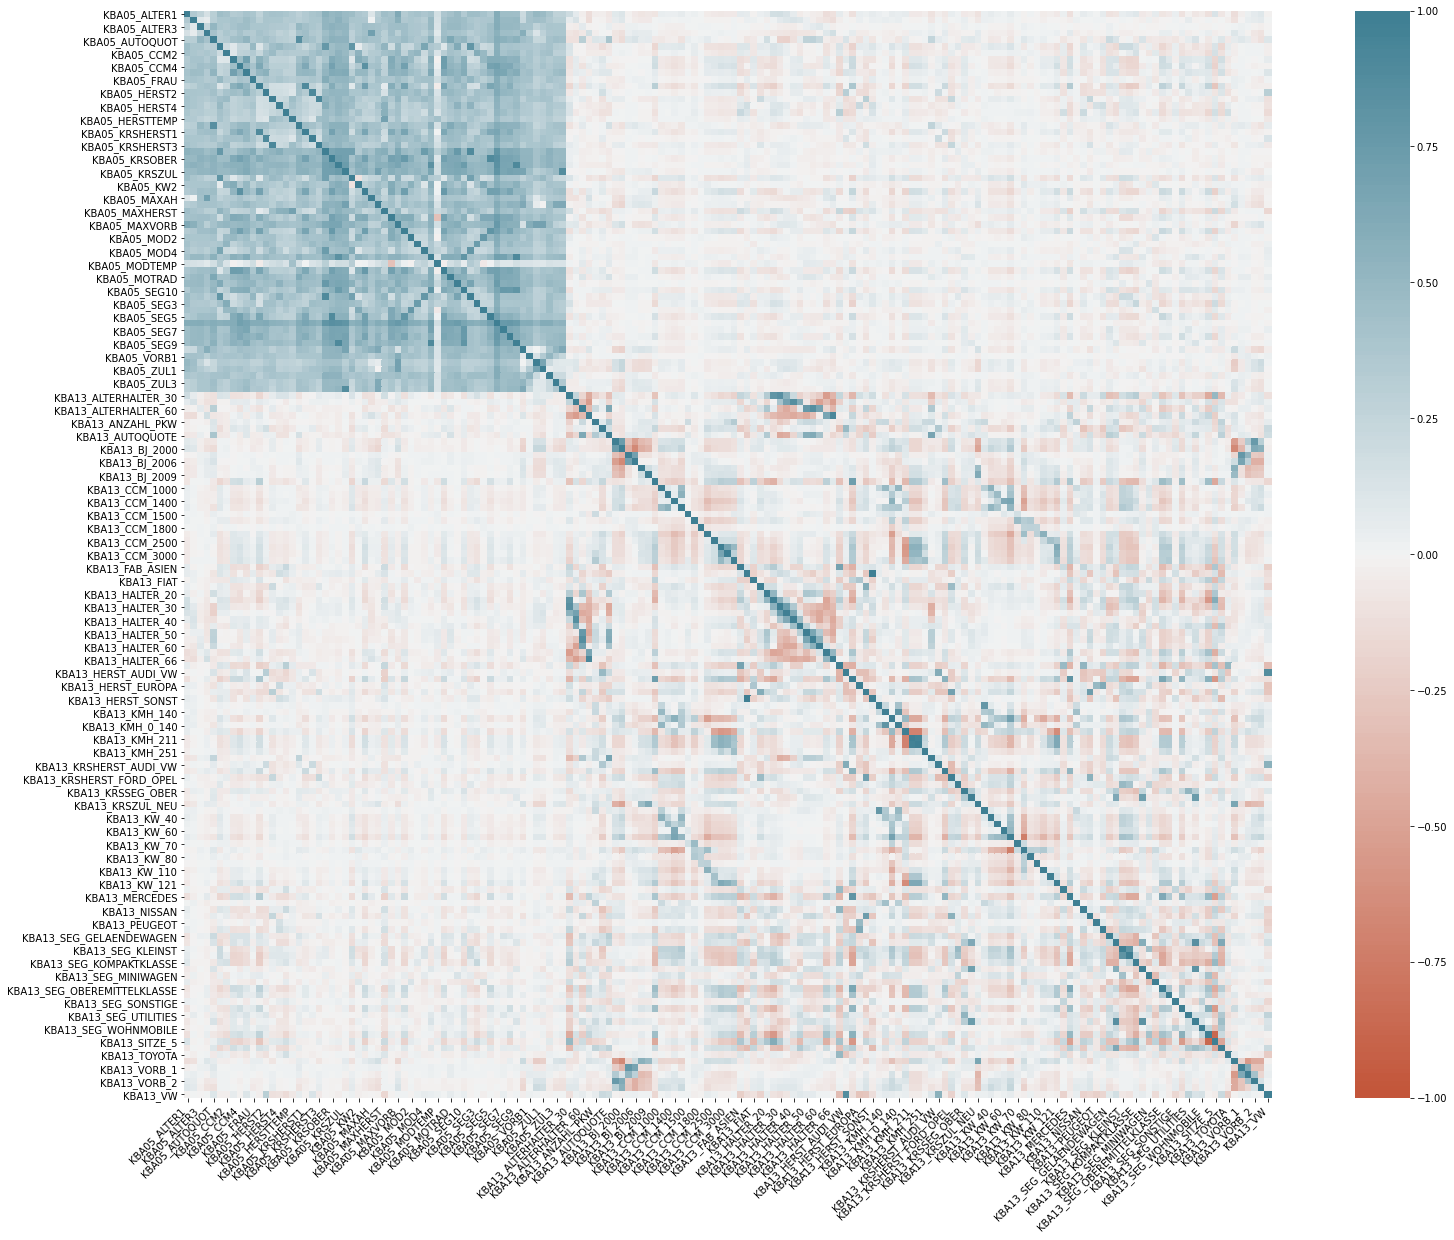

In [61]:
corr_pdf = plot_feature_correlations(azdias_car)

In [62]:
# threshold to remove correlated columns
threshold = 0.7

# Filter row-column pairs that are above the threshold
filtered_pairs = corr_pdf[corr_pdf > threshold].stack().index

In [63]:
corr_pdf

KBA05_ALTER1  KBA05_ALTER2  KBA05_ALTER3  \
KBA05_ALTER1                     1.000000      0.358379      0.274356   
KBA05_ALTER2                     0.358379      1.000000      0.099324   
KBA05_ALTER3                     0.274356      0.099324      1.000000   
KBA05_ALTER4                     0.155351      0.056779      0.252637   
KBA05_AUTOQUOT                   0.303047      0.315225      0.509388   
KBA05_CCM1                       0.455281      0.378814      0.378009   
KBA05_CCM2                       0.429596      0.377437      0.359769   
KBA05_CCM3                       0.334825      0.400100      0.400314   
KBA05_CCM4                       0.352130      0.391922      0.440437   
KBA05_DIESEL                     0.404108      0.463745      0.448754   
KBA05_FRAU                       0.385720      0.404113      0.379414   
KBA05_HERST1                     0.264622      0.301081      0.381025   
KBA05_HERST2                     0.393939      0.391623      0.387826   
KBA05_HERST3                     0.413396      0.387008      0.363967   
KBA05_HERST4                     0.402334      0.383020      0.355081   
KBA05_HERST5                     0.377322      0.335571      0.349026   
KBA05_HERSTTEMP                  0.339776      0.339140      0.295486   
KBA05_KRSAQUOT                   0.289498      0.318487      0.505246   
KBA05_KRSHERST1                  0.346597      0.339411      0.431392   
KBA05_KRSHERST2                  0.392880      0.384215      0.383022   
KBA05_KRSHERST3                  0.419108      0.387687      0.354512   
KBA05_KRSKLEIN                   0.557849      0.517417      0.522982   
KBA05_KRSOBER                    0.506602      0.496697      0.550711   
KBA05_KRSVAN                     0.524513      0.551920      0.538867   
KBA05_KRSZUL                     0.471801      0.481421      0.529805   
KBA05_KW1                        0.462735      0.391332      0.354494   
KBA05_KW2                        0.367653      0.383297      0.387765   
KBA05_KW3                        0.337821      0.373768      0.439510   
KBA05_MAXAH                      0.112087      0.011456      0.434831   
KBA05_MAXBJ                      0.322383      0.341378      0.412382   
KBA05_MAXHERST                   0.443613      0.401288      0.369405   
KBA05_MAXSEG                     0.413617      0.435824      0.439449   
KBA05_MAXVORB                    0.621039      0.577028      0.454759   
KBA05_MOD1                       0.329539      0.365065      0.439260   
KBA05_MOD2                       0.394162      0.375401      0.390038   
KBA05_MOD3                       0.408396      0.360287      0.369482   
KBA05_MOD4                       0.373084      0.323957      0.356773   
KBA05_MOD8                       0.408128      0.485597      0.485008   
KBA05_MODTEMP                    0.161001      0.144417      0.124446   
KBA05_MOTOR                      0.370302      0.420512      0.455410   
KBA05_MOTRAD                     0.429467      0.472960      0.494869   
KBA05_SEG1                       0.483948      0.477173      0.489578   
KBA05_SEG10                      0.341841      0.446230      0.445135   
KBA05_SEG2                       0.446094      0.385678      0.398502   
KBA05_SEG3                       0.444434      0.363823      0.357681   
KBA05_SEG4                       0.404559      0.372780      0.388777   
KBA05_SEG5                       0.350057      0.381533      0.445443   
KBA05_SEG6                       0.603381      0.587972      0.604990   
KBA05_SEG7                       0.446306      0.484852      0.504190   
KBA05_SEG8                       0.449258      0.485497      0.505332   
KBA05_SEG9                       0.443018      0.500309      0.493955   
KBA05_VORB0                      0.208541      0.226020      0.418778   
KBA05_VORB1                      0.415247      0.426273      0.398967   
KBA05_VORB2                      0.507092      0.444485      0.277907   
KBA05_ZUL1    

In [64]:
correlated_cols =  filtered_pairs.to_frame(index=False)
correlated_cols.columns = ['column_1', 'column_2']
# columns to remove due to high correlation
correlated_cols_to_remove = list(set(correlated_cols[correlated_cols.column_1 != correlated_cols.column_2]['column_1'].to_list()))

In [65]:
correlated_cols_to_remove

['KBA13_HALTER_40',
 'KBA05_MOD1',
 'KBA13_ALTERHALTER_61',
 'KBA13_BMW',
 'KBA13_KMH_211',
 'KBA05_KRSHERST2',
 'KBA13_ALTERHALTER_60',
 'KBA05_MOTRAD',
 'KBA05_ALTER4',
 'KBA05_MOD2',
 'KBA05_MOTOR',
 'KBA13_VORB_1',
 'KBA13_VW',
 'KBA05_ZUL4',
 'KBA05_CCM4',
 'KBA13_SEG_VAN',
 'KBA13_KW_30',
 'KBA05_MAXVORB',
 'KBA13_HALTER_25',
 'KBA13_KRSSEG_VAN',
 'KBA05_SEG4',
 'KBA05_SEG8',
 'KBA13_SEG_MINIVANS',
 'KBA05_SEG5',
 'KBA05_KW1',
 'KBA05_CCM3',
 'KBA05_HERST1',
 'KBA05_CCM1',
 'KBA13_BJ_1999',
 'KBA13_BJ_2004',
 'KBA13_HALTER_35',
 'KBA13_HALTER_55',
 'KBA05_SEG1',
 'KBA13_HERST_AUDI_VW',
 'KBA13_KMH_110',
 'KBA05_HERST2',
 'KBA13_HERST_SONST',
 'KBA05_MOD4',
 'KBA05_AUTOQUOT',
 'KBA05_SEG3',
 'KBA05_HERST3',
 'KBA13_BJ_2000',
 'KBA13_KRSHERST_FORD_OPEL',
 'KBA05_KRSHERST1',
 'KBA13_BJ_2006',
 'KBA05_SEG6',
 'KBA13_SEG_KLEINWAGEN',
 'KBA13_FAB_SONSTIGE',
 'KBA13_VORB_2',
 'KBA05_SEG7',
 'KBA13_ALTERHALTER_30',
 'KBA05_SEG10',
 'KBA13_HALTER_66',
 'KBA05_KRSHERST3',
 'KBA05_DIESEL',


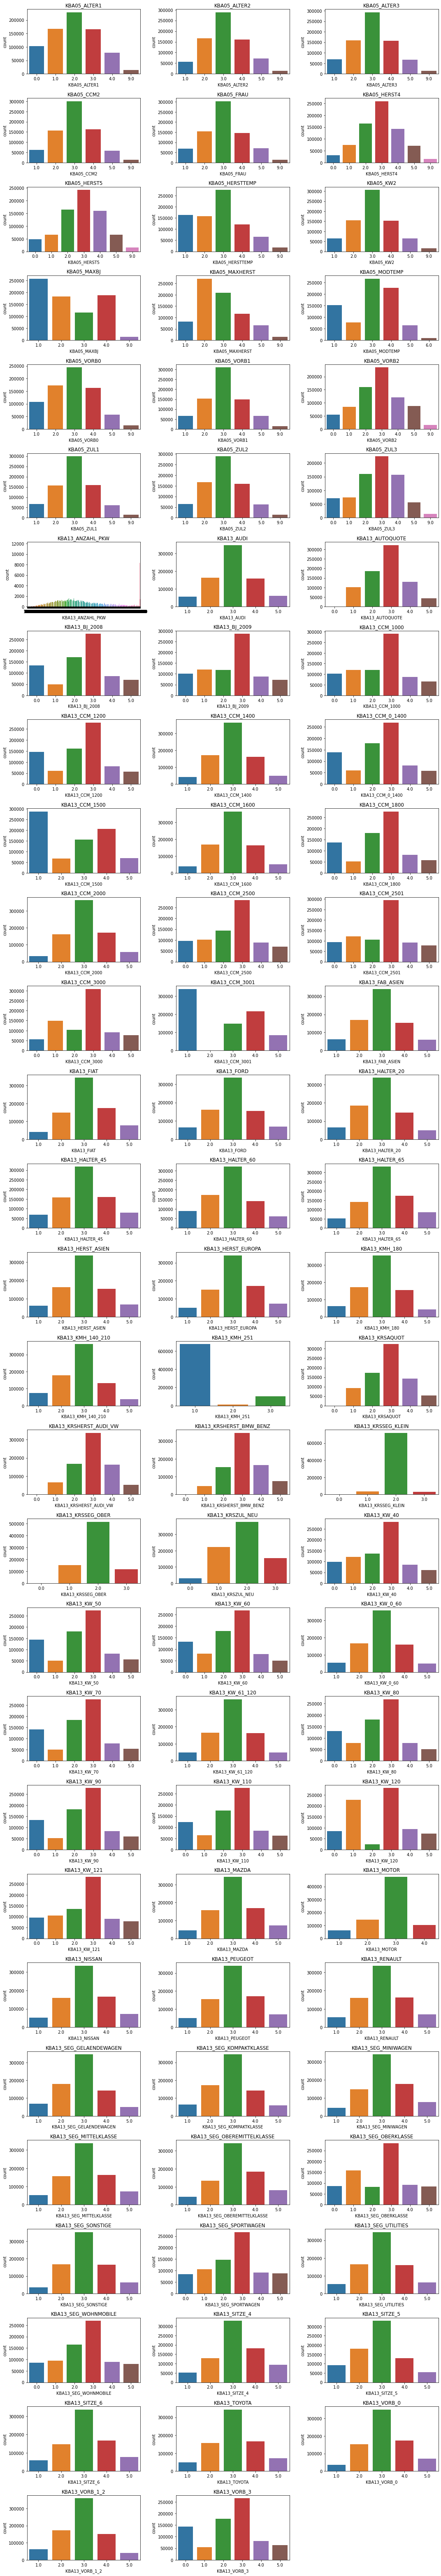

In [66]:
# plot non correlated columns
plot_multiple_seaborn_plots(azdias_car.drop(columns = correlated_cols_to_remove), 3)

Many of the features have the same distributions.
- age of car owners might not be relevant: KBA05_ALTER1, KBA05_ALTER2, KBA05_ALTER3, KBA05_ALTER4

In [67]:
feature_excl

['ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'EXTSEL992',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'GEBURTSJAHR',
 'ALTER_HH',
 'TITEL_KZ',
 'NATIONALITAET_KZ',
 'ANZ_HH_TITEL',
 'ANZ_TITEL',
 'SOHO_KZ',
 'KBA05_ANTG4',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ']

In [68]:
# exclude correlated columns
feature_excl.extend(correlated_cols_to_remove)

In [69]:
feature_excl

['ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'EXTSEL992',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'GEBURTSJAHR',
 'ALTER_HH',
 'TITEL_KZ',
 'NATIONALITAET_KZ',
 'ANZ_HH_TITEL',
 'ANZ_TITEL',
 'SOHO_KZ',
 'KBA05_ANTG4',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'KBA13_HALTER_40',
 'KBA05_MOD1',
 'KBA13_ALTERHALTER_61',
 'KBA13_BMW',
 'KBA13_KMH_211',
 'KBA05_KRSHERST2',
 'KBA13_ALTERHALTER_60',
 'KBA05_MOTRAD',
 'KBA05_ALTER4',
 'KBA05_MOD2',
 'KBA05_MOTOR',
 'KBA13_VORB_1',
 'KBA13_VW',
 'KBA05_ZUL4',
 'KBA05_CCM4',
 'KBA13_SEG_VAN',
 'KBA13_KW_30',
 'KBA05_MAXVORB',
 'KBA13_HALTER_25',
 'KBA13_KRSSEG_VAN',
 'KBA05_SEG4',
 'KBA05_SEG8',
 'KBA13_SEG_MINIVANS',
 'KBA05_SEG5',
 'KBA05_KW1',
 'KBA05_CCM3',
 'KBA05_HERST1',
 'KBA05_CCM1',
 'KBA13_BJ_1999',
 'KBA13_BJ_2004',
 'KBA13_HALTER_35',
 'KBA13_HALTER_55',
 'KBA05_SEG1',
 'KBA13_HERST_AUDI_VW',
 'KBA13_KMH_110',
 'KBA05_HERST2',
 'KBA13_HERST_SONST',
 'KBA05_MOD4',
 'KBA05_AUTOQUOT',
 'KBA05_SEG3',
 'KBA05_HERST3',
 'KBA13_BJ_

In [70]:
feature_excl.extend(['KBA05_ALTER1', 'KBA05_ALTER2', 'KBA05_ALTER3', 'KBA05_ALTER4'])

In [71]:
len(feature_excl)

100

In [72]:
feature_incl.extend(['KBA05_AUTOQUOT', #  share of cars per household
'KBA13_VORB_0', # share of cars with no preowner - PLZ8
'KBA13_VORB_1', # share of cars with 1 preowner - PLZ8
'KBA13_VORB_1_2', # share of cars with 1 or 2 preowner - PLZ8
'KBA13_VORB_2', #, # share of cars with 2 preowner - PLZ8
'KBA13_VORB_3', # share of cars with 3 or more preowner - PLZ8'
                    ])

In [73]:
feature_incl

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP',
 'HH_EINKOMMEN_SCORE',
 'LP_FAMILIE_FEIN',
 'W_KEIT_KIND_HH',
 'BALLRAUM',
 'GEBAEUDETYP',
 'INNENSTADT',
 'KONSUMNAEHE',
 'WOHNLAGE',
 'ORTSGR_KLS9',
 'REGIOTYP',
 'RELAT_AB',
 'KBA05_AUTOQUOT',
 'KBA13_VORB_0',
 'KBA13_VORB_1',
 'KBA13_VORB_1_2',
 'KBA13_VORB_2',
 'KBA13_VORB_3']

### CAMEO classifications

In [74]:
cameo_cols = ['CAMEO_DEU_2015',
 'CAMEO_DEUG_2015',
 'CAMEO_INTL_2015',]
azdias_cameo = azdias[cameo_cols]

In [75]:
azdias_cameo.dtypes

CAMEO_DEU_2015     object
CAMEO_DEUG_2015    object
CAMEO_INTL_2015    object
dtype: object

<AxesSubplot:xlabel='CAMEO_INTL_2015', ylabel='count'>

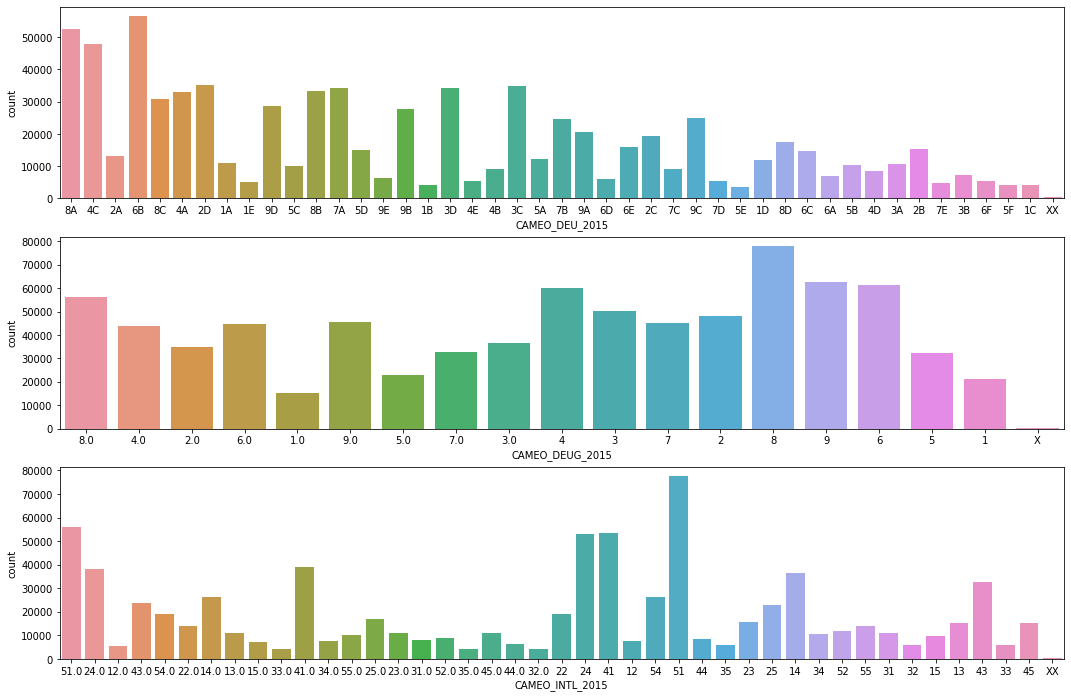

In [76]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (18, 12))
sns.countplot(data=azdias_cameo, x = 'CAMEO_DEU_2015', ax = ax[0])
sns.countplot(data=azdias_cameo, x = 'CAMEO_DEUG_2015', ax = ax[1])
sns.countplot(data=azdias_cameo, x = 'CAMEO_INTL_2015', ax = ax[2])

In [77]:
azdias_cameo.head()

CAMEO_DEU_2015 CAMEO_DEUG_2015 CAMEO_INTL_2015
0            NaN             NaN             NaN
1             8A               8              51
2             4C               4              24
3             2A               2              12
4             6B               6              43

In [78]:
feature_incl.extend([ 'CAMEO_DEUG_2015'])

### Consumer profile

In [79]:
consumer_pro_cols = ['CJT_GESAMTTYP', #customer journey typology
'D19_KONSUMTYP', # consumption type
'RETOURTYP_BK_S', # return type (unknown,influenceable Crazy-Shopper,demanding Heavy-Returner,incentive-receptive Normal-Returner,conservative Low-Returner,determined Minimal-Returner)
'SHOPPER_TYP' #shopping typology
]
azdias_con_pro = azdias[consumer_pro_cols]

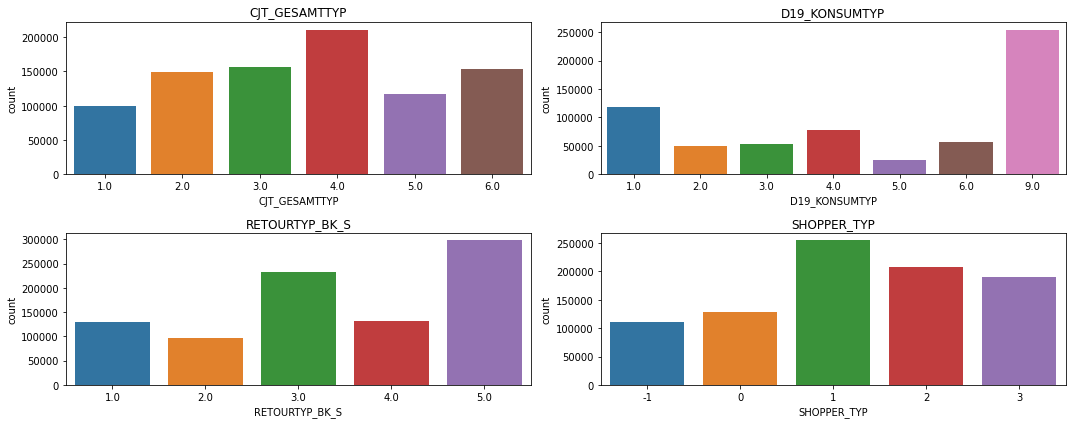

In [80]:
plot_multiple_seaborn_plots(azdias_con_pro, 2)

In [81]:
feature_incl.extend(consumer_pro_cols)

In [82]:
feature_incl

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP',
 'HH_EINKOMMEN_SCORE',
 'LP_FAMILIE_FEIN',
 'W_KEIT_KIND_HH',
 'BALLRAUM',
 'GEBAEUDETYP',
 'INNENSTADT',
 'KONSUMNAEHE',
 'WOHNLAGE',
 'ORTSGR_KLS9',
 'REGIOTYP',
 'RELAT_AB',
 'KBA05_AUTOQUOT',
 'KBA13_VORB_0',
 'KBA13_VORB_1',
 'KBA13_VORB_1_2',
 'KBA13_VORB_2',
 'KBA13_VORB_3',
 'CAMEO_DEUG_2015',
 'CJT_GESAMTTYP',
 'D19_KONSUMTYP',
 'RETOURTYP_BK_S',
 'SHOPPER_TYP']

### Financial profile

In [83]:
fin_cols = ['FINANZTYP', # financial type
            'FINANZ_ANLEGER', #  typology (investor, very high - very low)
            'FINANZ_HAUSBAUER', # typology (main focus house)
            'FINANZ_MINIMALIST', # typology (low financial interest)
            'FINANZ_SPARER', # typology (money saver)
            'FINANZ_UNAUFFAELLIGER', # typology (unremarkable)
            'FINANZ_VORSORGER', # typology (be prepared)
            'KKK', # purchasing power
]
azdias_fp = azdias[fin_cols]

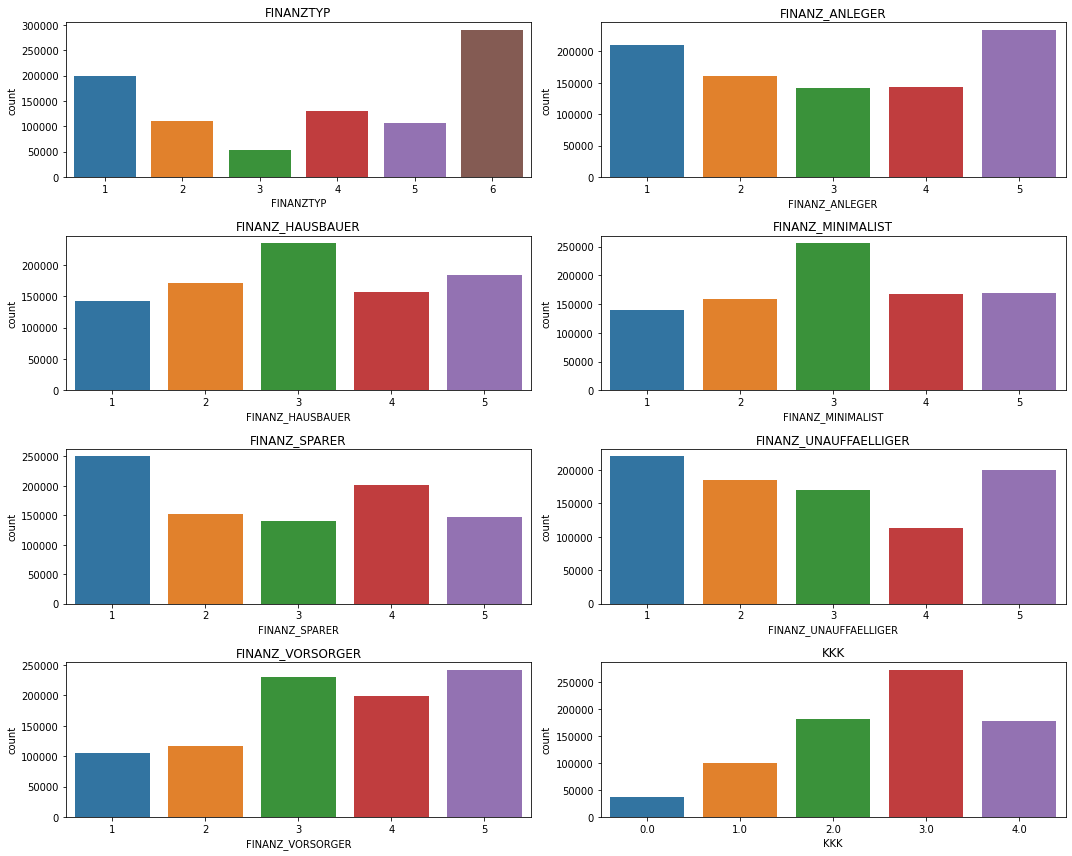

In [84]:
plot_multiple_seaborn_plots(azdias_fp, 2)

In [85]:
feature_incl.extend(['FINANZTYP', 'KKK'])

### Transactions

Banking

In [86]:
bank_trns_cols = [
'D19_BANKEN_ANZ_12', # banks - 12 mths
'D19_BANKEN_ANZ_24', # banks 24 mths
'D19_BANKEN_DATUM', # activity description
'D19_BANKEN_DIREKT', # transactional activity (direct banks)
'D19_BANKEN_GROSS', # transactional activity (big banks)
'D19_BANKEN_LOKAL', # transactional activity (local banks)
'D19_BANKEN_OFFLINE_DATUM', # offline banking
'D19_BANKEN_ONLINE_DATUM', # online banking
'D19_BANKEN_ONLINE_QUOTE_12', # amount of online transactions
'D19_BANKEN_REST' # transactional activity (further banks)
]
azdias_bank_trns = azdias[bank_trns_cols]

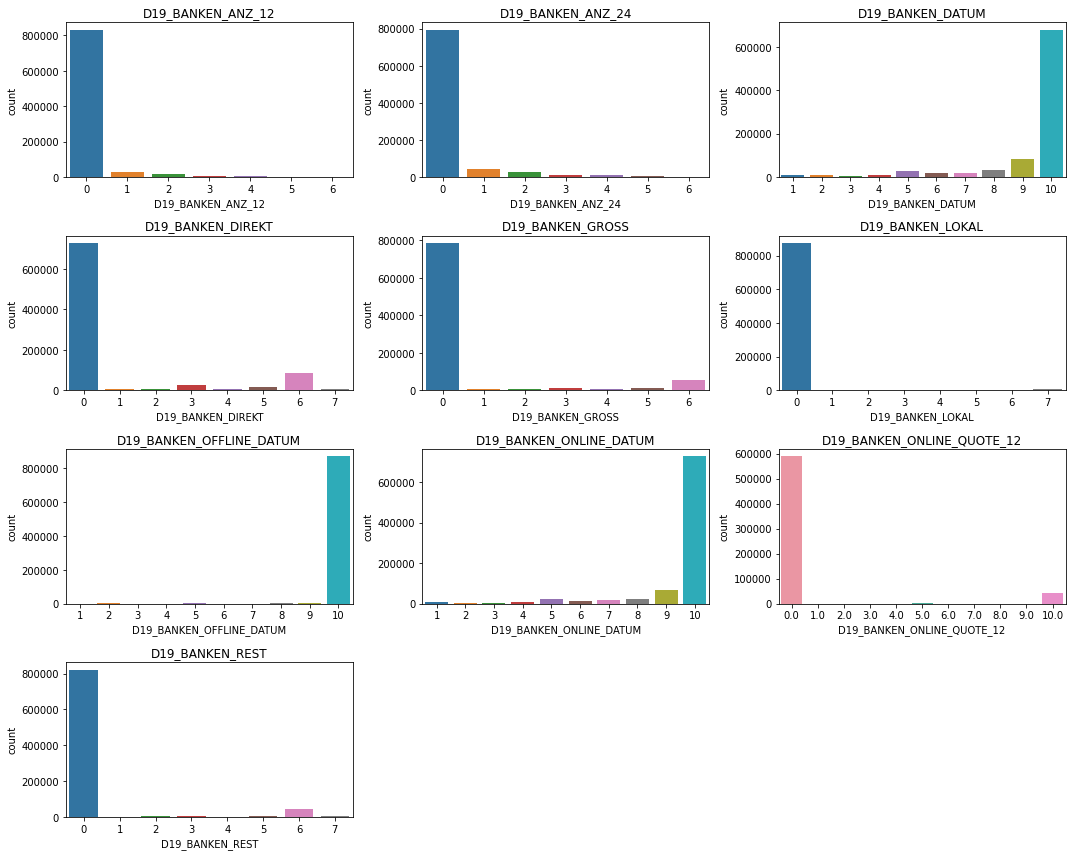

In [87]:
plot_multiple_seaborn_plots(azdias_bank_trns, 3)

- Most of the columns have > 90% in the unknown categories
- use the D19_BANKEN_ONLINE_QUOTE_12 column

In [88]:
bank_features_excl = list(azdias_bank_trns.drop(columns = ['D19_BANKEN_ONLINE_QUOTE_12']))

In [89]:
bank_features_excl

['D19_BANKEN_ANZ_12',
 'D19_BANKEN_ANZ_24',
 'D19_BANKEN_DATUM',
 'D19_BANKEN_DIREKT',
 'D19_BANKEN_GROSS',
 'D19_BANKEN_LOKAL',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_REST']

In [90]:
feature_excl.extend(bank_features_excl)

In [91]:
feature_excl

['ALTER_KIND1',
 'ALTER_KIND2',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'EXTSEL992',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'GEBURTSJAHR',
 'ALTER_HH',
 'TITEL_KZ',
 'NATIONALITAET_KZ',
 'ANZ_HH_TITEL',
 'ANZ_TITEL',
 'SOHO_KZ',
 'KBA05_ANTG4',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'KBA13_HALTER_40',
 'KBA05_MOD1',
 'KBA13_ALTERHALTER_61',
 'KBA13_BMW',
 'KBA13_KMH_211',
 'KBA05_KRSHERST2',
 'KBA13_ALTERHALTER_60',
 'KBA05_MOTRAD',
 'KBA05_ALTER4',
 'KBA05_MOD2',
 'KBA05_MOTOR',
 'KBA13_VORB_1',
 'KBA13_VW',
 'KBA05_ZUL4',
 'KBA05_CCM4',
 'KBA13_SEG_VAN',
 'KBA13_KW_30',
 'KBA05_MAXVORB',
 'KBA13_HALTER_25',
 'KBA13_KRSSEG_VAN',
 'KBA05_SEG4',
 'KBA05_SEG8',
 'KBA13_SEG_MINIVANS',
 'KBA05_SEG5',
 'KBA05_KW1',
 'KBA05_CCM3',
 'KBA05_HERST1',
 'KBA05_CCM1',
 'KBA13_BJ_1999',
 'KBA13_BJ_2004',
 'KBA13_HALTER_35',
 'KBA13_HALTER_55',
 'KBA05_SEG1',
 'KBA13_HERST_AUDI_VW',
 'KBA13_KMH_110',
 'KBA05_HERST2',
 'KBA13_HERST_SONST',
 'KBA05_MOD4',
 'KBA05_AUTOQUOT',
 'KBA05_SEG3',
 'KBA05_HERST3',
 'KBA13_BJ_

In [92]:
feature_incl.extend(['D19_BANKEN_ONLINE_DATUM',
'D19_BANKEN_ANZ_24'])

Product Spend

In [93]:
prod_cols = ['D19_BEKLEIDUNG_GEH', # luxury clothing
'D19_BEKLEIDUNG_REST', # further luxury clothing
'D19_BILDUNG', # education
'D19_BIO_OEKO', # eco
'D19_BUCH_CD', # books/cds
'D19_DIGIT_SERV', # digital services
'D19_DROGERIEARTIKEL', # drugstores
'D19_ENERGIE', # energy
'D19_FREIZEIT', # Leisure products
'D19_GARTEN', # garden
'D19_GESAMT_ANZ_12',  # pool 12
# 'D19_GESAMT_ANZ_24', # pool 24 months  
'D19_HANDWERK', #diy
'D19_HAUS_DEKO', # house decor
'D19_KINDERARTIKEL', # childrens prod
'D19_KOSMETIK', # cosmetic products
'D19_LEBENSMITTEL', # food products
'D19_LOTTO', # lotto
'D19_NAHRUNGSERGAENZUNG', # dietary supplements
'D19_RATGEBER', # guidebooks
'D19_REISEN', # travel related products
'D19_SAMMELARTIKEL', # collectible items
'D19_SCHUHE', # shoes 
'D19_SONSTIGE', # all other categories
'D19_TECHNIK', # tech
 'D19_TIERARTIKEL', # animal products
 'D19_VERSICHERUNGEN', # insurance
 'D19_VERSI_ANZ_12', # insurance 12 mths
#  'D19_VERSI_ANZ_24', # insurance 24 mths
 'D19_WEIN_FEINKOST' # wine and gourmet food
]
azdias_prod_trns = azdias[prod_cols]

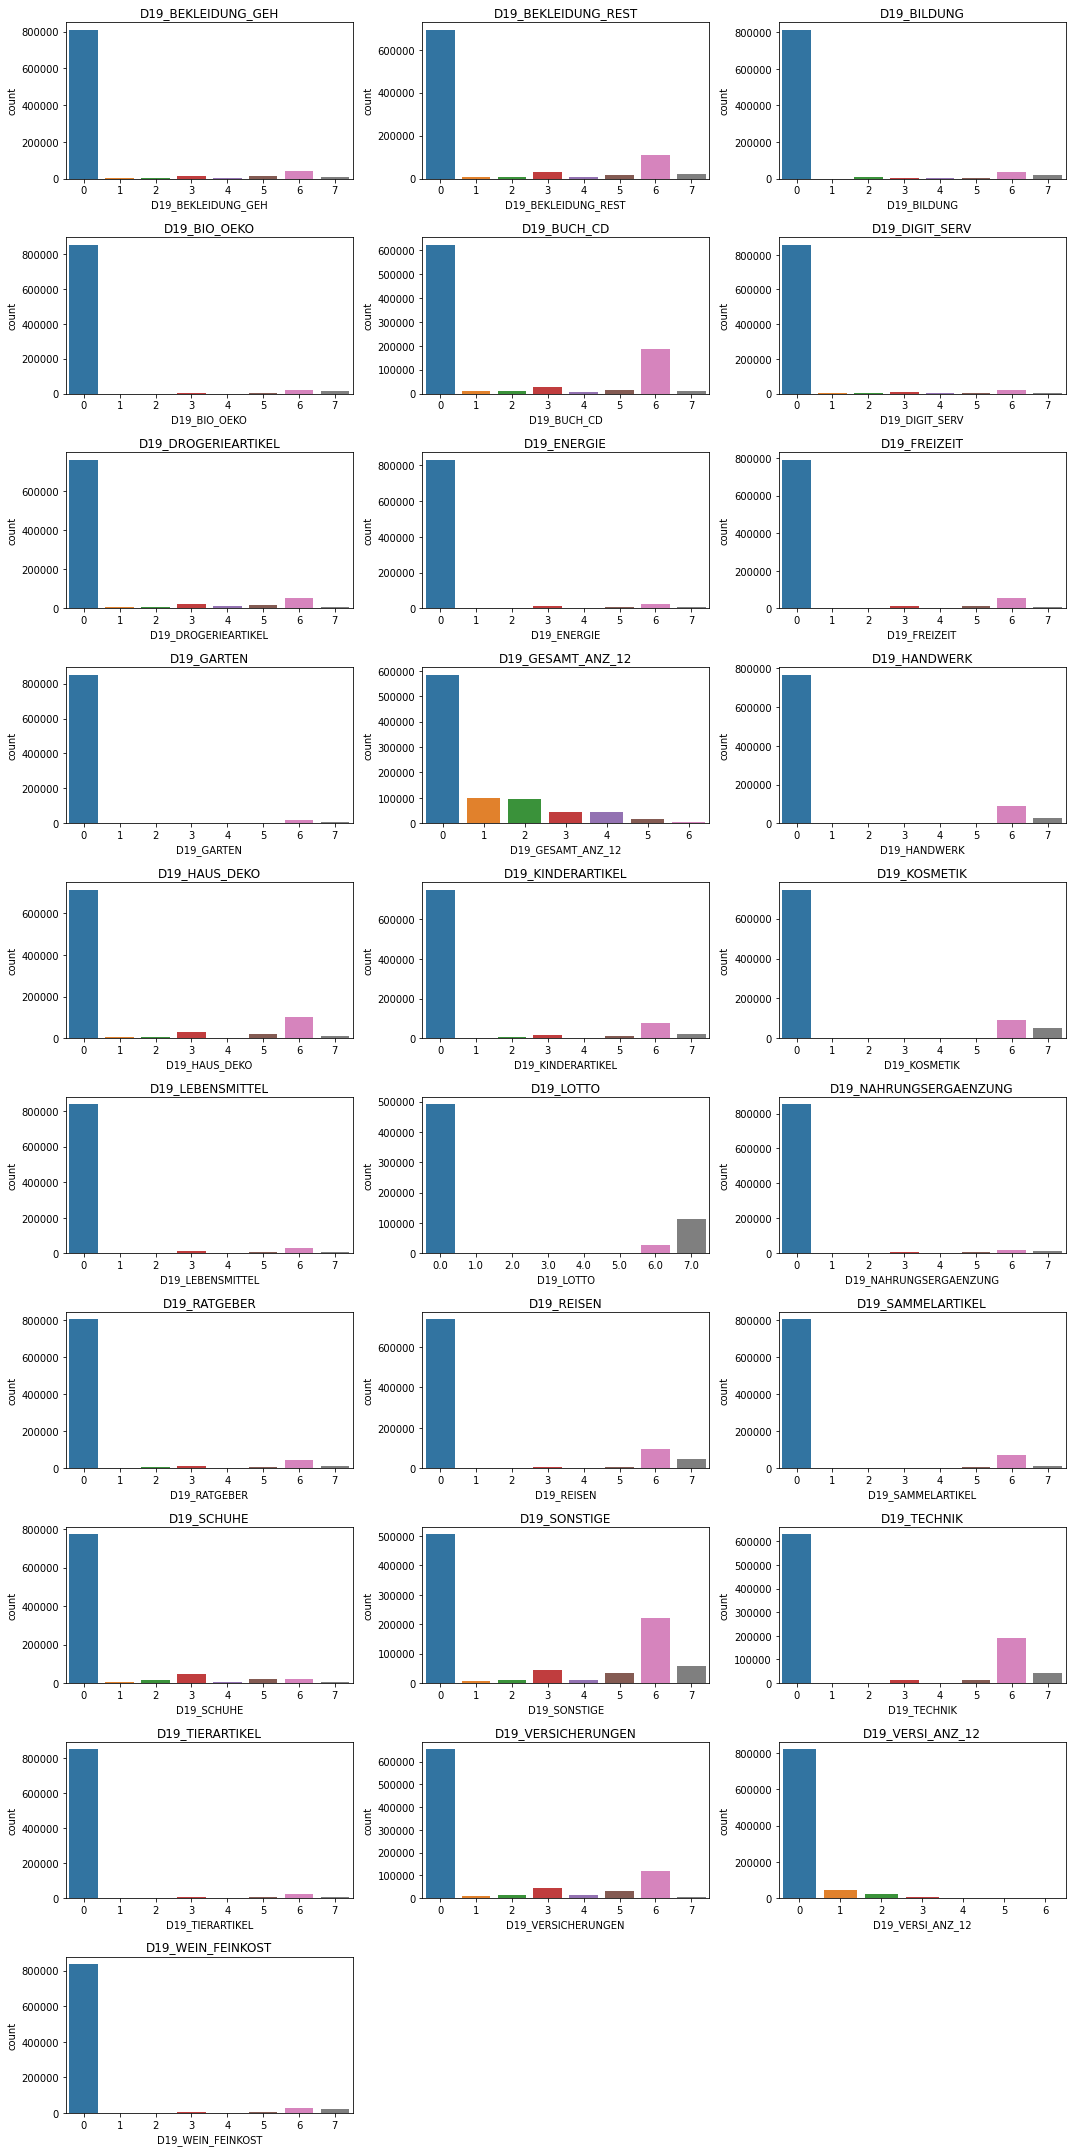

In [94]:
plot_multiple_seaborn_plots(azdias_prod_trns, 3)

Transaction distributions are skewed to zero, which makes sense as customers in general may not have transactions across all types, so these columns can be kept for the first iteration.

In [95]:
feature_incl.extend(prod_cols)

General transactions

In [96]:
total_trns = ['D19_GESAMT_DATUM', # total transaction activity
              'D19_GESAMT_OFFLINE_DATUM', # offline
              'D19_GESAMT_ONLINE_DATUM', # online last transaction
              'D19_GESAMT_ONLINE_QUOTE_12', # online amount              
]
azdias_tot_trns = azdias[total_trns]

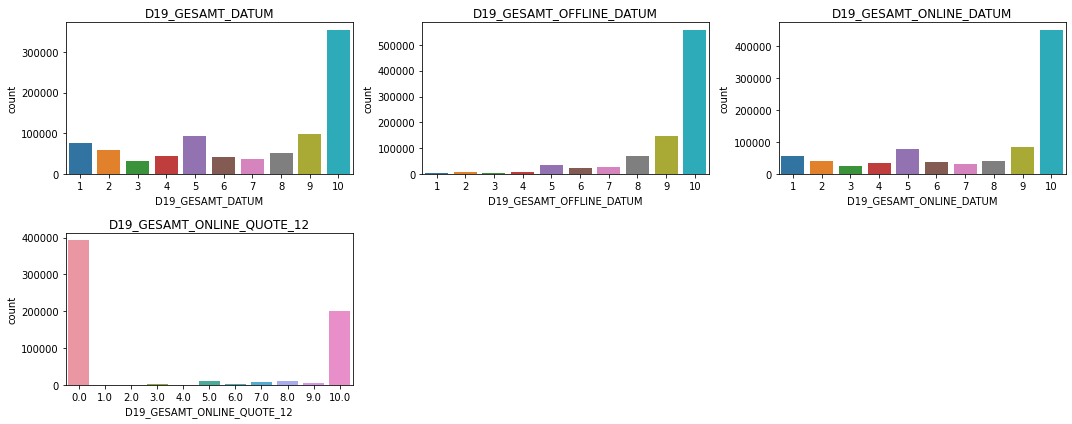

In [97]:
plot_multiple_seaborn_plots(azdias_tot_trns, 3)

In [98]:
feature_incl.extend(['D19_GESAMT_DATUM', # total transaction activity
              'D19_GESAMT_ONLINE_DATUM', # online last transaction 
])

In [99]:
feature_incl

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP',
 'HH_EINKOMMEN_SCORE',
 'LP_FAMILIE_FEIN',
 'W_KEIT_KIND_HH',
 'BALLRAUM',
 'GEBAEUDETYP',
 'INNENSTADT',
 'KONSUMNAEHE',
 'WOHNLAGE',
 'ORTSGR_KLS9',
 'REGIOTYP',
 'RELAT_AB',
 'KBA05_AUTOQUOT',
 'KBA13_VORB_0',
 'KBA13_VORB_1',
 'KBA13_VORB_1_2',
 'KBA13_VORB_2',
 'KBA13_VORB_3',
 'CAMEO_DEUG_2015',
 'CJT_GESAMTTYP',
 'D19_KONSUMTYP',
 'RETOURTYP_BK_S',
 'SHOPPER_TYP',
 'FINANZTYP',
 'KKK',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_ANZ_24',
 'D19_BEKLEIDUNG_GEH',
 'D19_BEKLEIDUNG_REST',
 'D19_BILDUNG',
 'D19_BIO_OEKO',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_ENERGIE',
 'D19_FREIZEIT'

Mail order

In [100]:
mail_order_cols = [
'D19_VERSAND_ANZ_12', # mail order activity 12 months
'D19_VERSAND_ANZ_24', # mail order 24 months
'D19_VERSAND_DATUM', # mail order activity last 
'D19_VERSAND_OFFLINE_DATUM', # mail order offline 
'D19_VERSAND_ONLINE_DATUM', # mail order online
'D19_VERSAND_ONLINE_QUOTE_12', # amount of online mail order transactions
'D19_VERSAND_REST', # further mail order
'D19_VOLLSORTIMENT', # complete mail order offers
]
azdias_mo = azdias[mail_order_cols]

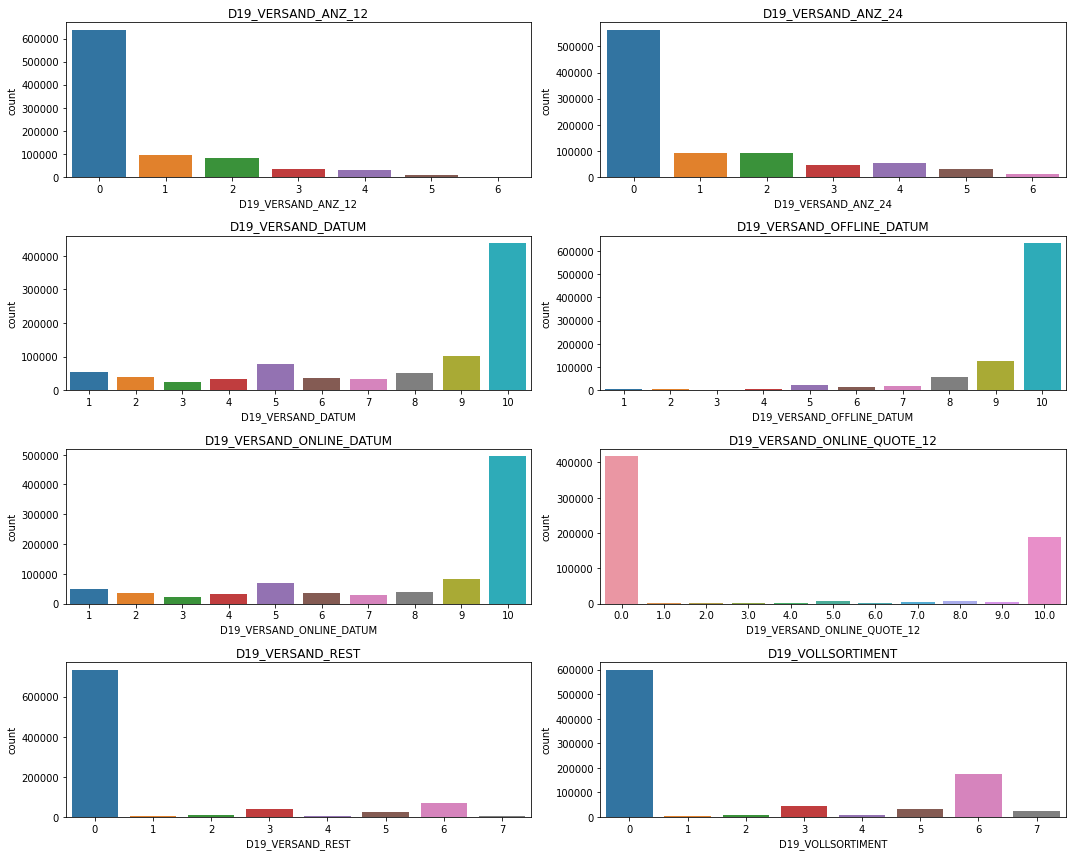

In [101]:
plot_multiple_seaborn_plots(azdias_mo, 2)

In [102]:
feature_incl.extend(mail_order_cols)

In [103]:
feature_incl

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP',
 'HH_EINKOMMEN_SCORE',
 'LP_FAMILIE_FEIN',
 'W_KEIT_KIND_HH',
 'BALLRAUM',
 'GEBAEUDETYP',
 'INNENSTADT',
 'KONSUMNAEHE',
 'WOHNLAGE',
 'ORTSGR_KLS9',
 'REGIOTYP',
 'RELAT_AB',
 'KBA05_AUTOQUOT',
 'KBA13_VORB_0',
 'KBA13_VORB_1',
 'KBA13_VORB_1_2',
 'KBA13_VORB_2',
 'KBA13_VORB_3',
 'CAMEO_DEUG_2015',
 'CJT_GESAMTTYP',
 'D19_KONSUMTYP',
 'RETOURTYP_BK_S',
 'SHOPPER_TYP',
 'FINANZTYP',
 'KKK',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_ANZ_24',
 'D19_BEKLEIDUNG_GEH',
 'D19_BEKLEIDUNG_REST',
 'D19_BILDUNG',
 'D19_BIO_OEKO',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_ENERGIE',
 'D19_FREIZEIT'

In [105]:
feature_incl.append('LNR')

In [104]:
azdias.columns

Index(['LNR', 'AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTER_KIND1',
       'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN',
       'ANZ_HAUSHALTE_AKTIV',
       ...
       'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'W_KEIT_KIND_HH',
       'WOHNDAUER_2008', 'WOHNLAGE', 'ZABEOTYP', 'ANREDE_KZ',
       'ALTERSKATEGORIE_GROB'],
      dtype='object', length=366)

## Prepare dataframe for modelling

### Impute nulls

In [106]:
len(feature_excl)

109

In [107]:
len(feature_incl)

88

In [100]:
# iteration 1
# df = azdias.drop(columns = feature_excl)

In [108]:
feature_incl

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP',
 'HH_EINKOMMEN_SCORE',
 'LP_FAMILIE_FEIN',
 'W_KEIT_KIND_HH',
 'BALLRAUM',
 'GEBAEUDETYP',
 'INNENSTADT',
 'KONSUMNAEHE',
 'WOHNLAGE',
 'ORTSGR_KLS9',
 'REGIOTYP',
 'RELAT_AB',
 'KBA05_AUTOQUOT',
 'KBA13_VORB_0',
 'KBA13_VORB_1',
 'KBA13_VORB_1_2',
 'KBA13_VORB_2',
 'KBA13_VORB_3',
 'CAMEO_DEUG_2015',
 'CJT_GESAMTTYP',
 'D19_KONSUMTYP',
 'RETOURTYP_BK_S',
 'SHOPPER_TYP',
 'FINANZTYP',
 'KKK',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_ANZ_24',
 'D19_BEKLEIDUNG_GEH',
 'D19_BEKLEIDUNG_REST',
 'D19_BILDUNG',
 'D19_BIO_OEKO',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_ENERGIE',
 'D19_FREIZEIT'

In [181]:
# iteration 2
df = azdias[feature_incl]
customer_df = customers[feature_incl]

In [182]:
df.shape

(891221, 88)

In [183]:
df.to_csv('original_dataset.csv')

In [184]:
df.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 'ONLINE_AFFINITAET',
       'PRAEGENDE_JUGENDJAHRE', 'VERS_TYP', 'SEMIO_DOM', 'SEMIO_ERL',
       'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_MAT',
       'SEMIO_PFLICHT', 'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV',
       'SEMIO_VERT', 'ZABEOTYP', 'HH_EINKOMMEN_SCORE', 'LP_FAMILIE_FEIN',
       'W_KEIT_KIND_HH', 'BALLRAUM', 'GEBAEUDETYP', 'INNENSTADT',
       'KONSUMNAEHE', 'WOHNLAGE', 'ORTSGR_KLS9', 'REGIOTYP', 'RELAT_AB',
       'KBA05_AUTOQUOT', 'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2',
       'KBA13_VORB_2', 'KBA13_VORB_3', 'CAMEO_DEUG_2015', 'CJT_GESAMTTYP',
       'D19_KONSUMTYP', 'RETOURTYP_BK_S', 'SHOPPER_TYP', 'FINANZTYP', 'KKK',
       'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ANZ_24', 'D19_BEKLEIDUNG_GEH',
       'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD',
       'D19_DIGIT_SERV', 'D19_DROGERI

In [185]:
data_quality_pdf = check_missing_values(df)

In [186]:
data_quality_pdf.sort_values('pct_nulls', ascending = False)

index    dtype  null_values  pct_nulls  \
42                D19_KONSUMTYP  float64       257113  28.849522   
65                    D19_LOTTO  float64       257113  28.849522   
84  D19_VERSAND_ONLINE_QUOTE_12  float64       257113  28.849522   
34               KBA05_AUTOQUOT  float64       133324  14.959701   
32                     REGIOTYP  float64       121196  13.598872   
46                          KKK  float64       121196  13.598872   
25               W_KEIT_KIND_HH  float64       107602  12.073549   
37               KBA13_VORB_1_2  float64       105800  11.871354   
38                 KBA13_VORB_2  float64       105800  11.871354   
39                 KBA13_VORB_3  float64       105800  11.871354   
36                 KBA13_VORB_1  float64       105800  11.871354   
35                 KBA13_VORB_0  float64       105800  11.871354   
40              CAMEO_DEUG_2015   object        98979  11.106000   
33                     RELAT_AB  float64        97216  10.908181   
31                  ORTSGR_KLS9  float64        97216  10.908181   
28                   INNENSTADT  float64        93740  10.518154   
26                     BALLRAUM  float64        93740  10.518154   
30                     WOHNLAGE  float64        93148  10.451729   
27                  GEBAEUDETYP  float64        93148  10.451729   
29                  KONSUMNAEHE  float64        73969   8.299737   
23           HH_EINKOMMEN_SCORE  float64        18348   2.058749   
4           LP_LEBENSPHASE_GROB  float64         4854   0.544646   
5                LP_STATUS_GROB  float64         4854   0.544646   
24              LP_FAMILIE_FEIN  float64         4854   0.544646   
6             ONLINE_AFFINITAET  float64         4854   0.544646   
41                CJT_GESAMTTYP  float64         4854   0.544646   
43               RETOURTYP_BK_S  float64         4854   0.544646   
66       D19_NAHRUNGSERGAENZUNG    int64            0   0.000000   
61                D19_HAUS_DEKO    int64            0   0.000000   
62            D19_KINDERARTIKEL    int64            0   0.000000   
68                   D19_REISEN    int64            0   0.000000   
67                 D19_RATGEBER    int64            0   0.000000   
60                 D19_HANDWERK    int64            0   0.000000   
63                 D19_KOSMETIK    int64            0   0.000000   
59            D19_GESAMT_ANZ_12    int64            0   0.000000   
64             D19_LEBENSMITTEL    int64            0   0.000000   
0          ALTERSKATEGORIE_GROB    int64            0   0.000000   
57                 D19_FREIZEIT    int64            0   0.000000   
78      D19_GESAMT_ONLINE_DATUM    int64            0   0.000000   
86            D19_VOLLSORTIMENT    int64            0   0.000000   
85             D19_VERSAND_REST    int64            0   0.000000   
83     D19_VERSAND_ONLINE_DATUM    int64            0   0.000000   
82    D19_VERSAND_OFFLINE_DATUM    int64            0   0.000000   
81            D19_VERSAND_DATUM    int64            0   0.000000   
80           D19_VERSAND_ANZ_24    int64            0   0.000000   
79           D19_VERSAND_ANZ_12    int64            0   0.000000   
77             D19_GESAMT_DATUM    int64            0   0.000000   
69            D19_SAMMELARTIKEL    int64            0   0.000000   
76            D19_WEIN_FEINKOST    int64            0   0.000000   
75             D19_VERSI_ANZ_12    int64            0   0.000000   
74           D19_VERSICHERUNGEN    int64            0   0.000000   
73              D19_TIERARTIKEL    int64            0   0.000000   
72                  D19_TECHNIK    int64            0   0.000000   
71                 D19_SONSTIGE    int64            0   0.000000   
70                   D19_SCHUHE    int64            0   0.000000   
58                   D19_GARTEN    int64            0   0.000000   
44                  SHOPPER_TYP    int64            0   0.000000   
56                  D19_ENERGIE    int64            0   0.000000   
18            

In [187]:
columns_to_impute = data_quality_pdf[data_quality_pdf.null_values>0]

In [188]:
columns_to_impute

index    dtype  null_values  pct_nulls  \
4           LP_LEBENSPHASE_GROB  float64         4854   0.544646   
5                LP_STATUS_GROB  float64         4854   0.544646   
6             ONLINE_AFFINITAET  float64         4854   0.544646   
23           HH_EINKOMMEN_SCORE  float64        18348   2.058749   
24              LP_FAMILIE_FEIN  float64         4854   0.544646   
25               W_KEIT_KIND_HH  float64       107602  12.073549   
26                     BALLRAUM  float64        93740  10.518154   
27                  GEBAEUDETYP  float64        93148  10.451729   
28                   INNENSTADT  float64        93740  10.518154   
29                  KONSUMNAEHE  float64        73969   8.299737   
30                     WOHNLAGE  float64        93148  10.451729   
31                  ORTSGR_KLS9  float64        97216  10.908181   
32                     REGIOTYP  float64       121196  13.598872   
33                     RELAT_AB  float64        97216  10.908181   
34               KBA05_AUTOQUOT  float64       133324  14.959701   
35                 KBA13_VORB_0  float64       105800  11.871354   
36                 KBA13_VORB_1  float64       105800  11.871354   
37               KBA13_VORB_1_2  float64       105800  11.871354   
38                 KBA13_VORB_2  float64       105800  11.871354   
39                 KBA13_VORB_3  float64       105800  11.871354   
40              CAMEO_DEUG_2015   object        98979  11.106000   
41                CJT_GESAMTTYP  float64         4854   0.544646   
42                D19_KONSUMTYP  float64       257113  28.849522   
43               RETOURTYP_BK_S  float64         4854   0.544646   
46                          KKK  float64       121196  13.598872   
65                    D19_LOTTO  float64       257113  28.849522   
84  D19_VERSAND_ONLINE_QUOTE_12  float64       257113  28.849522   

    unique_values  non_zero_values  
4              13           801503  
5               5           891221  
6               6           825505  
23              6           891221  
24             12           818283  
25              7           850835  
26              7           891221  
27              7           891221  
28              8           891221  
29              7           891221  
30              8           884271  
31             10           891163  
32              8           854353  
33              6           891221  
34              6           891221  
35              5           891221  
36              5           891221  
37              5           891221  
38              5           891221  
39              6           747937  
40             19           891221  
41              6           891221  
42              7           891221  
43              5           891221  
46              5           854353  
65              8           400378  
84             11           473854

In [189]:
# number of columns to impute
columns_to_impute.shape

(27, 6)

In [191]:
# impute with mode
import pandas as pd

def impute_with_mode(df):
    """
    Impute missing values in a DataFrame with the mode of each column.
    
    Parameters:
    - df: DataFrame containing the data
    
    Returns:
    - df_imputed: DataFrame with missing values imputed using the mode
    """
    # Calculate the mode for each column
    mode_values = df.mode().iloc[0]
    
    # Impute missing values with the mode for each column
    df_imputed = df.drop(columns = {'LNR'}).fillna(mode_values)
    
    return df_imputed

data_imputed = impute_with_mode(df)
customer_data_imputed = impute_with_mode(customer_df)

In [192]:
data_imputed['LNR'] = df['LNR']

In [193]:
check_missing_values(data_imputed)

index    dtype  null_values  pct_nulls  \
0          ALTERSKATEGORIE_GROB    int64            0        0.0   
1                     ANREDE_KZ    int64            0        0.0   
2              GREEN_AVANTGARDE    int64            0        0.0   
3                    HEALTH_TYP    int64            0        0.0   
4           LP_LEBENSPHASE_GROB  float64            0        0.0   
5                LP_STATUS_GROB  float64            0        0.0   
6             ONLINE_AFFINITAET  float64            0        0.0   
7         PRAEGENDE_JUGENDJAHRE    int64            0        0.0   
8                      VERS_TYP    int64            0        0.0   
9                     SEMIO_DOM    int64            0        0.0   
10                    SEMIO_ERL    int64            0        0.0   
11                    SEMIO_FAM    int64            0        0.0   
12                   SEMIO_KAEM    int64            0        0.0   
13                   SEMIO_KRIT    int64            0        0.0   
14                   SEMIO_KULT    int64            0        0.0   
15                    SEMIO_MAT    int64            0        0.0   
16                SEMIO_PFLICHT    int64            0        0.0   
17                    SEMIO_RAT    int64            0        0.0   
18                    SEMIO_REL    int64            0        0.0   
19                    SEMIO_SOZ    int64            0        0.0   
20                  SEMIO_TRADV    int64            0        0.0   
21                   SEMIO_VERT    int64            0        0.0   
22                     ZABEOTYP    int64            0        0.0   
23           HH_EINKOMMEN_SCORE  float64            0        0.0   
24              LP_FAMILIE_FEIN  float64            0        0.0   
25               W_KEIT_KIND_HH  float64            0        0.0   
26                     BALLRAUM  float64            0        0.0   
27                  GEBAEUDETYP  float64            0        0.0   
28                   INNENSTADT  float64            0        0.0   
29                  KONSUMNAEHE  float64            0        0.0   
30                     WOHNLAGE  float64            0        0.0   
31                  ORTSGR_KLS9  float64            0        0.0   
32                     REGIOTYP  float64            0        0.0   
33                     RELAT_AB  float64            0        0.0   
34               KBA05_AUTOQUOT  float64            0        0.0   
35                 KBA13_VORB_0  float64            0        0.0   
36                 KBA13_VORB_1  float64            0        0.0   
37               KBA13_VORB_1_2  float64            0        0.0   
38                 KBA13_VORB_2  float64            0        0.0   
39                 KBA13_VORB_3  float64            0        0.0   
40              CAMEO_DEUG_2015   object            0        0.0   
41                CJT_GESAMTTYP  float64            0        0.0   
42                D19_KONSUMTYP  float64            0        0.0   
43               RETOURTYP_BK_S  float64            0        0.0   
44                  SHOPPER_TYP    int64            0        0.0   
45                    FINANZTYP    int64            0        0.0   
46                          KKK  float64            0        0.0   
47      D19_BANKEN_ONLINE_DATUM    int64            0        0.0   
48            D19_BANKEN_ANZ_24    int64            0        0.0   
49           D19_BEKLEIDUNG_GEH    int64            0        0.0   
50          D19_BEKLEIDUNG_REST    int64            0        0.0   
51                  D19_BILDUNG    int64            0        0.0   
52                 D19_BIO_OEKO    int64            0        0.0   
53                  D19_BUCH_CD    int64            0        0.0   
54               D19_DIGIT_SERV    int64            0        0.0   
55          D19_DROGERIEARTIKEL    int64            0        0.0   
56                  D19_ENERGIE    int64            0        0.0   
57                 D19_FREIZEIT    int64            0        0.0   
58            

In [194]:
data_imputed.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 'ONLINE_AFFINITAET',
       'PRAEGENDE_JUGENDJAHRE', 'VERS_TYP', 'SEMIO_DOM', 'SEMIO_ERL',
       'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_MAT',
       'SEMIO_PFLICHT', 'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV',
       'SEMIO_VERT', 'ZABEOTYP', 'HH_EINKOMMEN_SCORE', 'LP_FAMILIE_FEIN',
       'W_KEIT_KIND_HH', 'BALLRAUM', 'GEBAEUDETYP', 'INNENSTADT',
       'KONSUMNAEHE', 'WOHNLAGE', 'ORTSGR_KLS9', 'REGIOTYP', 'RELAT_AB',
       'KBA05_AUTOQUOT', 'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2',
       'KBA13_VORB_2', 'KBA13_VORB_3', 'CAMEO_DEUG_2015', 'CJT_GESAMTTYP',
       'D19_KONSUMTYP', 'RETOURTYP_BK_S', 'SHOPPER_TYP', 'FINANZTYP', 'KKK',
       'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ANZ_24', 'D19_BEKLEIDUNG_GEH',
       'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD',
       'D19_DIGIT_SERV', 'D19_DROGERI

### encode variables

Most of the variables are already ordinally encoded. The following variables need to be categorically encoded.

In [195]:
df_with_dummies = pd.get_dummies(data_imputed, columns=['CJT_GESAMTTYP'
#                                                         , 'RETOURTYP_BK_S', 'FINANZTYP', 'D19_KONSUMTYP'
                                                       ])
customer_df_with_dummies = pd.get_dummies(customer_data_imputed, columns=['CJT_GESAMTTYP', 
#                                                                 'RETOURTYP_BK_S', 'FINANZTYP', 'D19_KONSUMTYP'
                                                               ])

In [196]:
df_with_dummies.head()

ALTERSKATEGORIE_GROB  ANREDE_KZ  GREEN_AVANTGARDE  HEALTH_TYP  \
0                     2          1                 0          -1   
1                     1          2                 0           3   
2                     3          2                 1           3   
3                     4          2                 0           2   
4                     3          1                 0           3   

   LP_LEBENSPHASE_GROB  LP_STATUS_GROB  ONLINE_AFFINITAET  \
0                  4.0             1.0                1.0   
1                  6.0             1.0                3.0   
2                  1.0             2.0                2.0   
3                  0.0             4.0                1.0   
4                 10.0             2.0                5.0   

   PRAEGENDE_JUGENDJAHRE  VERS_TYP  SEMIO_DOM  SEMIO_ERL  SEMIO_FAM  \
0                      0        -1          6          3          6   
1                     14         2          7          2          4   
2                     15         1          7          6          1   
3                      8         1          4          7          1   
4                      8         2          2          4          4   

   SEMIO_KAEM  SEMIO_KRIT  SEMIO_KULT  SEMIO_MAT  SEMIO_PFLICHT  SEMIO_RAT  \
0           6           7           3          5              5          4   
1           4           4           3          3              7          6   
2           7           7           3          3              3          4   
3           5           4           4          1              4          3   
4           2           3           6          2              4          2   

   SEMIO_REL  SEMIO_SOZ  SEMIO_TRADV  SEMIO_VERT  ZABEOTYP  \
0          7          2            3           1         3   
1          4          5            6           1         5   
2          3          4            3           4         5   
3          2          5            4           4         3   
4          4          6            2           7         4   

   HH_EINKOMMEN_SCORE  LP_FAMILIE_FEIN  W_KEIT_KIND_HH  BALLRAUM  GEBAEUDETYP  \
0                 2.0              2.0             6.0       6.0          1.0   
1                 6.0              5.0             3.0       6.0          8.0   
2                 4.0              1.0             3.0       2.0          1.0   
3                 1.0              0.0             6.0       4.0          1.0   
4                 5.0             10.0             2.0       2.0          1.0   

   INNENSTADT  KONSUMNAEHE  WOHNLAGE  ORTSGR_KLS9  REGIOTYP  RELAT_AB  \
0         5.0          1.0       3.0          5.0       6.0       3.0   
1         8.0          1.0       4.0          5.0       3.0       4.0   
2         4.0          5.0       2.0          5.0       2.0       2.0   
3         6.0          4.0       7.0          3.0       0.0       3.0   
4         1.0          4.0       3.0          6.0       5.0       5.0   

   KBA05_AUTOQUOT  KBA13_VORB_0  KBA13_VORB_1  KBA13_VORB_1_2  KBA13_VORB_2  \
0             3.0           3.0           3.0             3.0           3.0   
1             1.0           3.0           3.0             3.0           3.0   
2             3.0           3.0           4.0             4.0           2.0   
3             4.0           4.0           3.0             2.0           3.0   
4             3.0           4.0           2.0             2.0           3.0   

   KBA13_VORB_3 CAMEO_DEUG_2015  D19_KONSUMTYP  RETOURTYP_BK_S  SHOPPER_TYP  \
0           3.0               8            9.0             5.0           -1   
1           3.0               8            9.0             1.0            3   
2           2.0               4            9.0             3.0            2   
3           2.0               2            9.0             2.0            1   
4           4.0               6            1.0             5.0            2   

   FINANZTYP  KKK  D19_BANKEN_ONLINE_DATUM  D19_BANKEN_ANZ_24  \
0          4  3.0

In [197]:
df_with_dummies.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 'ONLINE_AFFINITAET',
       'PRAEGENDE_JUGENDJAHRE', 'VERS_TYP', 'SEMIO_DOM', 'SEMIO_ERL',
       'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_MAT',
       'SEMIO_PFLICHT', 'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV',
       'SEMIO_VERT', 'ZABEOTYP', 'HH_EINKOMMEN_SCORE', 'LP_FAMILIE_FEIN',
       'W_KEIT_KIND_HH', 'BALLRAUM', 'GEBAEUDETYP', 'INNENSTADT',
       'KONSUMNAEHE', 'WOHNLAGE', 'ORTSGR_KLS9', 'REGIOTYP', 'RELAT_AB',
       'KBA05_AUTOQUOT', 'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2',
       'KBA13_VORB_2', 'KBA13_VORB_3', 'CAMEO_DEUG_2015', 'D19_KONSUMTYP',
       'RETOURTYP_BK_S', 'SHOPPER_TYP', 'FINANZTYP', 'KKK',
       'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ANZ_24', 'D19_BEKLEIDUNG_GEH',
       'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD',
       'D19_DIGIT_SERV', 'D19_DROGERIEARTIKEL', 'D19_E

## Check dtypes

In [198]:
df_with_dummies[['CAMEO_DEUG_2015']].value_counts()

CAMEO_DEUG_2015
8                  177002
9                   62578
6                   61253
4                   60185
8.0                 56418
3                   50360
2                   48276
9.0                 45599
7                   45021
6.0                 44621
4.0                 43727
3.0                 36419
2.0                 34955
7.0                 32912
5                   32292
5.0                 23018
1                   20997
1.0                 15215
X                     373
dtype: int64

In [199]:
df_train = df_with_dummies

In [200]:
df_train = df_train[(df_train.CAMEO_DEUG_2015 != 'X')]
customer_df = customer_df_with_dummies[customer_df_with_dummies.CAMEO_DEUG_2015 != 'X']

In [201]:
customer_df.shape

(191526, 92)

In [230]:
customer_df.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 'ONLINE_AFFINITAET',
       'PRAEGENDE_JUGENDJAHRE', 'VERS_TYP', 'SEMIO_DOM', 'SEMIO_ERL',
       'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_MAT',
       'SEMIO_PFLICHT', 'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV',
       'SEMIO_VERT', 'ZABEOTYP', 'HH_EINKOMMEN_SCORE', 'LP_FAMILIE_FEIN',
       'W_KEIT_KIND_HH', 'BALLRAUM', 'GEBAEUDETYP', 'INNENSTADT',
       'KONSUMNAEHE', 'WOHNLAGE', 'ORTSGR_KLS9', 'REGIOTYP', 'RELAT_AB',
       'KBA05_AUTOQUOT', 'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2',
       'KBA13_VORB_2', 'KBA13_VORB_3', 'CAMEO_DEUG_2015', 'D19_KONSUMTYP',
       'RETOURTYP_BK_S', 'SHOPPER_TYP', 'FINANZTYP', 'KKK',
       'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ANZ_24', 'D19_BEKLEIDUNG_GEH',
       'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD',
       'D19_DIGIT_SERV', 'D19_DROGERIEARTIKEL', 'D19_E

In [231]:
df_train.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 'ONLINE_AFFINITAET',
       'PRAEGENDE_JUGENDJAHRE', 'VERS_TYP', 'SEMIO_DOM', 'SEMIO_ERL',
       'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_MAT',
       'SEMIO_PFLICHT', 'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV',
       'SEMIO_VERT', 'ZABEOTYP', 'HH_EINKOMMEN_SCORE', 'LP_FAMILIE_FEIN',
       'W_KEIT_KIND_HH', 'BALLRAUM', 'GEBAEUDETYP', 'INNENSTADT',
       'KONSUMNAEHE', 'WOHNLAGE', 'ORTSGR_KLS9', 'REGIOTYP', 'RELAT_AB',
       'KBA05_AUTOQUOT', 'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2',
       'KBA13_VORB_2', 'KBA13_VORB_3', 'CAMEO_DEUG_2015', 'D19_KONSUMTYP',
       'RETOURTYP_BK_S', 'SHOPPER_TYP', 'FINANZTYP', 'KKK',
       'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ANZ_24', 'D19_BEKLEIDUNG_GEH',
       'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD',
       'D19_DIGIT_SERV', 'D19_DROGERIEARTIKEL', 'D19_E

In [203]:
df_train['CAMEO_DEUG_2015'] = df_train['CAMEO_DEUG_2015'].astype(float)

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [204]:
df_train.dtypes

ALTERSKATEGORIE_GROB             int64
ANREDE_KZ                        int64
GREEN_AVANTGARDE                 int64
HEALTH_TYP                       int64
LP_LEBENSPHASE_GROB            float64
LP_STATUS_GROB                 float64
ONLINE_AFFINITAET              float64
PRAEGENDE_JUGENDJAHRE            int64
VERS_TYP                         int64
SEMIO_DOM                        int64
SEMIO_ERL                        int64
SEMIO_FAM                        int64
SEMIO_KAEM                       int64
SEMIO_KRIT                       int64
SEMIO_KULT                       int64
SEMIO_MAT                        int64
SEMIO_PFLICHT                    int64
SEMIO_RAT                        int64
SEMIO_REL                        int64
SEMIO_SOZ                        int64
SEMIO_TRADV                      int64
SEMIO_VERT                       int64
ZABEOTYP                         int64
HH_EINKOMMEN_SCORE             float64
LP_FAMILIE_FEIN                float64
W_KEIT_KIND_HH           

In [136]:
# df_train.to_csv('original_dataset_imputed.csv')

# 4 Modelling

## Determining number of clusters

In [205]:
df=df_train

In [206]:
df.head()

ALTERSKATEGORIE_GROB  ANREDE_KZ  GREEN_AVANTGARDE  HEALTH_TYP  \
0                     2          1                 0          -1   
1                     1          2                 0           3   
2                     3          2                 1           3   
3                     4          2                 0           2   
4                     3          1                 0           3   

   LP_LEBENSPHASE_GROB  LP_STATUS_GROB  ONLINE_AFFINITAET  \
0                  4.0             1.0                1.0   
1                  6.0             1.0                3.0   
2                  1.0             2.0                2.0   
3                  0.0             4.0                1.0   
4                 10.0             2.0                5.0   

   PRAEGENDE_JUGENDJAHRE  VERS_TYP  SEMIO_DOM  SEMIO_ERL  SEMIO_FAM  \
0                      0        -1          6          3          6   
1                     14         2          7          2          4   
2                     15         1          7          6          1   
3                      8         1          4          7          1   
4                      8         2          2          4          4   

   SEMIO_KAEM  SEMIO_KRIT  SEMIO_KULT  SEMIO_MAT  SEMIO_PFLICHT  SEMIO_RAT  \
0           6           7           3          5              5          4   
1           4           4           3          3              7          6   
2           7           7           3          3              3          4   
3           5           4           4          1              4          3   
4           2           3           6          2              4          2   

   SEMIO_REL  SEMIO_SOZ  SEMIO_TRADV  SEMIO_VERT  ZABEOTYP  \
0          7          2            3           1         3   
1          4          5            6           1         5   
2          3          4            3           4         5   
3          2          5            4           4         3   
4          4          6            2           7         4   

   HH_EINKOMMEN_SCORE  LP_FAMILIE_FEIN  W_KEIT_KIND_HH  BALLRAUM  GEBAEUDETYP  \
0                 2.0              2.0             6.0       6.0          1.0   
1                 6.0              5.0             3.0       6.0          8.0   
2                 4.0              1.0             3.0       2.0          1.0   
3                 1.0              0.0             6.0       4.0          1.0   
4                 5.0             10.0             2.0       2.0          1.0   

   INNENSTADT  KONSUMNAEHE  WOHNLAGE  ORTSGR_KLS9  REGIOTYP  RELAT_AB  \
0         5.0          1.0       3.0          5.0       6.0       3.0   
1         8.0          1.0       4.0          5.0       3.0       4.0   
2         4.0          5.0       2.0          5.0       2.0       2.0   
3         6.0          4.0       7.0          3.0       0.0       3.0   
4         1.0          4.0       3.0          6.0       5.0       5.0   

   KBA05_AUTOQUOT  KBA13_VORB_0  KBA13_VORB_1  KBA13_VORB_1_2  KBA13_VORB_2  \
0             3.0           3.0           3.0             3.0           3.0   
1             1.0           3.0           3.0             3.0           3.0   
2             3.0           3.0           4.0             4.0           2.0   
3             4.0           4.0           3.0             2.0           3.0   
4             3.0           4.0           2.0             2.0           3.0   

   KBA13_VORB_3  CAMEO_DEUG_2015  D19_KONSUMTYP  RETOURTYP_BK_S  SHOPPER_TYP  \
0           3.0              8.0            9.0             5.0           -1   
1           3.0              8.0            9.0             1.0            3   
2           2.0              4.0            9.0             3.0            2   
3           2.0              2.0            9.0             2.0            1   
4           4.0              6.0            1.0             5.0            2   

   FINANZTYP  KKK  D19_BANKEN_ONLINE_DATUM  D19_BANKEN_ANZ_24  \
0          

In [207]:
def plot_yellowbrick_cluster(pdf, id_col='LNR'):
    from sklearn.cluster import KMeans
    from yellowbrick.cluster import KElbowVisualizer
    print('Elbow Method to determine the number of clusters to be formed:')
    Elbow_M = KElbowVisualizer(KMeans(), k=20)
    Elbow_M.fit(pdf.drop(columns = {id_col}).astype('float').values)
    Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


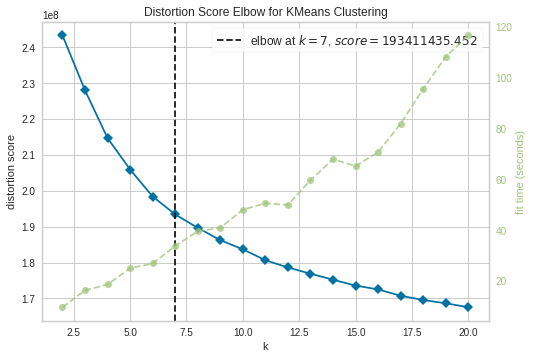

In [104]:
plot_yellowbrick_cluster(df)

In [208]:
# scaling 
pd.set_option('display.max_columns', None)
df.describe()

ALTERSKATEGORIE_GROB      ANREDE_KZ  GREEN_AVANTGARDE     HEALTH_TYP  \
count          890848.00000  890848.000000     890848.000000  890848.000000   
mean                2.77744       1.522081          0.196509       1.792042   
std                 1.06875       0.499512          0.397358       1.269140   
min                 1.00000       1.000000          0.000000      -1.000000   
25%                 2.00000       1.000000          0.000000       1.000000   
50%                 3.00000       2.000000          0.000000       2.000000   
75%                 4.00000       2.000000          0.000000       3.000000   
max                 9.00000       2.000000          1.000000       3.000000   

       LP_LEBENSPHASE_GROB  LP_STATUS_GROB  ONLINE_AFFINITAET  \
count        890848.000000   890848.000000      890848.000000   
mean              4.440324        2.424192           2.694584   
std               3.849632        1.473913           1.518240   
min               0.000000        1.000000           0.000000   
25%               1.000000        1.000000           2.000000   
50%               3.000000        2.000000           3.000000   
75%               8.000000        4.000000           4.000000   
max              12.000000        5.000000           5.000000   

       PRAEGENDE_JUGENDJAHRE       VERS_TYP      SEMIO_DOM      SEMIO_ERL  \
count          890848.000000  890848.000000  890848.000000  890848.000000   
mean                8.153624       1.197795       4.667550       4.481413   
std                 4.844673       0.952593       1.795638       1.807539   
min                 0.000000      -1.000000       1.000000       1.000000   
25%                 5.000000       1.000000       3.000000       3.000000   
50%                 8.000000       1.000000       5.000000       4.000000   
75%                14.000000       2.000000       6.000000       6.000000   
max                15.000000       2.000000       7.000000       7.000000   

           SEMIO_FAM     SEMIO_KAEM     SEMIO_KRIT     SEMIO_KULT  \
count  890848.000000  890848.000000  890848.000000  890848.000000   
mean        4.272793       4.445002       4.763250       4.025015   
std         1.915835       1.852350       1.830762       1.903780   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       3.000000       3.000000       3.000000   
50%         4.000000       5.000000       5.000000       4.000000   
75%         6.000000       6.000000       6.000000       5.000000   
max         7.000000       7.000000       7.000000       7.000000   

           SEMIO_MAT  SEMIO_PFLICHT      SEMIO_RAT      SEMIO_REL  \
count  890848.000000  890848.000000  890848.000000  890848.000000   
mean        4.001542       4.256011       3.910031       4.240631   
std         1.857502       1.770171       1.580284       2.007377   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       3.000000       3.000000       3.000000   
50%         4.000000       4.000000       4.000000       4.000000   
75%         5.000000       6.000000       5.000000       6.000000   
max         7.000000       7.000000       7.000000       7.000000   

           SEMIO_SOZ    SEMIO_TRADV     SEMIO_VERT       ZABEOTYP  \
count  890848.000000  890848.000000  890848.000000  890848.000000   
mean        3.945850       3.661638       4.023599       3.362685   
std         1.946539       1.707582       2.077746       1.352614   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       2.000000       3.000000   
50%         4.000000       3.000000       4.000000       3.000000   
75%         6.000000       5.000000       6.000000       4.000000   
max         7.000000       7.000000       7.000000       6.000000   

       HH_EINKOMMEN_SCORE  LP_FAMILIE_FEIN  W_KEIT_KIND_HH       BALLRAUM  \
count       890848.000000    890848.000000   890848.000000  890848.00000

### Scale data

In [235]:
from sklearn.preprocessing import StandardScaler
# scale features using standard scaler
scaler = StandardScaler()

# Fit scaler to the data and transform the data
scaled_data = scaler.fit_transform(df.drop(columns = {'LNR'}))
scaled_df = pd.DataFrame(scaled_data, columns = df.drop(columns = {'LNR'}).columns)
scaled_df['LNR'] = df['LNR']

# scale customer dataset using the same scaler
scaled_customer = scaler.transform(customer_df)

In [164]:
scaled_df.to_csv('scaled_data_final.csv')

## PCA

In [ ]:
def get_principal_components(feature_pdf_scaled, feature_list):
    from sklearn.decomposition import PCA
    
    # run PCA model without specifying the number of components
    pca_model = PCA(n_components = None)
    
    # fit model
    pca_model.fit(feature_pdf_scaled[feature_list])
    total_components = pca_model.n_components_
    
    # create list of components
    column_list = ['pc1']
    for i in range(2, total_components+1, 1):
        column_list.append(f'pc{i}')
    
    # create pandas dataframe with components
    pca_res_pdf = pd.DataFrame(pca_model.transform(feature_pdf_scaled[feature_list]), columns=(column_list))
    
    print("explained variance ratio")
    variance_ratios = pca_model.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_ratios)
    # number of components explaining n% of the variance
    n_components_50 = np.argmax(cumulative_variance >= 0.5) + 1  # Add 1 to convert from zero-indexed to one-indexed
    n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
    n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1  # Add 1 to convert from zero-indexed to one-indexed
    n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
    n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1
    print("Number of components explaining 50% of variance:", n_components_50)
    print("Number of components explaining 80% of variance:", n_components_80)
    print("Number of components explaining 90% of variance:", n_components_90)
    print("Number of components explaining 95% of variance:", n_components_95)
    print("Number of components explaining 99% of variance:", n_components_99)
    
    # % explained variance for each component
    labels_exp_var = {str(i): f"PC {i+1} ({var:.1f}%) \n" for i, var in enumerate(pca_model.explained_variance_ratio_ * 100)}

    # Plot cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()
    
    # join to original dataframe
    df_return = pd.concat([feature_pdf_scaled, pca_res_pdf], axis = 1)
    
    # component relationship to features
    components = pd.DataFrame(pca_model.components_, columns=feature_list)
    # Calculate the absolute loadings for each principal component
    absolute_loadings = components.head(n_components_99).abs()

    # Get the top N features contributing the most to each principal component
    top_n_features = {} 
    for i, pc in enumerate(absolute_loadings.index):
        top_features = absolute_loadings.loc[pc].nlargest(5).index.tolist()
        top_n_features[f'PC{i+1}'] = top_features

    print("Top features contributing the most to each principal component:")
    for pc, features in top_n_features.items():
        print(f"Principal Component {pc}: {', '.join(features)}")


    return df_return, variance_ratios, labels_exp_var, pca_model, n_components_50, components
    

In [210]:
feature_pdf_scaled = scaled_df

In [211]:
# scaled_df.to_csv('scaled_cluster_features.csv')

In [212]:
feature_list = list(feature_pdf_scaled.drop(columns={'LNR'}).columns)

### Run 3

explained variance ratio
Number of components explaining 50% of variance: 11
Number of components explaining 80% of variance: 41
Number of components explaining 90% of variance: 54
Number of components explaining 95% of variance: 65
Number of components explaining 99% of variance: 81


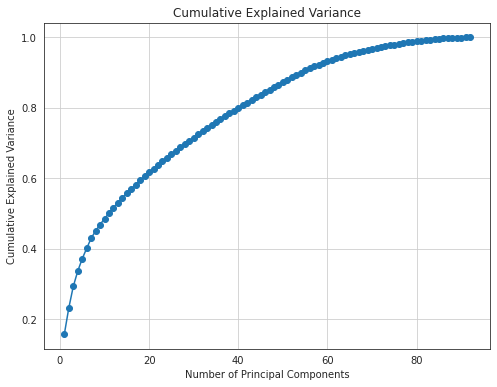

Top features contributing the most to each principal component:
Principal Component PC1: D19_VERSAND_DATUM, D19_GESAMT_DATUM, D19_GESAMT_ONLINE_DATUM, D19_VERSAND_ONLINE_DATUM, D19_VERSAND_ANZ_24
Principal Component PC2: SEMIO_KULT, SEMIO_ERL, SEMIO_REL, SEMIO_FAM, ALTERSKATEGORIE_GROB
Principal Component PC3: SEMIO_VERT, SEMIO_KAEM, SEMIO_DOM, ANREDE_KZ, SEMIO_RAT
Principal Component PC4: HH_EINKOMMEN_SCORE, ORTSGR_KLS9, VERS_TYP, BALLRAUM, INNENSTADT
Principal Component PC5: PRAEGENDE_JUGENDJAHRE, HEALTH_TYP, SEMIO_TRADV, VERS_TYP, KONSUMNAEHE
Principal Component PC6: WOHNLAGE, ORTSGR_KLS9, GREEN_AVANTGARDE, KBA13_VORB_0, INNENSTADT
Principal Component PC7: KBA13_VORB_0, KKK, REGIOTYP, GREEN_AVANTGARDE, KBA13_VORB_2
Principal Component PC8: KBA13_VORB_1_2, KBA13_VORB_1, KBA13_VORB_0, KBA13_VORB_2, BALLRAUM
Principal Component PC9: LP_FAMILIE_FEIN, LP_LEBENSPHASE_GROB, D19_BANKEN_ANZ_24, D19_BANKEN_ONLINE_DATUM, KKK
Principal Component PC10: KKK, REGIOTYP, KBA13_VORB_3, KBA13_VORB_2, 

In [213]:
df_results, variance_ratios, labels_exp_var, pca_model, n_components_90, components = get_principal_components(feature_pdf_scaled, feature_list)

### Run 2

explained variance ratio
Number of components explaining 50% of variance: 13
Number of components explaining 80% of variance: 44
Number of components explaining 90% of variance: 59
Number of components explaining 95% of variance: 69
Number of components explaining 99% of variance: 86


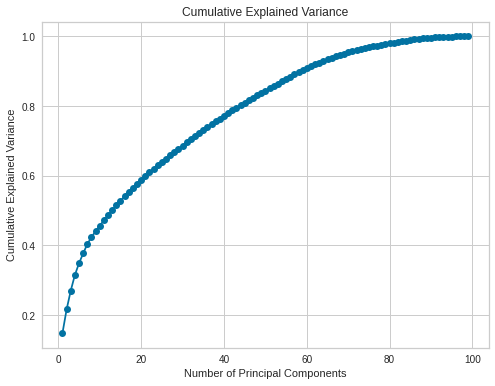

Top features contributing the most to each principal component:
Principal Component PC1: D19_VERSAND_DATUM, D19_GESAMT_DATUM, D19_GESAMT_ONLINE_DATUM, D19_VERSAND_ONLINE_DATUM, D19_VERSAND_ANZ_24
Principal Component PC2: SEMIO_REL, SEMIO_ERL, SEMIO_KULT, SEMIO_PFLICHT, SEMIO_FAM
Principal Component PC3: SEMIO_VERT, SEMIO_KAEM, SEMIO_DOM, SEMIO_KRIT, SEMIO_SOZ
Principal Component PC4: HH_EINKOMMEN_SCORE, ORTSGR_KLS9, BALLRAUM, INNENSTADT, VERS_TYP
Principal Component PC5: ORTSGR_KLS9, PRAEGENDE_JUGENDJAHRE, KONSUMNAEHE, WOHNLAGE, INNENSTADT
Principal Component PC6: GREEN_AVANTGARDE, KBA13_VORB_0, KKK, WOHNLAGE, REGIOTYP
Principal Component PC7: D19_BIO_OEKO, D19_SAMMELARTIKEL, KKK, D19_WEIN_FEINKOST, REGIOTYP
Principal Component PC8: KBA13_VORB_1_2, KBA13_VORB_1, KBA13_VORB_0, KBA13_VORB_2, BALLRAUM
Principal Component PC9: LP_FAMILIE_FEIN, LP_LEBENSPHASE_GROB, KKK, REGIOTYP, W_KEIT_KIND_HH
Principal Component PC10: KKK, REGIOTYP, D19_BANKEN_ANZ_24, FINANZTYP_6, D19_BANKEN_ONLINE_DATUM


In [111]:
df_results, variance_ratios, labels_exp_var, pca_model, n_components_90, components = get_principal_components(feature_pdf_scaled, feature_list)

In [286]:
# df_results.to_csv('clustering_pcs.csv')

In [7]:
# df_results = pd.read_csv('clustering_pcs.csv')

In [8]:
# df_results = df_results[col_list]

Determining the feature loadings

In [214]:
import pandas as pd

# Calculate the loadings for each principal component
absolute_loadings = components.abs()
sum_abs_loadings = absolute_loadings.sum()

# Calculate the percent contribution of each feature to each principal component
percent_contribution = absolute_loadings.div(sum_abs_loadings, axis=1) * 100
percent_contribution = percent_contribution.round(2)

# Print or display the percent contribution DataFrame
print("Percent Contribution per Feature to Principal Component:")
# Filter features with more than n% contribution
threshold_pct = 5
significant_features = percent_contribution[percent_contribution > threshold_pct]

# Drop columns (features) where all values are NaN (i.e., features with less than 10% contribution)
significant_features = significant_features.dropna(axis=1, how='all')

# Print or display the significant features
print(f"Features with more than {threshold_pct}% contribution to Principal Components:")
pd.set_option('display.max_columns', None)
# significant_features.head(5)
significant_features.head(5).dropna(axis=1, how='all')

Percent Contribution per Feature to Principal Component:
Features with more than 5% contribution to Principal Components:


ANREDE_KZ  PRAEGENDE_JUGENDJAHRE  SEMIO_DOM  SEMIO_ERL  SEMIO_FAM  \
0        NaN                    NaN        NaN        NaN        NaN   
1        NaN                    NaN        NaN       5.13        5.9   
2       6.38                    NaN       5.45        NaN        NaN   
3        NaN                    NaN        NaN        NaN        NaN   
4        NaN                    5.4        NaN        NaN        NaN   

   SEMIO_KAEM  SEMIO_KULT  SEMIO_REL  SEMIO_VERT  HH_EINKOMMEN_SCORE  \
0         NaN         NaN        NaN         NaN                 NaN   
1         NaN        6.95       7.05         NaN                 NaN   
2        7.14         NaN        NaN        6.61                 NaN   
3         NaN         NaN        NaN         NaN                5.51   
4         NaN         NaN        NaN         NaN                 NaN   

   ORTSGR_KLS9  
0          NaN  
1          NaN  
2          NaN  
3         6.51  
4          NaN

In [215]:
len(list(significant_features.head(5).dropna(axis=1, how='all').columns))

11

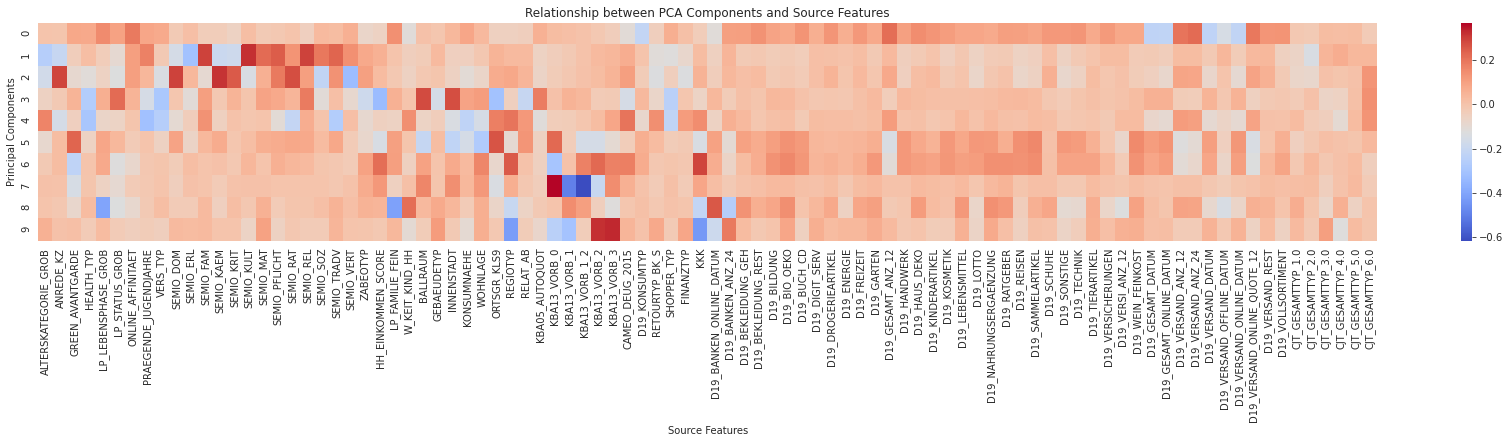

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'components' is your DataFrame containing the loadings
sns.set_style("white")

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(30, 4),)
sns.heatmap(components.head(10), cmap='coolwarm', annot=False, fmt=".2f", ax = ax)
plt.title('Relationship between PCA Components and Source Features')
plt.xlabel('Source Features')
plt.ylabel('Principal Components')
plt.show()

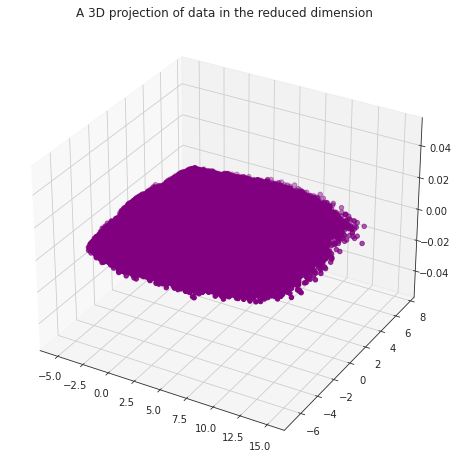

In [218]:
# plot
x = df_results['pc1']
y = df_results['pc2']
z = df_results['pc3']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, c= "purple", marker = "o")
ax.set_title("A 3D projection of data in the reduced dimension")
plt.show()

### Run 1

explained variance ratio
Number of components explaining 90% of variance: 165
Number of components explaining 95% of variance: 199
Number of components explaining 99% of variance: 252


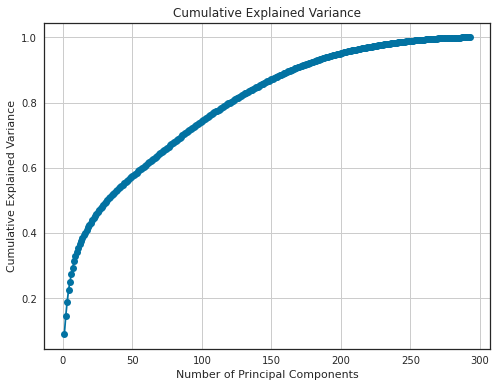

Top features contributing the most to each principal component:
Principal Component PC1: VK_DHT4A, D19_GESAMT_DATUM, D19_KONSUMTYP, D19_GESAMT_ANZ_24, VK_DISTANZ
Principal Component PC2: PRAEGENDE_JUGENDJAHRE, CJT_TYP_5, CJT_TYP_3, CJT_TYP_6, CJT_TYP_4
Principal Component PC3: FINANZ_UNAUFFAELLIGER, FINANZ_SPARER, FINANZ_ANLEGER, CJT_TYP_1, CJT_TYP_2
Principal Component PC4: KBA13_SEG_OBEREMITTELKLASSE, KBA13_SITZE_5, KBA13_SEG_SPORTWAGEN, KBA13_SITZE_4, KBA13_KMH_140_210
Principal Component PC5: KOMBIALTER, HEALTH_TYP, VERS_TYP, Petty_Bourgeois, SEMIO_VERT
Principal Component PC6: ANREDE_KZ, SEMIO_KAEM, SEMIO_DOM, SEMIO_VERT, SEMIO_KULT
Principal Component PC7: ANREDE_KZ, SEMIO_FAM, SEMIO_ERL, SEMIO_KAEM, SEMIO_DOM
Principal Component PC8: KBA05_ANHANG, KBA05_FRAU, KBA05_VORB1, KBA05_ZUL1, KBA05_HERST4
Principal Component PC9: LP_FAMILIE_FEIN, LP_FAMILIE_GROB, LP_LEBENSPHASE_GROB, LP_LEBENSPHASE_FEIN, ANZ_PERSONEN
Principal Component PC10: KBA13_VORB_0, PLZ8_HHZ, KBA13_HHZ, KBA13_KRSZ

In [206]:
# using all features
df_return, variance_ratios, labels_exp_var, pca_model, n_components_90, components = get_principal_components(feature_pdf_scaled, feature_list)

In [207]:
import pandas as pd

# Calculate the loadings for each principal component
absolute_loadings = components.abs()
sum_abs_loadings = absolute_loadings.sum()

# Calculate the percent contribution of each feature to each principal component
percent_contribution = absolute_loadings.div(sum_abs_loadings, axis=1) * 100
percent_contribution = percent_contribution.round(2)

# Print or display the percent contribution DataFrame
print("Percent Contribution per Feature to Principal Component:")
# Filter features with more than n% contribution
significant_features = percent_contribution[percent_contribution > 1]

# Drop columns (features) where all values are NaN (i.e., features with less than 10% contribution)
significant_features = significant_features.dropna(axis=1, how='all')

# Print or display the significant features
print("Features with more than 1% contribution to Principal Components:")
pd.set_option('display.max_columns', None)
# significant_features.head(5)
significant_features.head(5).dropna(axis=1, how='all')

Percent Contribution per Feature to Principal Component:
Features with more than 1% contribution to Principal Components:


AKT_DAT_KL  ANZ_PERSONEN  CAMEO_DEUG_2015  CAMEO_INTL_2015  \
0         NaN          1.12             1.66             1.68   
1         NaN           NaN              NaN              NaN   
2         NaN           NaN              NaN              NaN   
3         NaN           NaN              NaN              NaN   
4        1.38           NaN             1.12             1.34   

   CJT_KATALOGNUTZER  CJT_TYP_1  CJT_TYP_2  CJT_TYP_3  CJT_TYP_4  CJT_TYP_5  \
0                NaN        NaN        NaN        NaN        NaN        NaN   
1               1.01       1.15       1.29       1.38       1.22       1.43   
2                NaN       2.15       2.08       1.15       1.11       1.27   
3                NaN        NaN        NaN        NaN        NaN        NaN   
4                NaN        NaN        NaN        NaN        NaN        NaN   

   CJT_TYP_6  D19_GESAMT_ANZ_12  D19_GESAMT_ANZ_24  D19_GESAMT_DATUM  \
0        NaN               1.46               2.00              1.69   
1       1.29               1.43               1.95              1.56   
2       1.17                NaN                NaN               NaN   
3        NaN                NaN                NaN               NaN   
4        NaN                NaN               1.17               NaN   

   D19_GESAMT_OFFLINE_DATUM  D19_GESAMT_ONLINE_DATUM  \
0                      1.06                     1.71   
1                       NaN                     1.75   
2                       NaN                      NaN   
3                       NaN                      NaN   
4                       NaN                      NaN   

   D19_GESAMT_ONLINE_QUOTE_12  D19_HAUS_DEKO  D19_KONSUMTYP  \
0                        1.26           1.05           1.46   
1                        1.33            NaN           1.15   
2                         NaN            NaN            NaN   
3                         NaN            NaN            NaN   
4                         NaN            NaN            NaN   

   D19_KONSUMTYP_MAX  D19_TELKO_DATUM  D19_VERSAND_ANZ_12  D19_VERSAND_ANZ_24  \
0               1.43              NaN                1.32                1.58   
1               1.12             1.25                1.29                1.55   
2                NaN              NaN                 NaN                 NaN   
3                NaN              NaN                 NaN                 NaN   
4                NaN              NaN                 NaN                1.09   

   D19_VERSAND_DATUM  D19_VERSAND_ONLINE_DATUM  D19_VERSAND_ONLINE_QUOTE_12  \
0               1.69                      1.54                         1.18   
1               1.60                      1.59                         1.27   
2                NaN                       NaN                          NaN   
3                NaN                       NaN                          NaN   
4                NaN                       NaN                          NaN   

   D19_VERSAND_REST  D19_VERSI_DATUM  D19_VOLLSORTIMENT  EINGEZOGENAM_HH_JAHR  \
0               NaN              1.1               1.15                   NaN   
1              1.03              NaN                NaN                   NaN   
2               NaN              NaN                NaN                   NaN   
3               NaN              NaN                NaN                   NaN   
4               NaN              NaN                NaN                  1.22   

   EWDICHTE  FINANZ_ANLEGER  FINANZ_MINIMALIST  FINANZ_SPARER  \
0      1.20             NaN               1.09            NaN   
1       NaN             NaN               1.33           1.27   
2       NaN            1.86                NaN           2.35   
3      1.02             NaN                NaN            NaN   
4      1.51             NaN                NaN            NaN   

   FINANZ_UNAUFFAELLIGER  FINANZ_VORSORGER  FIRMENDICHTE  GEMEINDETYP  \
0                    NaN               NaN           NaN         1.04   
1 

In [208]:
list(significant_features.head(5).dropna(axis=1, how='all').columns)

['AKT_DAT_KL',
 'ANZ_PERSONEN',
 'CAMEO_DEUG_2015',
 'CAMEO_INTL_2015',
 'CJT_KATALOGNUTZER',
 'CJT_TYP_1',
 'CJT_TYP_2',
 'CJT_TYP_3',
 'CJT_TYP_4',
 'CJT_TYP_5',
 'CJT_TYP_6',
 'D19_GESAMT_ANZ_12',
 'D19_GESAMT_ANZ_24',
 'D19_GESAMT_DATUM',
 'D19_GESAMT_OFFLINE_DATUM',
 'D19_GESAMT_ONLINE_DATUM',
 'D19_GESAMT_ONLINE_QUOTE_12',
 'D19_HAUS_DEKO',
 'D19_KONSUMTYP',
 'D19_KONSUMTYP_MAX',
 'D19_TELKO_DATUM',
 'D19_VERSAND_ANZ_12',
 'D19_VERSAND_ANZ_24',
 'D19_VERSAND_DATUM',
 'D19_VERSAND_ONLINE_DATUM',
 'D19_VERSAND_ONLINE_QUOTE_12',
 'D19_VERSAND_REST',
 'D19_VERSI_DATUM',
 'D19_VOLLSORTIMENT',
 'EINGEZOGENAM_HH_JAHR',
 'EWDICHTE',
 'FINANZ_ANLEGER',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_VORSORGER',
 'FIRMENDICHTE',
 'GEMEINDETYP',
 'HEALTH_TYP',
 'HH_EINKOMMEN_SCORE',
 'KBA05_ANTG1',
 'KBA05_MAXBJ',
 'KBA13_ANTG1',
 'KBA13_ANTG3',
 'KBA13_ANTG4',
 'KBA13_ANZAHL_PKW',
 'KBA13_BAUMAX',
 'KBA13_CCM_0_1400',
 'KBA13_CCM_1200',
 'KBA13_CCM_1400',
 'KBA13

In [177]:
# pickle and save model
filename = 'ab_pca_model_1.sav'
import pickle
pickle.dump(pca_model, open(filename, 'wb'))

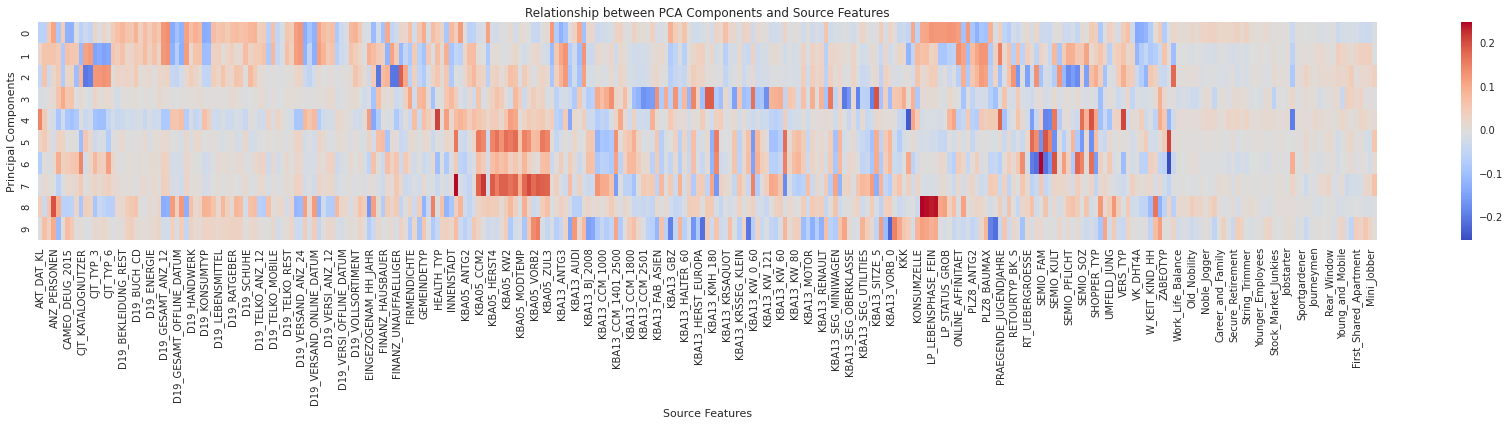

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'components' is your DataFrame containing the loadings
sns.set_style("white")

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(30, 4),)
sns.heatmap(components.head(10), cmap='coolwarm', annot=False, fmt=".2f", ax = ax)
plt.title('Relationship between PCA Components and Source Features')
plt.xlabel('Source Features')
plt.ylabel('Principal Components')
plt.show()

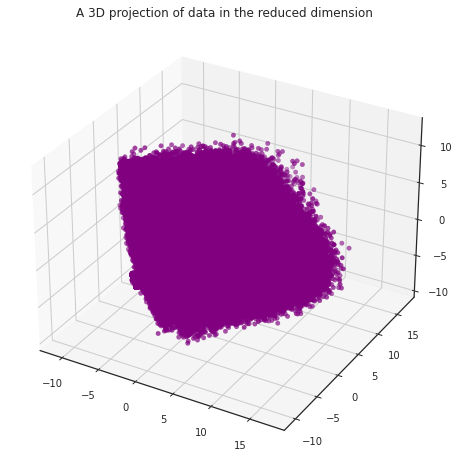

In [180]:
# plot 
x = df_return['pc1']
y = df_return['pc2']
z = df_return['pc3']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c= "purple", marker = "o")
ax.set_title("A 3D projection of data in the reduced dimension")
plt.show()

## kmeans


In [219]:
# col list
col_list = ['LNR', 'pc1']
for i in range(2, 11+1):
    col_list.append(f'pc{i}')


In [220]:
col_list

['LNR',
 'pc1',
 'pc2',
 'pc3',
 'pc4',
 'pc5',
 'pc6',
 'pc7',
 'pc8',
 'pc9',
 'pc10',
 'pc11']

In [221]:
def run_kmeans_clustering(pdf, id_col, nclusters, feature_list):
    """
    Function that performs Kmeans clustering and returns the labelled dataset, DB and CH score
    """
    from sklearn.cluster import KMeans
    
    X = pdf.drop(columns = {id_col}).values
    kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(X)
    
    labels = kmeans.labels_
    pdf['kmeans_label'] = kmeans.labels_
    

    # print cluster factors
    pdf['kmeans_label'].value_counts()
    
    X = pdf.drop(columns = {id_col}).values
    labels = kmeans.labels_
    from sklearn.metrics import davies_bouldin_score
    db_score = davies_bouldin_score(X, labels)
    print('DB ', db_score)
    
    from sklearn.metrics import calinski_harabasz_score
    ch_score = calinski_harabasz_score(X, labels)
    print('CH', ch_score)

    from sklearn.metrics import silhouette_score
    return pdf, kmeans, ch_score, db_score
    

In [222]:
# run multiple iterations of kmeans
kmeans_results_dict = {}
for k in range(5, 11): 
    pdf, kmeans, ch_score, db_score= run_kmeans_clustering(df_results[col_list].dropna(), 'LNR', k, col_list)
    run_results = {
#     "s_score": sh_score,
    "db_score": db_score,
    "ch_score": ch_score,
    "model": kmeans,
    "labels": pdf 
    }
    kmeans_results_dict[f"Run_{k}"] = run_results

DB  1.4238665500659025
CH 189325.31018758917
DB  1.5476803014511376
CH 179131.6183745666
DB  1.578895163204996
CH 174356.72153858666
DB  1.5405570271305224
CH 180829.28350259035
DB  1.5114606243389517
CH 173092.6975225706
DB  1.5199696414279846
CH 166090.86780154554


## Evaluation of UMAP and KMeans

[Text(0.5, 1.0, 'CH_score')]

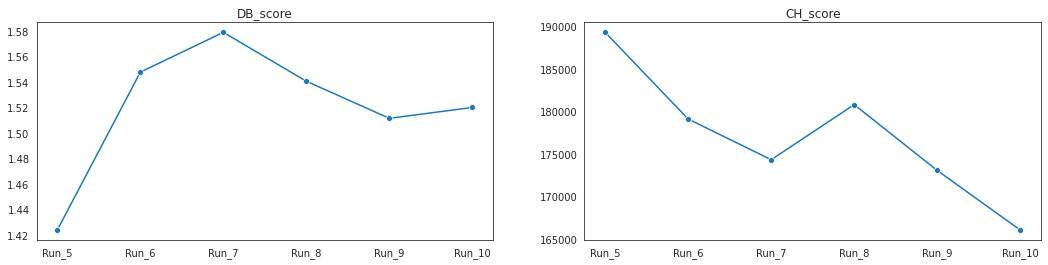

<Figure size 720x432 with 0 Axes>

In [223]:
# plot results - run 2
run_numbers = list(kmeans_results_dict.keys())
# silhouette_scores = [kmeans_results_dict[run]["s_score"] for run in run_numbers]
db_scores = [kmeans_results_dict[run]["db_score"] for run in run_numbers]
ch_scores = [kmeans_results_dict[run]["ch_score"] for run in run_numbers]

# plot results vs n clusters
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
plt.figure(figsize=(10, 6))
sns.lineplot(x = run_numbers, y = db_scores, marker='o', linestyle='-', ax = ax[0]).set(title='DB_score')
# sns.lineplot(x = run_numbers, y = silhouette_scores, marker='o', linestyle='-', ax = ax[1]).set(title='Silhouette_Score')
sns.lineplot(x = run_numbers, y = ch_scores, marker='o', linestyle='-', ax = ax[1]).set(title='CH_score')

In [224]:
kmeans_results_dict.keys()

dict_keys(['Run_5', 'Run_6', 'Run_7', 'Run_8', 'Run_9', 'Run_10'])

In [225]:
# best model - lowest DB score
results_pdf = kmeans_results_dict['Run_5']["labels"]
km_model = kmeans_results_dict['Run_5']["model"]

In [226]:
results_pdf['kmeans_label'].value_counts()

2    276824
1    217934
0    187087
4    108634
3     99996
Name: kmeans_label, dtype: int64

#### Score

In [354]:
def preprocess_clustering_data(feature_incl, customer_df, pca_model, km_model):
    # fill nulls
#     customer_df = customer_df[feature_incl]
#     customer_df = customer_df[(customer_df.CAMEO_DEUG_2015 != 'X')]
#     customer_df['CAMEO_DEUG_2015'] = customer_df['CAMEO_DEUG_2015'].astype(float)

#     print(customer_df.columns)
#     customer_df = impute_with_mode(customer_df)
#     customer_df = pd.get_dummies(customer_df, columns=['CJT_GESAMTTYP', 'RETOURTYP_BK_S', 'FINANZTYP'])
    
    # run pca and get first 4 principal components
    X_score = customer_df
    pcs = pca_model.transform(X_score)
    
    pcs = pcs[:, :11]
    
    # run through kmeans model
    results = km_model.predict(pcs)
    
    results_pdf = pd.DataFrame(X_score)
    results_pdf['km_label'] = results
    
    return results_pdf
    

In [355]:
customer_scores = preprocess_clustering_data(feature_incl, scaled_customer, pca_model, km_model)

In [356]:
customer_scores.shape

(191526, 93)

In [357]:
customer_scores

0         1         2         3         4         5         6  \
0       1.143917 -1.045182  2.022082 -0.624078  0.145384  1.747599  0.201164   
1       1.143917 -1.045182 -0.494540 -0.624078 -1.153442 -0.287800 -0.457493   
2       1.143917  0.956771  2.022082  0.163858 -0.374146  1.747599 -1.116151   
3       1.143917 -1.045182 -0.494540  0.163858 -1.153442  1.069132 -0.457493   
4       0.208243 -1.045182 -0.494540  0.951793  1.444211 -0.966267  1.518480   
...          ...       ...       ...       ...       ...       ...       ...   
191521  0.208243 -1.045182  2.022082  0.951793 -0.374146  0.390666  0.201164   
191522  1.143917  0.956771 -0.494540  0.163858 -1.153442  1.069132 -0.457493   
191523  1.143917 -1.045182  2.022082  0.163858  1.963741  1.747599 -0.457493   
191524  0.208243  0.956771 -0.494540  0.163858  1.444211 -0.287800 -0.457493   
191525 -0.727430 -1.045182 -0.494540  0.163858  1.963741  1.069132 -1.116151   

               7         8         9        10        11        12        13  \
0      -0.857360 -0.207638 -2.042478 -0.819575  0.379577 -1.859802 -0.963124   
1      -1.683009 -0.207638 -0.928668 -0.819575  0.901543 -1.319947 -0.963124   
2      -0.857360  0.842128  0.185143  1.393380 -1.186320  0.839474  1.221760   
3      -1.476597 -0.207638 -0.928668 -0.819575  0.379577 -0.780092 -0.963124   
4      -0.031710  0.842128  0.185143 -0.266336  0.379577 -1.319947 -0.963124   
...          ...       ...       ...       ...       ...       ...       ...   
191521 -0.857360  0.842128  0.185143 -0.266336  0.379577 -0.780092  0.129318   
191522 -0.650947  0.842128  0.185143  1.393380 -1.708286  0.299619 -0.416903   
191523 -0.857360 -0.207638 -0.928668  1.393380 -1.186320 -0.780092 -0.963124   
191524 -0.031710 -0.207638  1.298954  0.840141 -1.186320  1.379329  1.221760   
191525 -1.063772 -0.207638 -0.371762 -1.926053  1.423509 -0.240236  0.129318   

              14        15        16        17        18        19        20  \
0      -0.013140  1.075885 -1.274460 -1.841462 -1.116199  1.055283 -1.558719   
1      -0.013140  1.075885 -0.144625 -1.841462 -1.116199 -0.485914 -1.558719   
2      -1.588953 -0.539188 -0.144625 -1.208664 -1.614362 -0.999647 -1.558719   
3      -0.013140 -0.000830 -0.709542 -0.575866 -0.618036  1.055283  0.198153   
4       0.512131  1.075885  0.420292  0.689730 -0.119874  0.027818  0.198153   
...          ...       ...       ...       ...       ...       ...       ...   
191521  0.512131  1.075885 -0.709542  0.689730 -0.119874  1.055283  0.198153   
191522 -1.063682 -0.539188 -1.839377 -0.575866 -1.116199 -0.999647 -0.387471   
191523 -0.013140 -1.615903 -1.839377 -1.841462 -0.618036  0.027818 -1.558719   
191524 -0.538411 -0.539188 -0.144625  0.056932 -0.618036  0.027818 -0.973095   
191525  1.562673  1.614243  1.550127  0.056932  0.876452  1.569016  0.783777   

              21        22        23        24        25        26        27  \
0       0.951224 -0.268136 -1.994028 -0.404456  0.926332 -0.629050 -0.625874   
1       1.432515 -0.268136 -1.379468 -0.914575 -2.132599  0.771537 -0.625874   
2      -0.492649 -0.268136 -1.994028 -0.659516  0.926332  1.238400  2.094018   
3       1.432515 -1.746755 -0.150349 -0.914575  0.926332  1.238400 -0.237318   
4       0.469933 -1.746755  1.078771  1.636020 -1.112955 -0.629050  0.151238   
...          ...       ...       ...       ...       ...       ...       ...   
191521  1.432515 -0.268136 -1.994028 -0.659516  0.926332 -1.562775 -0.625874   
191522 -0.973940 -0.268136 -0.150349 -0.914575  0.926332  0.771537  0.539794   
191523  0.951224 -0.268136 -0.150349  1.636020 -0.603133  1.238400 -0.625874   
191524 -0.492649 -0.268136  0.464211  1.636020 -0.093312 -0.629050  0.151238   
191525  0.951224 -1.746755  0.464211  1.636020 -0.603133 -0.629050 -0.625874   

              28        29        30        31        32        33        34  \
0      -0.310207  1.355546  1.632464 -1.498345 -1.765680 -1.604412  1.409617   
1       0.2

In [358]:
cust_labels = pd.DataFrame(customer_scores['km_label'].value_counts()*100/customer_scores.shape[0])
cust_labels = cust_labels.reset_index().rename(columns = {'index':'cluster_label', 'km_label':'cust_label_pct'})

In [359]:
base_labels = pd.DataFrame(results_pdf['kmeans_label'].value_counts()*100/results_pdf.shape[0])
base_labels = base_labels.reset_index().rename(columns = {'index':'cluster_label', 'kmeans_label':'base_label_pct'})

In [360]:
comb_df = pd.merge(base_labels, cust_labels, on='cluster_label', how = 'inner').sort_values('cluster_label', ascending = True)

In [361]:
comb_df

cluster_label  base_label_pct  cust_label_pct
2              0       21.009798       14.707142
1              1       24.473904       35.875025
0              2       31.087229       23.599407
4              3       11.229512       24.905757
3              4       12.199556        0.912670

In [362]:
comb_df.set_index('cluster_label', inplace=True)

In [363]:
comb_df

base_label_pct  cust_label_pct
cluster_label                                
0                   21.009798       14.707142
1                   24.473904       35.875025
2                   31.087229       23.599407
3                   11.229512       24.905757
4                   12.199556        0.912670

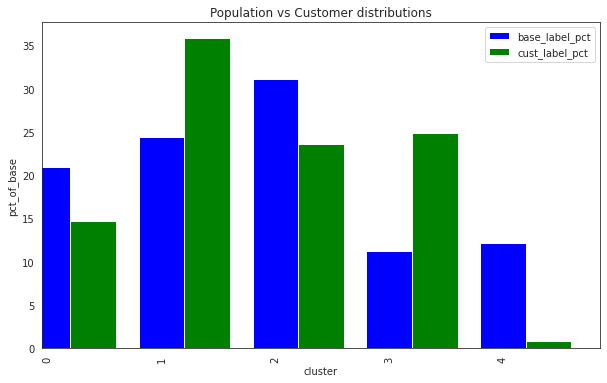

In [364]:
import matplotlib.pyplot as plt

# plot comparison on base and population
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first bar chart
comb_df['base_label_pct'].plot(kind='bar', x = 'cluster_label', color='blue', ax=ax, position=0.5, width=0.4, label='base_label_pct')

# Plot the second bar chart
comb_df['cust_label_pct'].plot(kind='bar', x = 'cluster_label', color='green', ax=ax, position=-0.5, width=0.4, label='cust_label_pct')

# # Set labels and title
ax.set_xlabel('cluster')
ax.set_ylabel('pct_of_base')
ax.set_title('Population vs Customer distributions')

ax.legend()
plt.show()


The customer base is over-represented in clusters 1 and 3

In [337]:
# cluster profiles
def plot_cluster_averages(results_pdf, prediction_col, id_col):
    """
    Function to plot feature averages per cluster to map the customer profiles per cluster
    """

    km_cluster_profile = results_pdf.drop(columns = [id_col]).groupby(prediction_col).mean()

    km_cluster_profile["custs_each_seg"] = (
        results_pdf.groupby(prediction_col)['LNR'].count().values
    )
    km_cluster_profile['pct_base'] = km_cluster_profile['custs_each_seg']/results_pdf.shape[0]
    km_cluster_profile = km_cluster_profile.transpose()

    km_cluster_profile = km_cluster_profile.style.highlight_max(color="lightgreen", axis=1).highlight_min(
        color="coral", axis=1
    )
    
    return km_cluster_profile

In [338]:
df['kmeans_label'] = results_pdf['kmeans_label']

In [229]:
plot_cluster_averages(df, 'kmeans_label', 'LNR')

Some of the features of cluster 1:
- LP_LEBENSPHASE_GROB and LP_STATUS_GROB: high income
- ONLINE_AFFINITAET and D19_VERSAND_ONLINE_QUOTE_12: high online mail order transactions
- LP_FAMILIE_FEIN: family households
- KONSUMNAEHE: relatively far from points of sale
- KBA05_AUTOQUOT: car owners
- D19_HANDWERK, D19_HAUS_DEKO, D19_KINDERARTIKEL, D19_KOSMETIK, D19_BEKLEIDUNG_GEH, D19_NAHRUNGSERGAENZUNG: many transactions across various products including DIY, supplements, clothing and cosmetics
- Few online transactions other categories
These customers fall into the wealthier categories and are families.

Cluster 3:

- SEMIO_DOM, SEMIO_FAM, SEMIO_KAEM,SEMIO_KRIT, SEMIO_MAT, SEMIO_PFLICHT: indicates dominant, familiar, fightfull, critical, material and dutiful minded
- W_KEIT_KIND_HH: low likelihood of children in the household
- BALLRAUM, INNENSTADT: far from the city centre
- D19_GESAMT_ONLINE_DATUM: many online transactions and purchases
- Advertising - Enthusiast with restricted Cross-Channel-Behaviour
- According to CAMEO_DEUG_2015, higher scores are working class individuals
These are maybe single households and working class individuals that are likely to use the mail order service for convenience

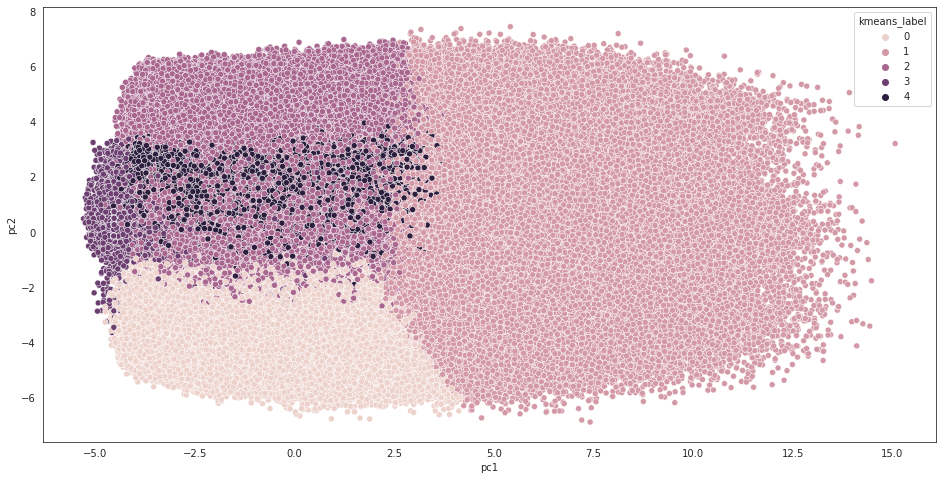

In [365]:
# view separation of clusters
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 8))
sns.scatterplot(data = results_pdf, x = 'pc1', y='pc2', hue = 'kmeans_label', ax = ax);

While we can see distinction in most of the clusters, there is overlap between 0 and 4 and the clusters are not well separated. Therefore it's useful to try another clustering method.

### Save model

In [170]:
# pickle and save model
filename = 'km_model.sav'
import pickle
pickle.dump(km_model, open(filename, 'wb'))

## UMAP

In [138]:
def run_umap(pdf, id_col, min_dist, ncomponents):
    import umap
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import QuantileTransformer, StandardScaler
    X = pdf.drop(columns = {id_col}).values
    manifold = umap.UMAP(min_dist = min_dist, n_components = ncomponents)
    manifold.fit(X)
    X_reduced = manifold.transform(X)
    
    # plot components
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], s=50, alpha=0.8)
    plt.title('UMAP Clustering')
    plt.show()
    
    return X_reduced, manifold

In [139]:
feature_pdf_scaled = scaled_df

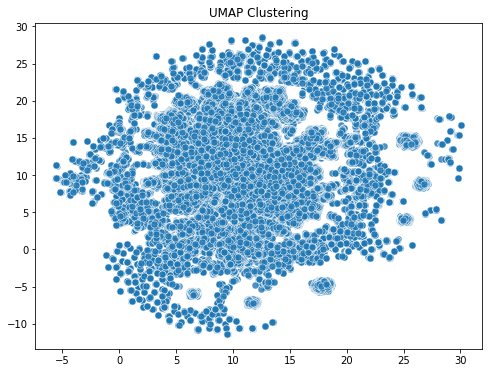

In [140]:
# try 1
umap_red, umap_model = run_umap(feature_pdf_scaled, 'LNR', 0.5, 2)

In [141]:
# pickle and save model
filename = 'umap_final_model.sav'
import pickle
pickle.dump(umap_model, open(filename, 'wb'))

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


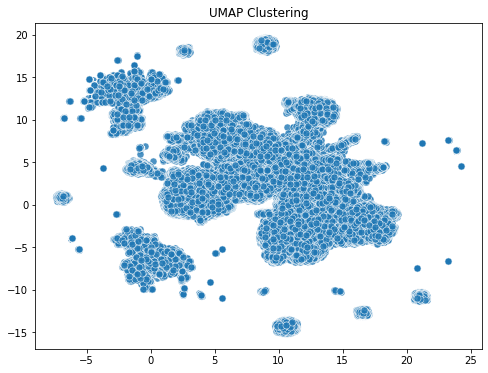

In [151]:
# try 2
umap_red, umap_model = run_umap(feature_pdf_scaled, 'LNR', 0.5, 2)

There is slightly more separation in the reduced dimension

In [154]:
umap_pdf = pd.DataFrame(umap_red, columns = ['umap1', 'umap2'])

In [232]:
umap_pdf['LNR'] = scaled_df['LNR'] 

In [1]:
import pandas as pd

In [233]:
umap_pdf.to_csv('umap_pdf.csv')

In [267]:
umap_pdf = pd.read_csv('umap_pdf.csv').drop(columns = {'Unnamed: 0'})

In [268]:
umap_pdf.columns

Index(['umap1', 'umap2', 'LNR'], dtype='object')

In [244]:
import pickle
with open('umap_new_model.sav', 'rb') as f:
    umap_model = pickle.load(f)


## DBSCAN

In [270]:
def run_dbscan(pdf, feat_cols, min_samples, eps, metric = 'euclidean'):
    from sklearn.cluster import DBSCAN
    # metric - canberra or clark
    X= pdf.values
    dbscan = DBSCAN(min_samples = min_samples, eps = eps)
    predictions = dbscan.fit_predict(X)
    labels = dbscan.labels_
    pdf['prediction'] = labels
    pdf['prediction'].value_counts()
    
    from sklearn.metrics import davies_bouldin_score

    X = pdf.drop(columns=['prediction']).values
    labels = pdf['prediction'].values
    db_score = davies_bouldin_score(X, labels)
#     print(': ', db_score)
    
    from sklearn.metrics import calinski_harabasz_score
    ch_score = calinski_harabasz_score(X, labels)
#     print('Calinski-Harabasz Score: ', ch_score)
    print(f" Davies Bouldin Score: {round(db_score, 2)}  Calinski-Harabasz Score: {round(ch_score,2)} ")
    return pdf, dbscan, db_score, ch_score
    

In [271]:
# sample umap dataframe due to memory limitations
umap_test_pdf = umap_pdf.sample(400000)

In [272]:
umap_test_pdf.isna().sum()

umap1      0
umap2      0
LNR      170
dtype: int64

In [273]:
# loop through hyperparameters and return metrics
dbscan_results_dict = {}
for i in [800, 1000, 1200]:
    for j in [0.8, 1, 1.2, 1.5]:
        print(f"min samples: {i}, eps: {j}")
        results, model, db_score, ch_score = run_dbscan(umap_test_pdf.drop(columns = {'LNR'}), ['umap1', 'umap2'], i, j)
        run_results = {
            "db_score": db_score,
            "ch_score": ch_score,
            "results": results,
            "model":model
        }
        print(results['prediction'].value_counts())
        dbscan_results_dict[f"ms_{i}_eps_{j}"] = run_results

min samples: 800, eps: 0.8
 Davies Bouldin Score: 3.02  Calinski-Harabasz Score: 18011.1 
 0     360729
 4       6942
 7       5885
 10      5127
-1       5077
 2       2385
 3       2149
 9       2099
 5       2049
 11      1774
 1       1672
 8       1527
 6       1381
 12      1204
Name: prediction, dtype: int64
min samples: 800, eps: 1
 Davies Bouldin Score: 1.36  Calinski-Harabasz Score: 23566.36 
 0    363924
 5      6942
 4      6009
 7      5885
 1      5452
 2      2385
 3      2150
 6      2049
-1      1903
 9      1774
 8      1527
Name: prediction, dtype: int64
min samples: 800, eps: 1.2
 Davies Bouldin Score: 1.57  Calinski-Harabasz Score: 25496.51 
 0    366214
 4      6942
 3      6164
 1      5928
 6      5885
 2      2385
 5      2049
 8      1774
 7      1527
-1      1132
Name: prediction, dtype: int64
min samples: 800, eps: 1.5
 Davies Bouldin Score: 2.0  Calinski-Harabasz Score: 25684.21 
 0    366812
 4      6942
 3      6250
 1      6024
 6      5885
 2      2385


## Evaluation of UMAP and DBSCAN

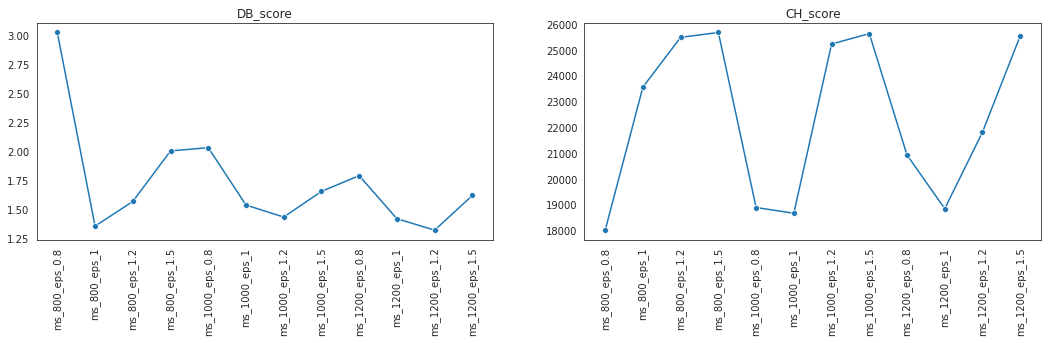

<Figure size 720x432 with 0 Axes>

In [274]:
run_numbers = list(dbscan_results_dict.keys())
# silhouette_scores = [kmeans_results_dict[run]["s_score"] for run in run_numbers]
db_scores = [dbscan_results_dict[run]["db_score"] for run in run_numbers]
ch_scores = [dbscan_results_dict[run]["ch_score"] for run in run_numbers]

# plot results vs n clusters
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
plt.figure(figsize=(10, 6))
sns.lineplot(x = run_numbers, y = db_scores, marker='o', linestyle='-', ax = ax[0]).set(title='DB_score')
# sns.lineplot(x = run_numbers, y = silhouette_scores, marker='o', linestyle='-', ax = ax[1]).set(title='Silhouette_Score')
sns.lineplot(x = run_numbers, y = ch_scores, marker='o', linestyle='-', ax = ax[1]).set(title='CH_score')
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)

In [275]:
dbscan_results_dict.keys()

dict_keys(['ms_800_eps_0.8', 'ms_800_eps_1', 'ms_800_eps_1.2', 'ms_800_eps_1.5', 'ms_1000_eps_0.8', 'ms_1000_eps_1', 'ms_1000_eps_1.2', 'ms_1000_eps_1.5', 'ms_1200_eps_0.8', 'ms_1200_eps_1', 'ms_1200_eps_1.2', 'ms_1200_eps_1.5'])

Looking at the best two models from the results

 0    363924
 5      6942
 4      6009
 7      5885
 1      5452
 2      2385
 3      2150
 6      2049
-1      1903
 9      1774
 8      1527
Name: prediction, dtype: int64


<AxesSubplot:xlabel='umap1', ylabel='umap2'>

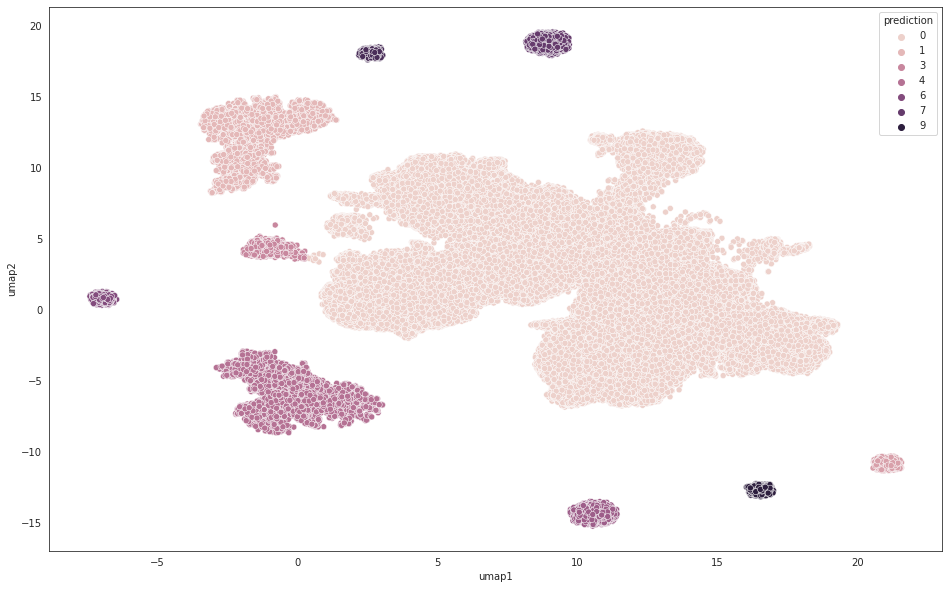

In [280]:
# model 1
dbs_results = dbscan_results_dict['ms_800_eps_1']['results']
dbs_results['LNR'] = umap_test_pdf['LNR']
features_with_dbs_res = pd.merge(df, dbs_results, how = 'inner', on='LNR')
print(dbs_results['prediction'].value_counts())
dbs_results = dbs_results[dbs_results.prediction >=0]
plt.subplots(nrows = 1, ncols = 1, figsize = (16, 10))
sns.scatterplot(data = dbs_results, x ='umap1', y='umap2', hue = 'prediction')

In [19]:
df = pd.read_csv('feature_pdf_scaled.csv').drop(columns = {'Unnamed: 0'})

In [20]:
df.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'GFK_URLAUBERTYP',
       'GREEN_AVANTGARDE', 'HEALTH_TYP', 'LP_LEBENSPHASE_GROB',
       'LP_STATUS_GROB', 'ONLINE_AFFINITAET', 'PRAEGENDE_JUGENDJAHRE',
       'VERS_TYP', 'SEMIO_DOM', 'SEMIO_ERL', 'SEMIO_FAM', 'SEMIO_KAEM',
       'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_MAT', 'SEMIO_PFLICHT', 'SEMIO_RAT',
       'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV', 'SEMIO_VERT', 'ZABEOTYP',
       'HH_EINKOMMEN_SCORE', 'LP_FAMILIE_FEIN', 'W_KEIT_KIND_HH', 'BALLRAUM',
       'GEBAEUDETYP', 'INNENSTADT', 'KONSUMNAEHE', 'WOHNLAGE', 'ORTSGR_KLS9',
       'REGIOTYP', 'KBA05_AUTOQUOT', 'KBA13_KRSSEG_KLEIN', 'KBA13_KRSSEG_OBER',
       'KBA13_KRSSEG_VAN', 'KBA13_KRSZUL_NEU', 'KBA13_VORB_0', 'KBA13_VORB_1',
       'KBA13_VORB_1_2', 'KBA13_VORB_2', 'KBA13_VORB_3', 'CAMEO_DEUG_2015',
       'CAMEO_INTL_2015', 'CJT_GESAMTTYP', 'D19_KONSUMTYP', 'RETOURTYP_BK_S',
       'SHOPPER_TYP', 'FINANZTYP', 'KKK', 'D19_BANKEN_ONLINE_DATUM',
       'D19_BANKEN_ANZ_24', 'D19_BEKLEID

 0    366120
 4      6942
 3      6117
 6      5885
 1      5741
 2      2385
 5      2049
 8      1774
 7      1527
-1      1460
Name: prediction, dtype: int64


<AxesSubplot:xlabel='umap1', ylabel='umap2'>

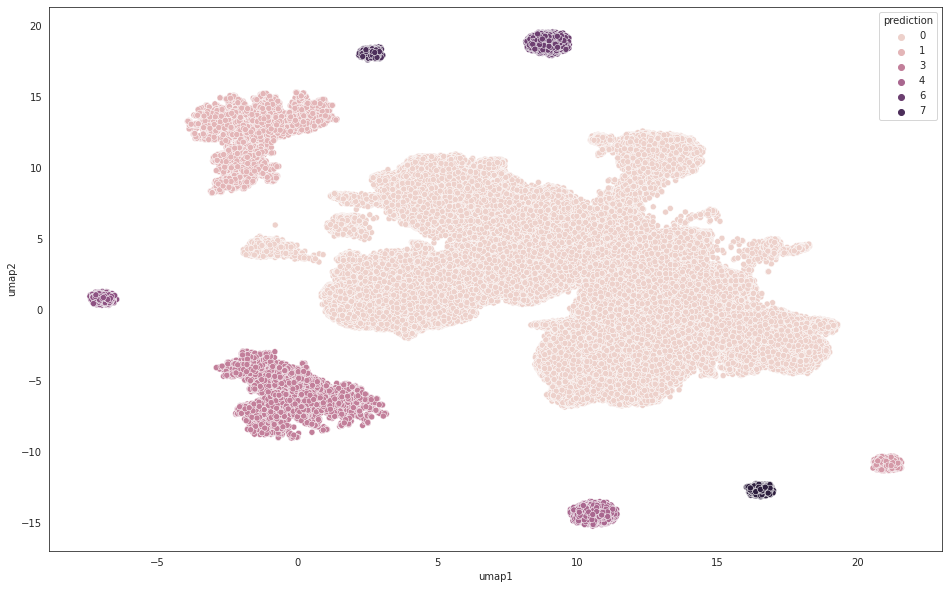

In [277]:
# model 2
dbs_results = dbscan_results_dict['ms_1000_eps_1.2']['results']
dbs_results['LNR'] = umap_test_pdf['LNR']
features_with_dbs_res = pd.merge(df, dbs_results, how = 'inner', on='LNR')
print(dbs_results['prediction'].value_counts())
dbs_results = dbs_results[dbs_results.prediction >=0]
plt.subplots(nrows = 1, ncols = 1, figsize = (16, 10))
sns.scatterplot(data = dbs_results, x ='umap1', y='umap2', hue = 'prediction')

In [281]:
plot_cluster_averages(features_with_dbs_res[features_with_dbs_res.prediction>=0], 'prediction', 'LNR')

In [282]:
# best dbscan model
dbs_model = dbscan_results_dict['ms_800_eps_1']['model']
dbs_results = dbscan_results_dict['ms_800_eps_1']['results']

In [283]:
dbs_results.to_csv('final_dbs_results.csv')

In [284]:
# pickle and save model
filename = 'dbs_model.sav'
import pickle
pickle.dump(dbs_model, open(filename, 'wb'))

In [37]:
feature_incl = ['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 'ONLINE_AFFINITAET',
       'PRAEGENDE_JUGENDJAHRE', 'VERS_TYP', 'SEMIO_DOM', 'SEMIO_ERL',
       'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_MAT',
       'SEMIO_PFLICHT', 'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV',
       'SEMIO_VERT', 'ZABEOTYP', 'HH_EINKOMMEN_SCORE', 'LP_FAMILIE_FEIN',
       'W_KEIT_KIND_HH', 'BALLRAUM', 'GEBAEUDETYP', 'INNENSTADT',
       'KONSUMNAEHE', 'WOHNLAGE', 'ORTSGR_KLS9', 'REGIOTYP', 'RELAT_AB',
       'KBA05_AUTOQUOT', 'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2',
       'KBA13_VORB_2', 'KBA13_VORB_3', 'CAMEO_DEUG_2015', 'CJT_GESAMTTYP',
       'D19_KONSUMTYP', 'RETOURTYP_BK_S', 'SHOPPER_TYP', 'FINANZTYP', 'KKK',
       'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ANZ_24', 'D19_BEKLEIDUNG_GEH',
       'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD',
       'D19_DIGIT_SERV', 'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT',
       'D19_GARTEN', 'D19_GESAMT_ANZ_12', 'D19_HANDWERK', 'D19_HAUS_DEKO',
       'D19_KINDERARTIKEL', 'D19_KOSMETIK', 'D19_LEBENSMITTEL', 'D19_LOTTO',
       'D19_NAHRUNGSERGAENZUNG', 'D19_RATGEBER', 'D19_REISEN',
       'D19_SAMMELARTIKEL', 'D19_SCHUHE', 'D19_SONSTIGE', 'D19_TECHNIK',
       'D19_TIERARTIKEL', 'D19_VERSICHERUNGEN', 'D19_VERSI_ANZ_12',
       'D19_WEIN_FEINKOST', 'D19_GESAMT_DATUM', 'D19_GESAMT_ONLINE_DATUM',
       'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24', 'D19_VERSAND_DATUM',
       'D19_VERSAND_OFFLINE_DATUM', 'D19_VERSAND_ONLINE_DATUM',
       'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSAND_REST', 'D19_VOLLSORTIMENT', 'LNR']

In [256]:
def score_umap(feature_incl, customer_df, umap_modell):
    """
    runs umap model
    """
#     # fill nulls
#     customer_df = customer_df[feature_incl]
#     customer_df = customer_df[(customer_df.CAMEO_DEUG_2015 != 'X')]
#     customer_df['CAMEO_DEUG_2015'] = customer_df['CAMEO_DEUG_2015'].astype(float)

#     print(customer_df.columns)
#     customer_df = impute_with_mode(customer_df)
#     customer_df = pd.get_dummies(customer_df, columns=['CJT_GESAMTTYP', 'RETOURTYP_BK_S', 'FINANZTYP'])
    
    # run umap
    X_score = customer_df
    umap_comps = umap_model.transform(X_score)
    
    return umap_comps
    

In [257]:
umap_comps = score_umap(feature_incl, scaled_customer, umap_model)

In [285]:
umap_comps.shape

(191526, 2)

In [263]:
np.savetxt('umap_comps_customer', umap_comps, delimiter=',')

In [264]:
# umap_comps.to_csv('umap_comps_customer.csv')

In [ ]:
type(umap_comps)

In [286]:
type(dbs_model)

sklearn.cluster._dbscan.DBSCAN

In [287]:
umap_comps

array([[ 0.6824304 ,  0.34482726],
       [-2.5243988 ,  0.84109324],
       [-1.8912232 , -0.34610784],
       ...,
       [ 1.6911436 ,  1.5597463 ],
       [ 1.363905  , -1.014741  ],
       [-2.7497737 ,  2.7253482 ]], dtype=float32)

In [302]:
sampled_indices = np.random.choice(umap_comps.shape[0], 120000, replace=False)
sampled_data = umap_comps[sampled_indices]


In [303]:
sampled_data.shape

(120000, 2)

In [304]:
from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(min_samples = 1000, eps = 1.5)
predictions = dbs_model.fit_predict(sampled_data)
labels = dbs_model.labels_

In [305]:
umap_cust_df = pd.DataFrame(sampled_data, columns = ['umap1', 'umap2'])
umap_cust_df['prediction'] = labels

In [307]:
umap_cust_df['prediction'] = labels
umap_cust_df['prediction'].value_counts()

 0    100387
 1     16606
-1      3007
Name: prediction, dtype: int64

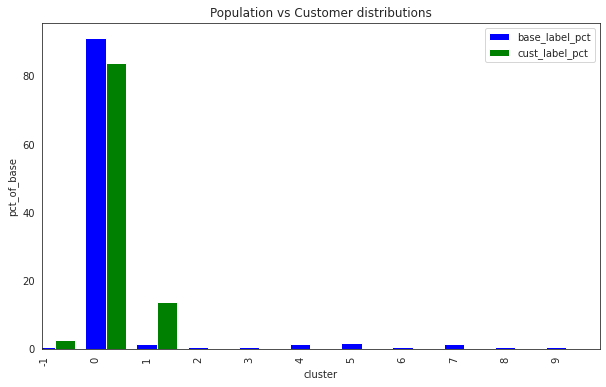

In [311]:
cust_labels = pd.DataFrame(umap_cust_df['prediction'].value_counts()*100/umap_cust_df.shape[0])
cust_labels = cust_labels.reset_index().rename(columns = {'index':'cluster_label', 'prediction':'cust_label_pct'})

base_labels = pd.DataFrame(dbs_results['prediction'].value_counts()*100/dbs_results.shape[0])
base_labels = base_labels.reset_index().rename(columns = {'index':'cluster_label', 'prediction':'base_label_pct'})

comb_df = pd.merge(base_labels, cust_labels, on='cluster_label', how = 'left').sort_values('cluster_label', ascending = True)
comb_df.set_index('cluster_label', inplace=True)

# plot comparison
import matplotlib.pyplot as plt

# plot comparison on base and population
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first bar chart
comb_df['base_label_pct'].plot(kind='bar', x = 'cluster_label', color='blue', ax=ax, position=0.5, width=0.4, label='base_label_pct')

# Plot the second bar chart
comb_df['cust_label_pct'].plot(kind='bar', x = 'cluster_label', color='green', ax=ax, position=-0.5, width=0.4, label='cust_label_pct')

# # Set labels and title
ax.set_xlabel('cluster')
ax.set_ylabel('pct_of_base')
ax.set_title('Population vs Customer distributions')

ax.legend()
plt.show()


Most of the customer base lies in clusters 0 and 1. Cluster 0 doesn't really provide much insight as most of the population lies in this cluster as well. Cluster 1 might give us a base to target. Looking at the characteristics of cluster 1, customers have the highest average values for the following features:
- ONLINE_AFFINITAET -online affinity
- D19_BEKLEIDUNG_GEH - luxury clothing purchases
- D19_BEKLEIDUNG_REST - clothing purchases
- D19_DROGERIEARTIKEL - drugstores
- D19_LEBENSMITTEL - food products
- D19_HAUS_DEKO - decor
- D19_SCHUHE - shoes
- D19_VERSI_ANZ_12 - insurance
- D19_WEIN_FEINKOST - wine and gourmet food
- D19_VERSAND_ANZ_12 - mail order
- D19_VERSAND_ONLINE_QUOTE_12 - online mail order transactions
These characteristics signal a wealthier segment of customers.

# Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [312]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

mailout_test = pd.read_csv('mailout_test.csv').drop(columns = {'Unnamed: 0'})

mailout_train = pd.read_csv('mailout_train.csv').drop(columns = {'Unnamed: 0'})

mailout_train.shape

mailout_train['RESPONSE'].value_counts()

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0    42430
1      532
Name: RESPONSE, dtype: int64

In [369]:
# features to predict on
class_features = ['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'ONLINE_AFFINITAET',
 'PRAEGENDE_JUGENDJAHRE',
 'VERS_TYP',
 'SEMIO_DOM',
 'SEMIO_ERL',
 'SEMIO_FAM',
 'SEMIO_KAEM',
 'SEMIO_KRIT',
 'SEMIO_KULT',
 'SEMIO_MAT',
 'SEMIO_PFLICHT',
 'SEMIO_RAT',
 'SEMIO_REL',
 'SEMIO_SOZ',
 'SEMIO_TRADV',
 'SEMIO_VERT',
 'ZABEOTYP',
 'HH_EINKOMMEN_SCORE',
 'LP_FAMILIE_FEIN',
 'W_KEIT_KIND_HH',
 'BALLRAUM',
 'GEBAEUDETYP',
 'INNENSTADT',
 'KONSUMNAEHE',
 'WOHNLAGE',
 'ORTSGR_KLS9',
 'REGIOTYP',
 'KBA05_AUTOQUOT',
 'KBA13_KRSSEG_KLEIN',
 'KBA13_KRSSEG_OBER',
 'KBA13_KRSSEG_VAN',
 'KBA13_KRSZUL_NEU',
 'KBA13_VORB_0',
 'KBA13_VORB_1',
 'KBA13_VORB_1_2',
 'KBA13_VORB_2',
 'KBA13_VORB_3',
#  'CAMEO_DEUG_2015',
#  'CAMEO_INTL_2015',
 'CJT_GESAMTTYP',
 'D19_KONSUMTYP',
 'RETOURTYP_BK_S',
 'SHOPPER_TYP',
 'FINANZTYP',
 'KKK',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_ANZ_24',
 'D19_BEKLEIDUNG_GEH',
 'D19_BEKLEIDUNG_REST',
 'D19_BILDUNG',
 'D19_BIO_OEKO',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_ENERGIE',
 'D19_FREIZEIT',
 'D19_GARTEN',
 'D19_GESAMT_ANZ_12',
 'D19_GESAMT_ANZ_24',
 'D19_HANDWERK',
 'D19_HAUS_DEKO',
 'D19_KINDERARTIKEL',
 'D19_KOSMETIK',
 'D19_LEBENSMITTEL',
 'D19_LOTTO',
 'D19_NAHRUNGSERGAENZUNG',
 'D19_RATGEBER',
 'D19_REISEN',
 'D19_SAMMELARTIKEL',
 'D19_SCHUHE',
 'D19_SONSTIGE',
 'D19_TECHNIK',
 'D19_TIERARTIKEL',
 'D19_VERSICHERUNGEN',
 'D19_VERSI_ANZ_12',
 'D19_VERSI_ANZ_24',
 'D19_WEIN_FEINKOST',
 'D19_GESAMT_DATUM',
 'D19_GESAMT_OFFLINE_DATUM',
 'D19_GESAMT_ONLINE_DATUM',
 'D19_GESAMT_ONLINE_QUOTE_12',
 'D19_VERSAND_ANZ_12',
 'D19_VERSAND_ANZ_24',
 'D19_VERSAND_DATUM',
 'D19_VERSAND_OFFLINE_DATUM',
 'D19_VERSAND_ONLINE_DATUM',
 'D19_VERSAND_ONLINE_QUOTE_12',
 'D19_VERSAND_REST',
 'D19_VOLLSORTIMENT',
 'LNR',
 'RESPONSE']


In [370]:
df_train = mailout_train[class_features]

In [371]:
 df_with_dummies = pd.get_dummies(df_train, columns=[ 'RETOURTYP_BK_S', 'FINANZTYP',\
                                                     'D19_KONSUMTYP'])

In [372]:
data_quality_pdf = check_missing_values(df_with_dummies)

data_quality_pdf

index    dtype  null_values  pct_nulls  \
0           ALTERSKATEGORIE_GROB    int64            0   0.000000   
1                      ANREDE_KZ    int64            0   0.000000   
2                GFK_URLAUBERTYP  float64          605   1.408221   
3               GREEN_AVANTGARDE    int64            0   0.000000   
4                     HEALTH_TYP    int64            0   0.000000   
5            LP_LEBENSPHASE_GROB  float64          605   1.408221   
6                 LP_STATUS_GROB  float64          605   1.408221   
7              ONLINE_AFFINITAET  float64          605   1.408221   
8          PRAEGENDE_JUGENDJAHRE    int64            0   0.000000   
9                       VERS_TYP    int64            0   0.000000   
10                     SEMIO_DOM    int64            0   0.000000   
11                     SEMIO_ERL    int64            0   0.000000   
12                     SEMIO_FAM    int64            0   0.000000   
13                    SEMIO_KAEM    int64            0   0.000000   
14                    SEMIO_KRIT    int64            0   0.000000   
15                    SEMIO_KULT    int64            0   0.000000   
16                     SEMIO_MAT    int64            0   0.000000   
17                 SEMIO_PFLICHT    int64            0   0.000000   
18                     SEMIO_RAT    int64            0   0.000000   
19                     SEMIO_REL    int64            0   0.000000   
20                     SEMIO_SOZ    int64            0   0.000000   
21                   SEMIO_TRADV    int64            0   0.000000   
22                    SEMIO_VERT    int64            0   0.000000   
23                      ZABEOTYP    int64            0   0.000000   
24            HH_EINKOMMEN_SCORE  float64          704   1.638657   
25               LP_FAMILIE_FEIN  float64          605   1.408221   
26                W_KEIT_KIND_HH  float64         9678  22.526884   
27                      BALLRAUM  float64         7799  18.153252   
28                   GEBAEUDETYP  float64         7777  18.102044   
29                    INNENSTADT  float64         7799  18.153252   
30                   KONSUMNAEHE  float64         6997  16.286486   
31                      WOHNLAGE  float64         7777  18.102044   
32                   ORTSGR_KLS9  float64         7951  18.507053   
33                      REGIOTYP  float64         8445  19.656906   
34                KBA05_AUTOQUOT  float64         8648  20.129417   
35            KBA13_KRSSEG_KLEIN  float64         7962  18.532657   
36             KBA13_KRSSEG_OBER  float64         7962  18.532657   
37              KBA13_KRSSEG_VAN  float64         7962  18.532657   
38              KBA13_KRSZUL_NEU  float64         7962  18.532657   
39                  KBA13_VORB_0  float64         7962  18.532657   
40                  KBA13_VORB_1  float64         7962  18.532657   
41                KBA13_VORB_1_2  float64         7962  18.532657   
42                  KBA13_VORB_2  float64         7962  18.532657   
43                  KBA13_VORB_3  float64         7962  18.532657   
44                 CJT_GESAMTTYP  float64          605   1.408221   
45                   SHOPPER_TYP    int64            0   0.000000   
46                           KKK  float64         8445  19.656906   
47       D19_BANKEN_ONLINE_DATUM    int64            0   0.000000   
48             D19_BANKEN_ANZ_24    int64            0   0.000000   
49            D19_BEKLEIDUNG_GEH    int64            0   0.000000   
50           D19_BEKLEIDUNG_REST    int64            0   0.000000   
51                   D19_BILDUNG    int64            0   0.000000   
52                  D19_BIO_OEKO    int64            0   0.000000   
53                   D19_BUCH_CD    int64            0   0.000000   
54                D19_DIGIT_SERV    int64            0   0.000000   
55           D19_DROGERIEARTIKEL    int64            0   0.000000   
56                   D19_ENERGIE    int64            0   0.000000   
57                  D19_F

In [373]:

# separate train and test sets
X = df_with_dummies.drop(columns = {'RESPONSE', 'LNR'}).values# Features
y = df_with_dummies['RESPONSE'].values  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_columns = mailout_train[class_features].drop(columns = {'RESPONSE', 'LNR'}).columns

# Impute nulls
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
# Fit the imputer on the data
imputer.fit(X_train)
# Transform the data by replacing missing values with the mean
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)


# Count unique values
unique_values, counts = np.unique(y_test, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

# Count unique values
unique_values, counts = np.unique(y_train, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 8472
1: 121
0: 33958
1: 411


In [374]:
# undersample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=0.2)
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)

# Perform random oversampling
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


## RF

In [375]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Fit the classifier on the training data
rf.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [20, 50, 100, 150],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10]
}

# Initialize GridSearchCV with the RF classifier and parameter grid
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='recall')

# Perform grid search on the training data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9343651809612475
Precision: 0.02569593147751606
Recall: 0.09917355371900827
F1-score: 0.04081632653061225
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
Best Score: 0.14355231143552313
Test Accuracy: 0.9440242057488654
Precision: 0.013513513513513514
Recall: 0.04132231404958678
F1-score: 0.020366598778004077


## GBM

In [376]:


from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
gbm = GradientBoostingClassifier()

# Fit the classifier on the training data
gbm.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = gbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# run grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [20, 50, 100, 150],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10]
}

# Initialize GridSearchCV with the RF classifier and parameter grid
grid_search = GridSearchCV(gbm, param_grid, cv=3, scoring='recall')

# Perform grid search on the training data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.87943675084371
Precision: 0.01993704092339979
Recall: 0.15702479338842976
F1-score: 0.03538175046554935
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}
Best Score: 0.30656934306569344
Test Accuracy: 0.8323053648318399
Precision: 0.018950437317784258
Recall: 0.21487603305785125
F1-score: 0.034829202947086406


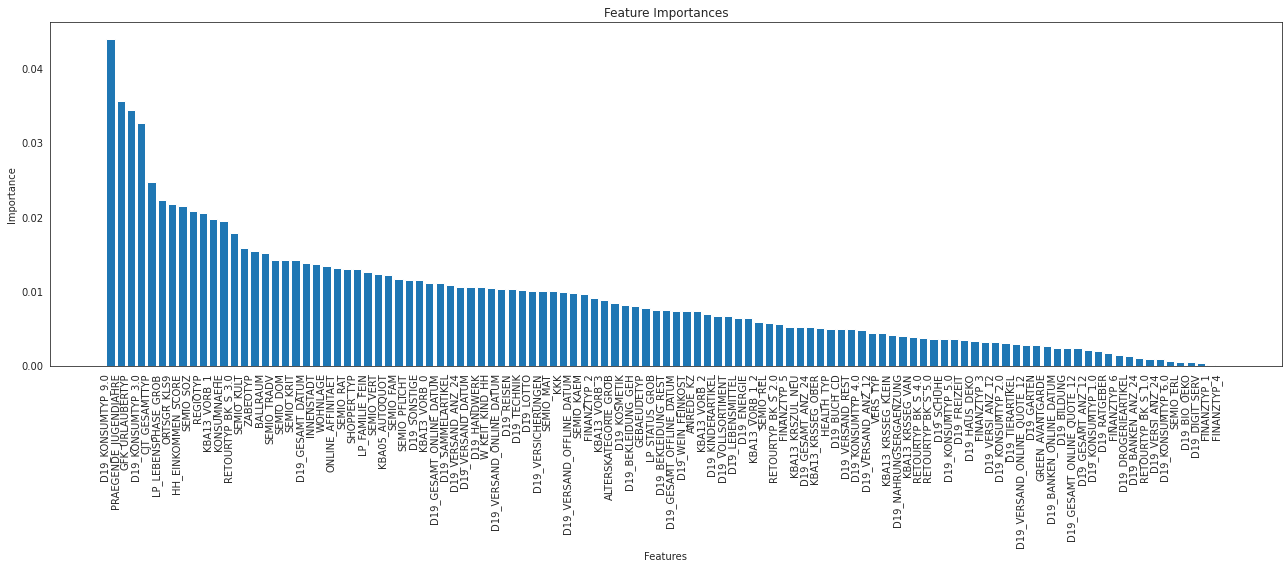

In [377]:
feature_importances = best_model.feature_importances_

# Get feature names
feature_names = df_with_dummies.drop(columns = {'RESPONSE', 'LNR'}).columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot feature importances
plt.figure(figsize=(18, 8))
plt.bar(range(len(feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [379]:
df_test.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'GFK_URLAUBERTYP',
       'GREEN_AVANTGARDE', 'HEALTH_TYP', 'LP_LEBENSPHASE_GROB',
       'LP_STATUS_GROB', 'ONLINE_AFFINITAET', 'PRAEGENDE_JUGENDJAHRE',
       'VERS_TYP',
       ...
       'FINANZTYP_4', 'FINANZTYP_5', 'FINANZTYP_6', 'D19_KONSUMTYP_1.0',
       'D19_KONSUMTYP_2.0', 'D19_KONSUMTYP_3.0', 'D19_KONSUMTYP_4.0',
       'D19_KONSUMTYP_5.0', 'D19_KONSUMTYP_6.0', 'D19_KONSUMTYP_9.0'],
      dtype='object', length=110)

In [383]:
# predict on test
test_data = pd.read_csv('mailout_test.csv')
test_features = class_features
test_features.remove('RESPONSE')

df_test = test_data[test_features]
df_test = pd.get_dummies(df_test, columns=['RETOURTYP_BK_S', 'FINANZTYP',\
                                                     'D19_KONSUMTYP', ])
df_test = imputer.transform(df_test.drop(columns = 'LNR'))
predictions = best_model.predict(df_test)

/home/arjunanl/.virtualenv/usecase/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [384]:
test_data['prediction'] = predictions

In [386]:
test_data.to_csv('predictions.csv')